In [242]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Analysis Functions

In [243]:
def analyze_cue_time_diff(df):
    df['mix_cue_time_diff'] = df['mix_cue_out_time'] - df['mix_cue_in_time']
    df['track_cue_time_diff'] = df['track_cue_out_time'] - df['track_cue_in_time']
    df['cue_time_diff_diff'] = df['mix_cue_time_diff'] - df['track_cue_time_diff']

    df['mix_cue_beat_diff'] = df['mix_cue_out_beat'] - df['mix_cue_in_beat']
    df['track_cue_beat_diff'] = df['track_cue_out_beat'] - df['track_cue_in_beat']
    df['cue_beat_diff_diff'] = df['mix_cue_beat_diff'] - df['track_cue_beat_diff']

    print("Mix Cue Time Differences:")
    print(df['mix_cue_time_diff'].describe())
    print("Standard Deviation:", df['mix_cue_time_diff'].std())
    print()

    print("Track Cue Time Differences:")
    print(df['track_cue_time_diff'].describe())
    print("Standard Deviation:", df['track_cue_time_diff'].std())
    print()

    print("Difference between Mix and Track Cue TIME Differences:")
    print(df['cue_time_diff_diff'].describe())
    print("Standard Deviation:", df['cue_time_diff_diff'].std())
    print()

    print("Difference between Mix and Track Cue BEAT Differences:")
    print(df['cue_beat_diff_diff'].describe())
    print("Standard Deviation:", df['cue_beat_diff_diff'].std())
    print()

    fig, axs = plt.subplots(2, 2, figsize=(20, 15))
    axs[0, 0].hist(df['mix_cue_time_diff'], bins=50)
    axs[0, 0].set_title('Mix Cue Time Differences')
    axs[0, 0].set_xlabel('Time Difference (s)')
    axs[0, 0].set_ylabel('Frequency')

    axs[0, 1].hist(df['track_cue_time_diff'], bins=50)
    axs[0, 1].set_title('Track Cue Time Differences')
    axs[0, 1].set_xlabel('Time Difference (s)')
    axs[0, 1].set_ylabel('Frequency')

    axs[1, 0].hist(df['cue_time_diff_diff'], bins=50)
    axs[1, 0].set_title('Difference between Mix and Track Cue TIME Differences')
    axs[1, 0].set_xlabel('Time Difference (s)')
    axs[1, 0].set_ylabel('Frequency')

    axs[1, 1].hist(df['cue_beat_diff_diff'], bins=50)
    axs[1, 1].set_title('Difference Between # of Beats: Mix and Track Non-Transition Region')
    axs[1, 1].set_xlabel('Beat Difference (beats)')
    axs[1, 1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

In [244]:
def analyze_key_changes(df):
    rows_with_key_changes = df[df['key_change'] > 0].shape[0]
    print(f"Number of tracks with key changes: {rows_with_key_changes}")
    
    bins = np.arange(0, 12.5) # Create bins for 0 to 12
    plt.hist(df['key_change'], bins=bins, align='left')
    plt.xlabel('Number of Key Changes')
    plt.ylabel('Frequency')
    plt.title('Histogram of Key Changes')
    plt.show()

In [245]:
def check_cue_time_order(df):
    correct = True
    for i in range(df.shape[0]):
        if df.iloc[i]['mix_cue_out_time'] <= df.iloc[i]['mix_cue_in_time']:
            print(f"Error: mix_cue_out_time is not after mix_cue_in_time for track {df.iloc[i]['track_id']}")
            correct = False
        if i > 0 and df.iloc[i]['mix_cue_in_time'] <= df.iloc[i-1]['mix_cue_out_time']:
            print(f"Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track {df.iloc[i]['track_id']}")
            correct = False
    if correct:
        print("All mix_cue_in_time and mix_cue_out_time are in order.")

In [246]:
def analyze_transition_gaps(df):
    df['time_transition_gap'] = df['mix_cue_in_time'] - df['mix_cue_out_time'].shift(1)
    df['beat_transition_gap'] = df['mix_cue_in_beat'] - df['mix_cue_out_beat'].shift(1)
    df_transition_gaps = df[1:]
    
    print("Summary statistics of transition gaps in TIME domain:")
    print(df_transition_gaps['time_transition_gap'].describe())
    print()

    print("Summary statistics of transition gaps in BEAT domain:")
    print(df_transition_gaps['beat_transition_gap'].describe())
    print()
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    
    axs[0].hist(df_transition_gaps['time_transition_gap'], bins=50)
    axs[0].set_xlabel('Transition Gap (seconds)')
    axs[0].set_ylabel('Frequency')
    axs[0].set_title('Histogram of Transition Gaps (Time Domain)')
    
    axs[1].hist(df_transition_gaps['beat_transition_gap'], bins=50)
    axs[1].set_xlabel('Transition Gap (beats)')
    axs[1].set_ylabel('Frequency')
    axs[1].set_title('Histogram of Transition Gaps (Beat Domain)')
    
    # Add vertical lines at 32, 64, 96, 128 beats
    for x in [32, 64, 96, 128]:
        axs[1].axvline(x, color='r', linestyle='--')
        axs[1].text(x, axs[1].get_ylim()[1]*0.9, f'{x}', ha='center', va='center')
    
    plt.tight_layout()
    plt.show()

In [247]:
def plot_warp_path(df):
    # # Random row
    random.seed(124)
    random_index = random.randint(0, len(df) - 1)
    row = df.iloc[random_index]

    warp_path = row['wp']
    track_cue_in_beat = row['track_cue_in_beat']
    track_cue_out_beat = row['track_cue_out_beat']
    mix_cue_in_beat = row['mix_cue_in_beat']
    mix_cue_out_beat = row['mix_cue_out_beat']

    # Convert warp path to numpy array for easier plotting
    warp_path = np.array(warp_path)

    # Create the plot
    plt.figure(figsize=(8, 4))

    # Plot the warp path
    plt.plot(warp_path[:, 0], warp_path[:, 1], label=f'Warp Path for {random_index+1}-th Track in Mix')

    # Add a red line between the track cue in and out beats
    plt.plot([track_cue_in_beat, track_cue_out_beat], 
             [mix_cue_in_beat, mix_cue_out_beat], 
             color='r', linewidth=2, label='Cue Segment')

    # Add points for track cue in and out beats as right and left triangles, respectively
    plt.scatter(track_cue_in_beat, warp_path[warp_path[:, 0] == track_cue_in_beat, 1], color='r', marker='>', label='Cue In Beat', zorder=5)
    plt.scatter(track_cue_out_beat, warp_path[warp_path[:, 0] == track_cue_out_beat, 1], color='r', marker='<', label='Cue Out Beat', zorder=5)

    # Add labels and title
    plt.xlabel('Track Beats')
    plt.ylabel('Mix Beats')
    plt.title('Warp Path and Cue Points')
    plt.legend()

    # Show the plot
    plt.show()

In [248]:
def plot_warp_path_connections(df):
    # First track in mix
    row = df.iloc[0]
    
    # Extract warp path
    warp_path = row['wp']

    # Convert warp path to numpy array for easier plotting
    warp_path = np.array(warp_path)

    # Extract all i and j values
    i_vals = [pair[0] for pair in warp_path]
    j_vals = [pair[1] for pair in warp_path]
    
    # Determine min/max for the track and the mix
    i_min, i_max = min(i_vals), max(i_vals)
    j_min, j_max = min(j_vals), max(j_vals)
    
    # Create a figure
    plt.figure(figsize=(10, 6))

    # Draw lines connecting matched points in the warp path
    for (i, j) in warp_path:
        plt.plot([i, j], [0, 1], color='black', linewidth=0.8)
    
    # Plot horizontal line for the entire track range at y=0 (blue)
    plt.hlines(y=0, xmin=i_min, xmax=i_max, color='blue', linewidth=2, label='Track')
    
    # Plot horizontal line for the relevant mix subsequence at y=1 (red)
    plt.hlines(y=1, xmin=j_min, xmax=j_max, color='red', linewidth=2, label='Mix (Subsequence)')

    # Plot extended horizontal line for the mix at y=1 (red, dotted)
    plt.hlines(y=1, xmin=i_min, xmax=i_max, color='red', linestyle='dotted', linewidth=2)

    # Plot cue markers:
    # Extract cue points from the row
    track_cue_in_beat = row['track_cue_in_beat']
    track_cue_out_beat = row['track_cue_out_beat']
    mix_cue_in_beat = row['mix_cue_in_beat']
    mix_cue_out_beat = row['mix_cue_out_beat']

    # Mix cue markers at y=1:
    plt.plot(mix_cue_in_beat, 1, marker='>', markersize=10, color='red', linestyle='None', label=f'Mix Cue In (Beat {mix_cue_in_beat})')
    plt.plot(mix_cue_out_beat, 1, marker='<', markersize=10, color='red', linestyle='None', label=f'Mix Cue Out (Beat {mix_cue_out_beat})')

    # Track cue markers at y=0:
    plt.plot(track_cue_in_beat, 0, marker='>', markersize=10, color='blue', linestyle='None', label=f'Track Cue In (Beat {track_cue_in_beat})')
    plt.plot(track_cue_out_beat, 0, marker='<', markersize=10, color='blue', linestyle='None', label=f'Track Cue Out (Beat {track_cue_out_beat})')
    
    # Aesthetics
    plt.title('DTW Subsequence Alignment of 1st Track to Mix')
    plt.xlabel('Beat')
    plt.yticks([0, 1], ['Track', 'Mix'])
    plt.ylim(-0.1, 1.1)
    plt.legend(framealpha=1.0)
    plt.grid(True, linestyle=':')
    
    plt.show()

In [249]:
def analyze_match_rate(df):
    """
    Analyze match_rate in the DataFrame.

    Parameters:
    df (pd.DataFrame): DataFrame containing match_rate column

    Returns:
    dict: Dictionary containing average match_rate, standard deviation, 
          and count of match_rates equal to 1
    """
    if 'match_rate' not in df.columns:
        raise ValueError("The DataFrame must contain a 'match_rate' column.")

    # Use describe() to get summary statistics
    match_rate_description = df['match_rate'].describe()
    
    # Calculate percentage of match_rate values that equal 1
    pct_match_rate_equals_1 = (df['match_rate'] == 1).mean() * 100

    # Print the results
    print("Match Rate Analysis:")
    print(match_rate_description)
    print(f"Percentage of Match Rates Equal to 1: {pct_match_rate_equals_1:.2f}%")

# MFCC Pkl

In [250]:
df_mfcc = pd.read_pickle('../data/align/jwmtj61-mfcc.pkl')

In [251]:
df_mfcc.head(2)

mix_id  track_id feature  key_invariant  match_rate  key_change  \
0  jwmtj61  12t6wktp    mfcc          False    0.876254           0   
1  jwmtj61  16juffhx    mfcc          False    1.000000           0   

   best_cost                 costs  \
0   1.261869  [1.2618689655986173]   
1   1.569414  [1.5694135824021376]   

                                                  wp  \
0  [[411, 358], [410, 358], [409, 358], [408, 358...   
1  [[384, 329], [383, 328], [382, 328], [381, 328...   

                                           wp_sliced  mix_cue_in_time  \
0  [[13, 29], [14, 30], [15, 31], [16, 32], [17, ...            14.35   
1  [[284, 252], [285, 253], [286, 254], [287, 255...           122.67   

   mix_cue_out_time  track_cue_in_time  track_cue_out_time  mix_cue_in_beat  \
0            141.96               6.64              152.70               29   
1            158.39             133.18              168.81              252   

   mix_cue_out_beat  track_cue_in_beat  track_cue_out_beat  
0               293                 13                 310  
1               328                284                 360

Mix Cue Time Differences:
count     29.000000
mean      67.583103
std       45.848899
min       11.780000
25%       33.650000
50%       53.260000
75%       90.240000
max      173.990000
Name: mix_cue_time_diff, dtype: float64
Standard Deviation: 45.84889935611855

Track Cue Time Differences:
count     29.000000
mean      83.129655
std       52.833405
min       10.910000
25%       41.890000
50%       67.610000
75%      132.380000
max      232.900000
Name: track_cue_time_diff, dtype: float64
Standard Deviation: 52.83340538784953

Difference between Mix and Track Cue TIME Differences:
count     29.000000
mean     -15.546552
std       39.001614
min     -142.660000
25%      -15.320000
50%       -0.720000
75%        0.090000
max       37.350000
Name: cue_time_diff_diff, dtype: float64
Standard Deviation: 39.001613819710975

Difference between Mix and Track Cue BEAT Differences:
count     29.000000
mean     -36.724138
std       91.520059
min     -325.000000
25%      -32.000000
50%        0.00

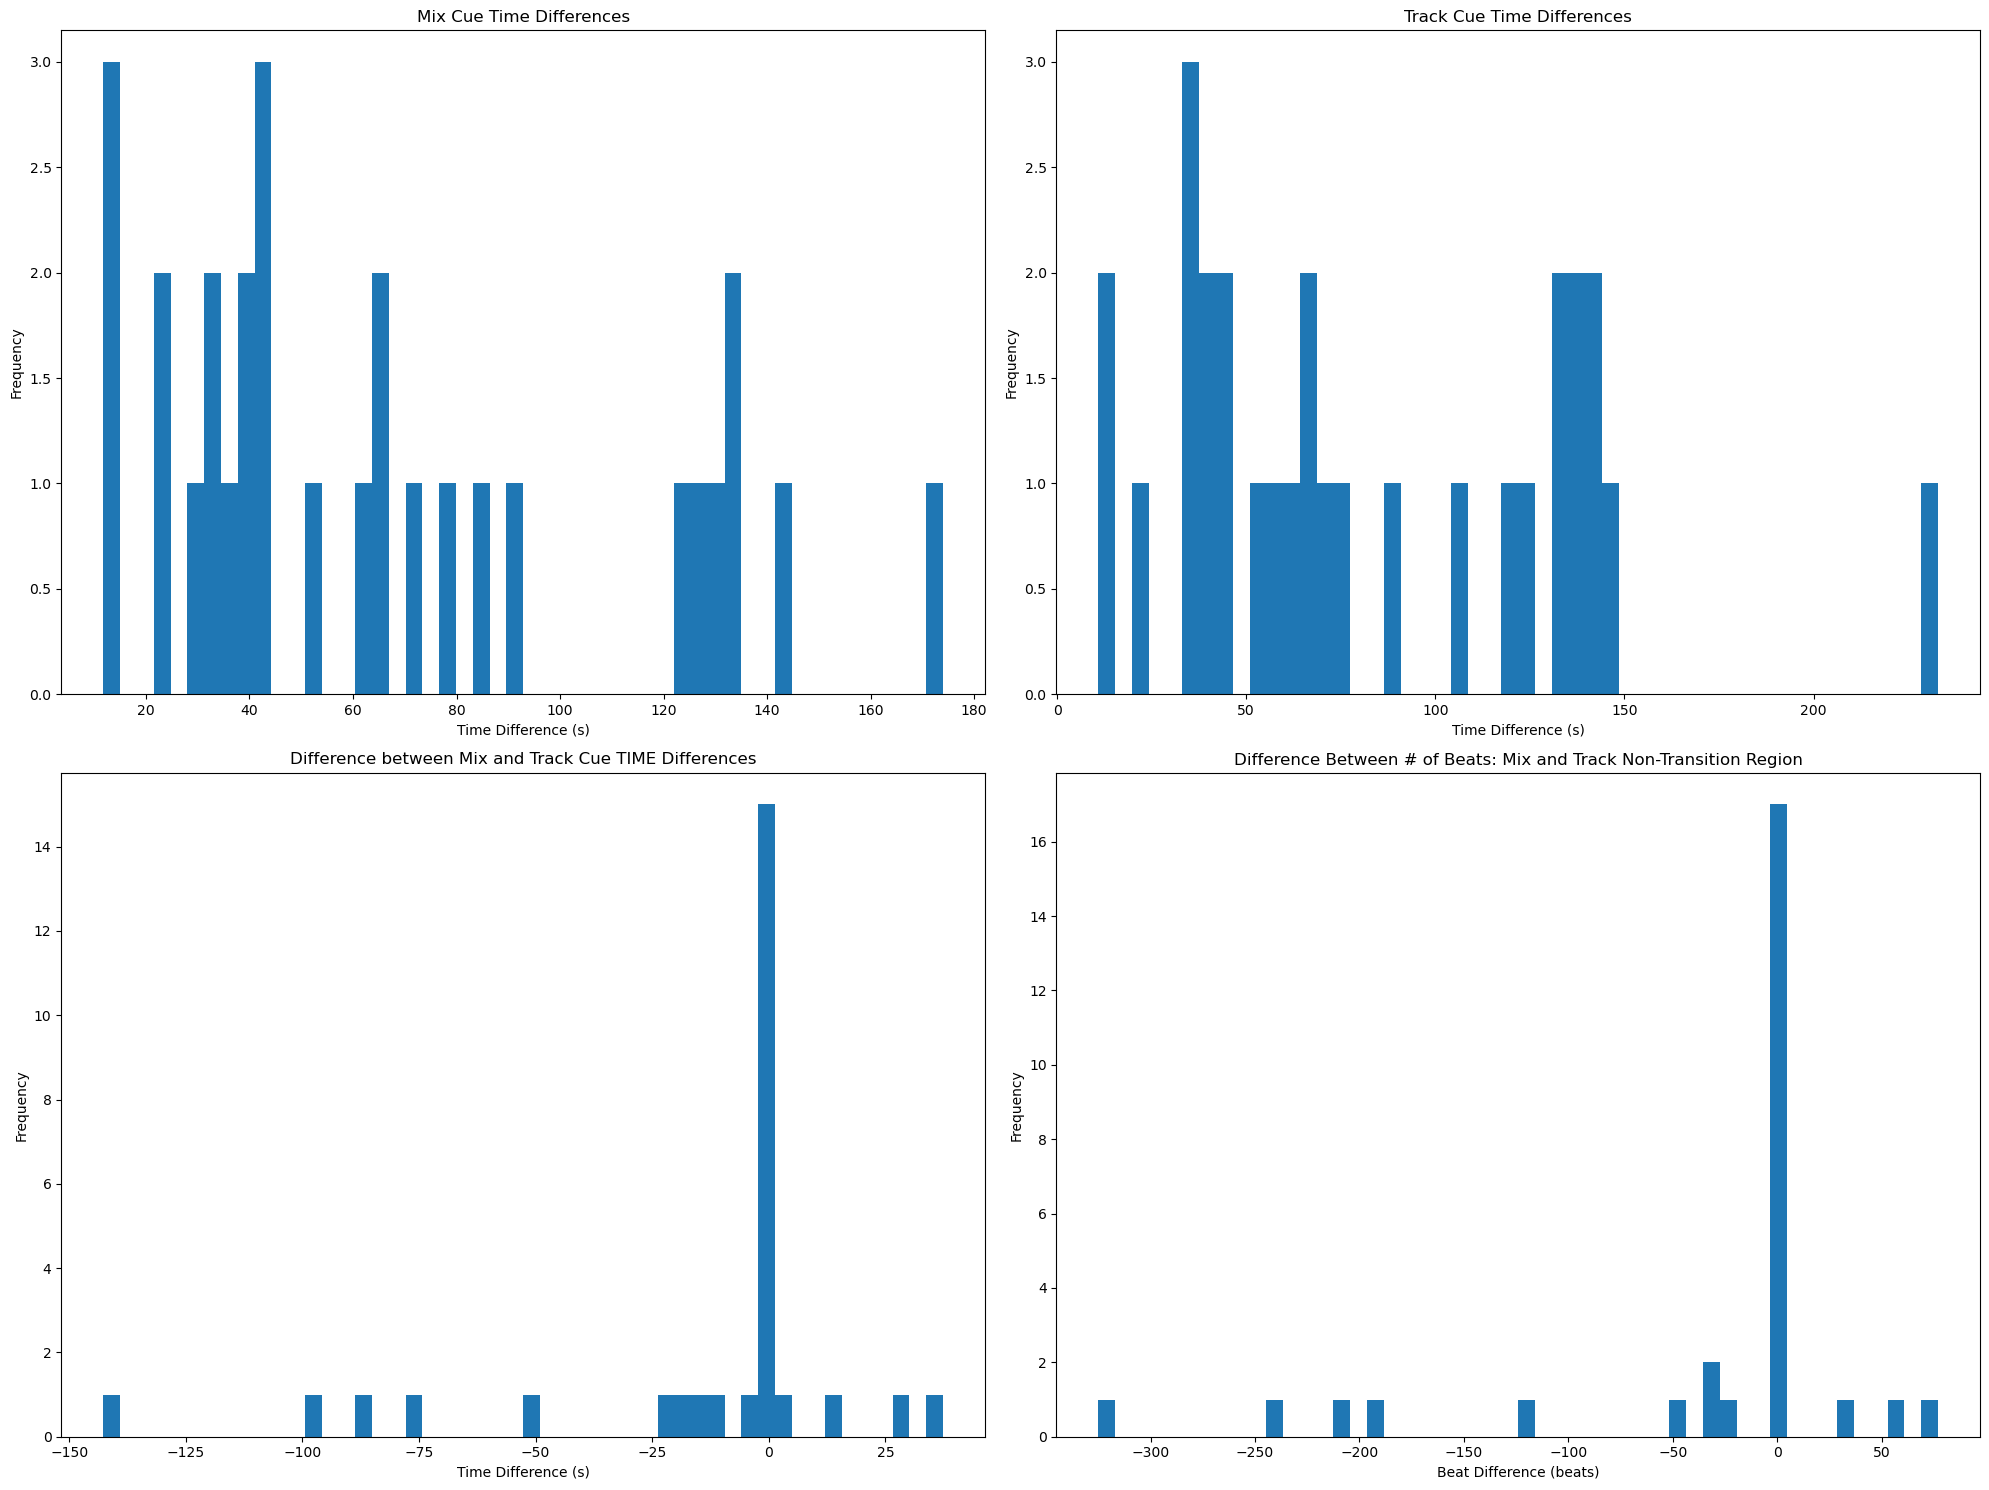

In [252]:
analyze_cue_time_diff(df_mfcc)

Number of tracks with key changes: 0


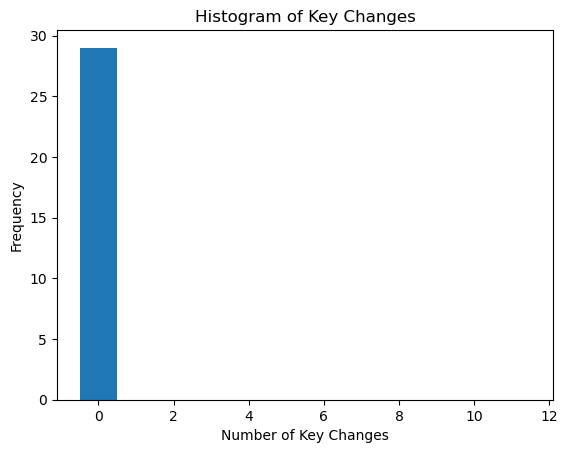

In [253]:
analyze_key_changes(df_mfcc)

In [254]:
check_cue_time_order(df_mfcc)

Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 16juffhx
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 1mlcb24f
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 1s76shlf
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track mwv1cnx
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 2m76b78x
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 1lnhf0jx


In [255]:
analyze_match_rate(df_mfcc)

Match Rate Analysis:
count    29.000000
mean      0.812277
std       0.262055
min       0.259259
25%       0.733333
50%       0.992958
75%       1.000000
max       1.000000
Name: match_rate, dtype: float64
Percentage of Match Rates Equal to 1: 44.83%


# Chroma Pkl

In [21]:
df_chroma = pd.read_pickle('../data/align/jwmtj61-chroma.pkl')

Mix Cue Time Differences:
count     29.000000
mean      79.794483
std       39.300186
min        7.870000
25%       54.280000
50%       66.610000
75%      104.370000
max      173.620000
Name: mix_cue_time_diff, dtype: float64
Standard Deviation: 39.30018643959841

Track Cue Time Differences:
count     29.000000
mean      92.365862
std       50.367964
min        7.970000
25%       54.370000
50%       77.810000
75%      123.990000
max      224.520000
Name: track_cue_time_diff, dtype: float64
Standard Deviation: 50.36796370690695

Difference between Mix and Track Cue TIME Differences:
count     29.000000
mean     -12.571379
std       34.157858
min     -120.150000
25%       -2.010000
50%       -0.410000
75%       -0.090000
max       26.580000
Name: cue_time_diff_diff, dtype: float64
Standard Deviation: 34.15785767413845

Difference between Mix and Track Cue BEAT Differences:
count     29.000000
mean     -27.172414
std       71.044789
min     -256.000000
25%       -6.000000
50%        0.000

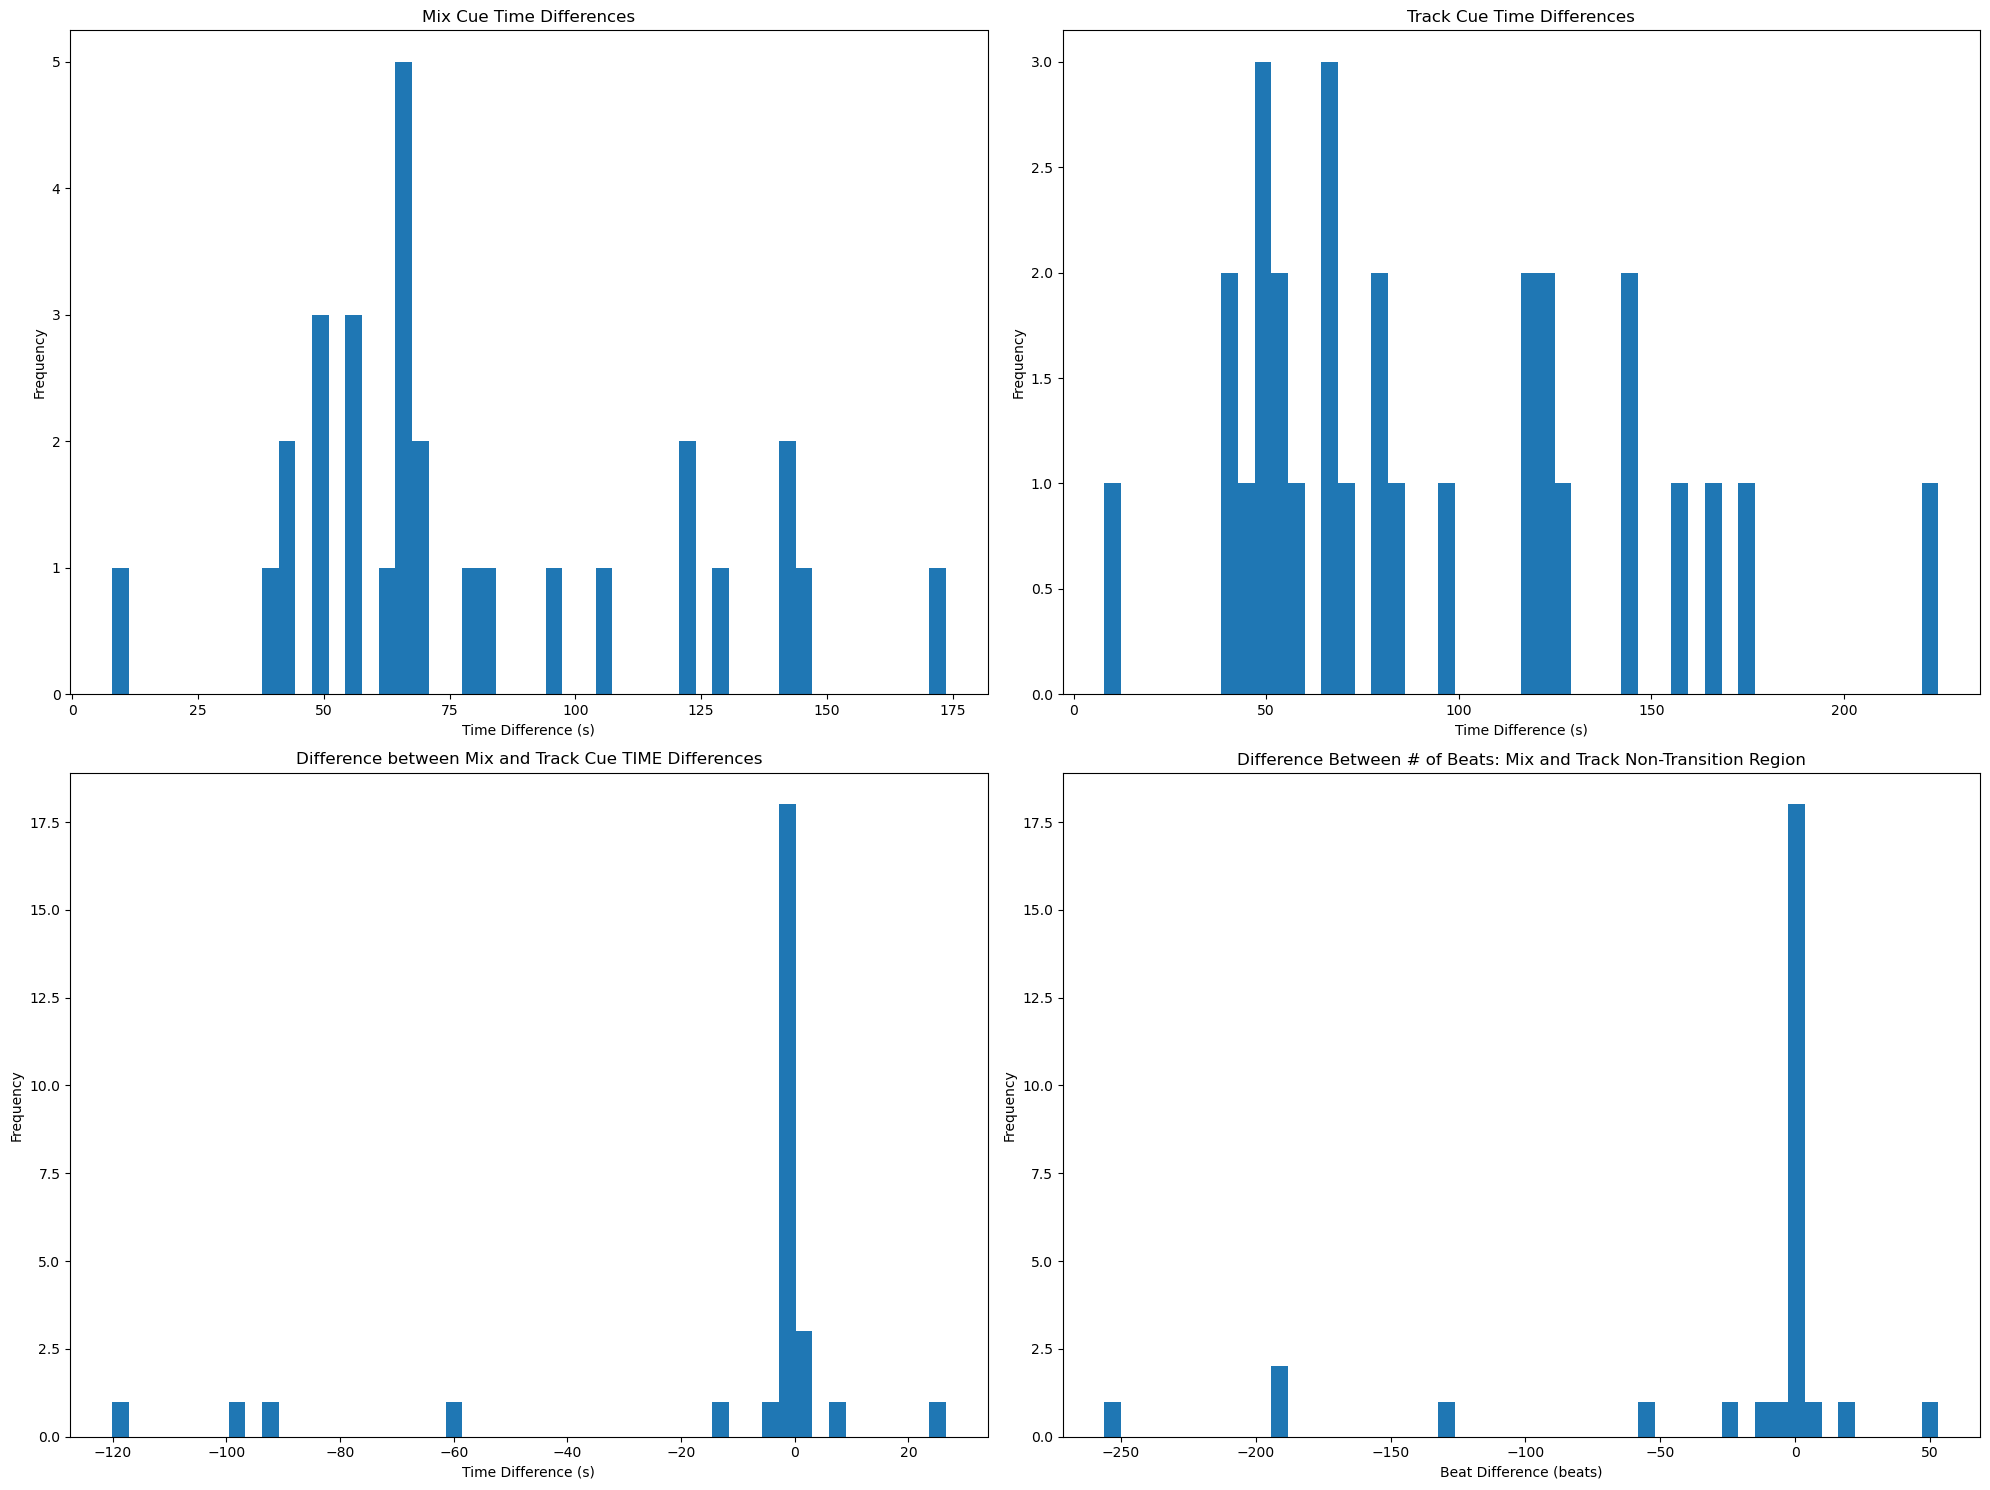

In [23]:
analyze_cue_time_diff(df_chroma)

Number of tracks with key changes: 0


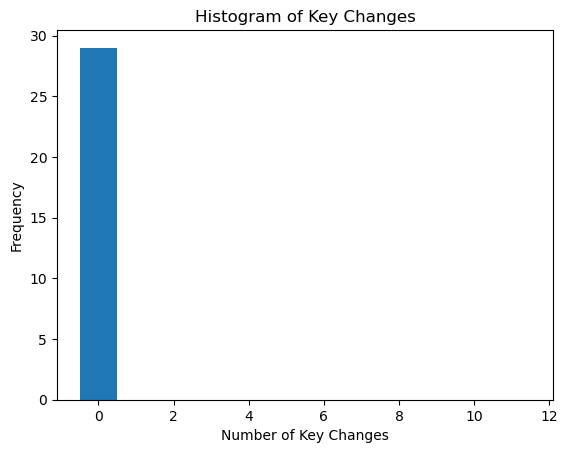

In [24]:
analyze_key_changes(df_chroma)

In [25]:
check_cue_time_order(df_chroma)

All mix_cue_in_time and mix_cue_out_time are in order.


Summary statistics of transition gaps in TIME domain:
count     28.000000
mean      41.524643
std       51.120417
min        4.780000
25%       16.750000
50%       22.700000
75%       38.007500
max      217.910000
Name: time_transition_gap, dtype: float64

Summary statistics of transition gaps in BEAT domain:
count     28.000000
mean      90.500000
std      110.964959
min       12.000000
25%       35.250000
50%       47.500000
75%       89.250000
max      465.000000
Name: beat_transition_gap, dtype: float64



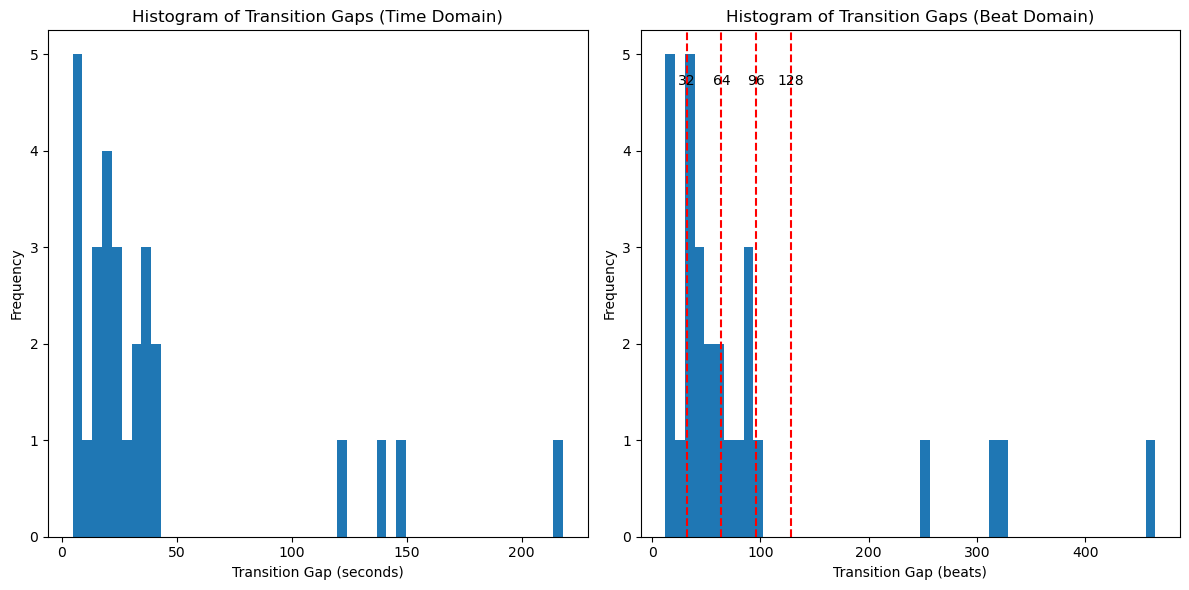

In [26]:
analyze_transition_gaps(df_chroma)

In [34]:
df_chroma[['track_id', 'match_rate', 'best_cost',
           'mix_cue_in_time', 'mix_cue_out_time', 'track_cue_in_time', 'track_cue_out_time',
           'mix_cue_in_beat', 'mix_cue_out_beat', 'track_cue_in_beat', 'track_cue_out_beat',
           'mix_cue_beat_diff', 'track_cue_beat_diff', 'cue_beat_diff_diff',
           'time_transition_gap', 'beat_transition_gap']].head(8)

track_id  match_rate  best_cost  mix_cue_in_time  mix_cue_out_time  \
0  12t6wktp    1.000000   1.665522             7.95             90.27   
1  16juffhx    1.000000   1.756937           108.99            150.88   
2  258n7bkf    1.000000   1.766334           171.52            266.70   
3  10y0bwb5    0.532847   2.243411           275.51            343.06   
4   g9krvgx    0.902098   1.499962           354.05            416.86   
5   9p7yws5    0.734597   2.196209           438.29            504.90   
6  1qc2j195    0.913978   2.061584           542.88            597.68   
7  1mlcb24f    0.426866   1.976836           635.77            702.81   

   track_cue_in_time  track_cue_out_time  mix_cue_in_beat  mix_cue_out_beat  \
0               0.25               82.87               16               184   
1              14.58               56.30              223               312   
2              13.25              108.86              356               560   
3              50.36              178.80              579               725   
4               9.85               77.18              749               878   
5               4.90               84.18              917              1072   
6              23.82               78.22             1171              1264   
7              21.62              186.62             1355              1498   

   track_cue_in_beat  track_cue_out_beat  mix_cue_beat_diff  \
0                  0                 168                168   
1                 31                 120                 89   
2                 28                 232                204   
3                107                 381                146   
4                 21                 164                129   
5                 11                 222                155   
6                 59                 144                 93   
7                 37                 372                143   

   track_cue_beat_diff  cue_beat_diff_diff  time_transition_gap  \
0                  168                   0                  NaN   
1                   89                   0                18.72   
2                  204                   0                20.64   
3                  274                -128                 8.81   
4                  143                 -14                10.99   
5                  211                 -56                21.43   
6                   85                   8                37.98   
7                  335                -192                38.09   

   beat_transition_gap  
0                  NaN  
1                 39.0  
2                 44.0  
3                 19.0  
4                 24.0  
5                 39.0  
6                 99.0  
7                 91.0

In [43]:
analyze_match_rate(df_chroma)

Match Rate Analysis:
count    29.000000
mean      0.895570
std       0.187933
min       0.425150
25%       0.902098
50%       1.000000
75%       1.000000
max       1.000000
Name: match_rate, dtype: float64
Percentage of Match Rates Equal to 1: 58.62%


In [37]:
df_chroma.iloc[3]['wp']

array([[448, 764],
       [447, 764],
       [446, 764],
       [445, 763],
       [444, 762],
       [443, 761],
       [442, 760],
       [441, 759],
       [440, 758],
       [439, 757],
       [438, 756],
       [437, 756],
       [436, 756],
       [435, 756],
       [434, 756],
       [433, 756],
       [432, 755],
       [431, 754],
       [430, 753],
       [429, 752],
       [428, 752],
       [427, 752],
       [426, 752],
       [425, 752],
       [424, 752],
       [423, 752],
       [422, 752],
       [421, 752],
       [420, 752],
       [419, 752],
       [418, 751],
       [417, 750],
       [416, 749],
       [415, 749],
       [414, 748],
       [413, 748],
       [412, 748],
       [411, 748],
       [410, 748],
       [409, 748],
       [408, 748],
       [407, 748],
       [406, 748],
       [405, 748],
       [404, 748],
       [403, 748],
       [402, 748],
       [401, 748],
       [400, 748],
       [399, 748],
       [398, 748],
       [397, 748],
       [396,

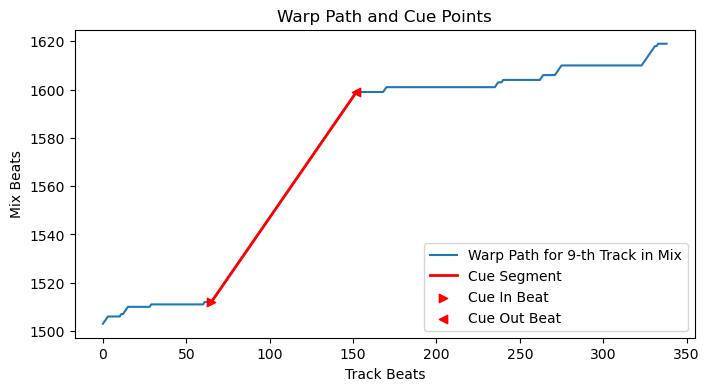

In [126]:
plot_warp_path(df_chroma)

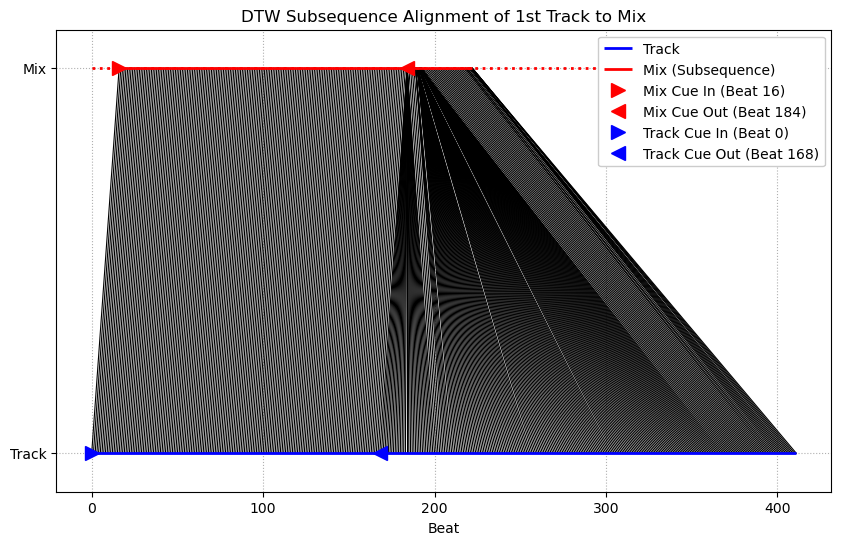

In [128]:
plot_warp_path_connections(df_chroma)

In [130]:
df_chroma.iloc[0]['wp']

array([[411, 222],
       [410, 222],
       [409, 222],
       [408, 222],
       [407, 222],
       [406, 221],
       [405, 221],
       [404, 221],
       [403, 221],
       [402, 221],
       [401, 221],
       [400, 221],
       [399, 221],
       [398, 220],
       [397, 219],
       [396, 219],
       [395, 218],
       [394, 218],
       [393, 217],
       [392, 216],
       [391, 215],
       [390, 214],
       [389, 213],
       [388, 212],
       [387, 211],
       [386, 210],
       [385, 209],
       [384, 208],
       [383, 207],
       [382, 206],
       [381, 205],
       [380, 204],
       [379, 203],
       [378, 202],
       [377, 201],
       [376, 200],
       [375, 199],
       [374, 198],
       [373, 197],
       [372, 196],
       [371, 195],
       [370, 194],
       [369, 193],
       [368, 192],
       [367, 192],
       [366, 192],
       [365, 192],
       [364, 192],
       [363, 192],
       [362, 192],
       [361, 192],
       [360, 192],
       [359,

# Spectral Contrast

In [102]:
df_sc = pd.read_pickle('../data/align/jwmtj61-spectral_contrast.pkl')

Mix Cue Time Differences:
count     29.000000
mean      51.118621
std       36.012037
min        3.770000
25%       23.440000
50%       51.090000
75%       72.820000
max      168.040000
Name: mix_cue_time_diff, dtype: float64
Standard Deviation: 36.01203704756608

Track Cue Time Differences:
count     29.000000
mean      82.078966
std       51.400229
min        3.750000
25%       46.410000
50%       73.130000
75%      107.810000
max      196.660000
Name: track_cue_time_diff, dtype: float64
Standard Deviation: 51.40022862267302

Difference between Mix and Track Cue TIME Differences:
count     29.000000
mean     -30.960345
std       50.159231
min     -171.940000
25%      -59.490000
50%       -0.490000
75%       -0.010000
max        0.390000
Name: cue_time_diff_diff, dtype: float64
Standard Deviation: 50.15923070459562

Difference between Mix and Track Cue BEAT Differences:
count     29.000000
mean     -67.965517
std      108.866722
min     -359.000000
25%     -144.000000
50%        0.000

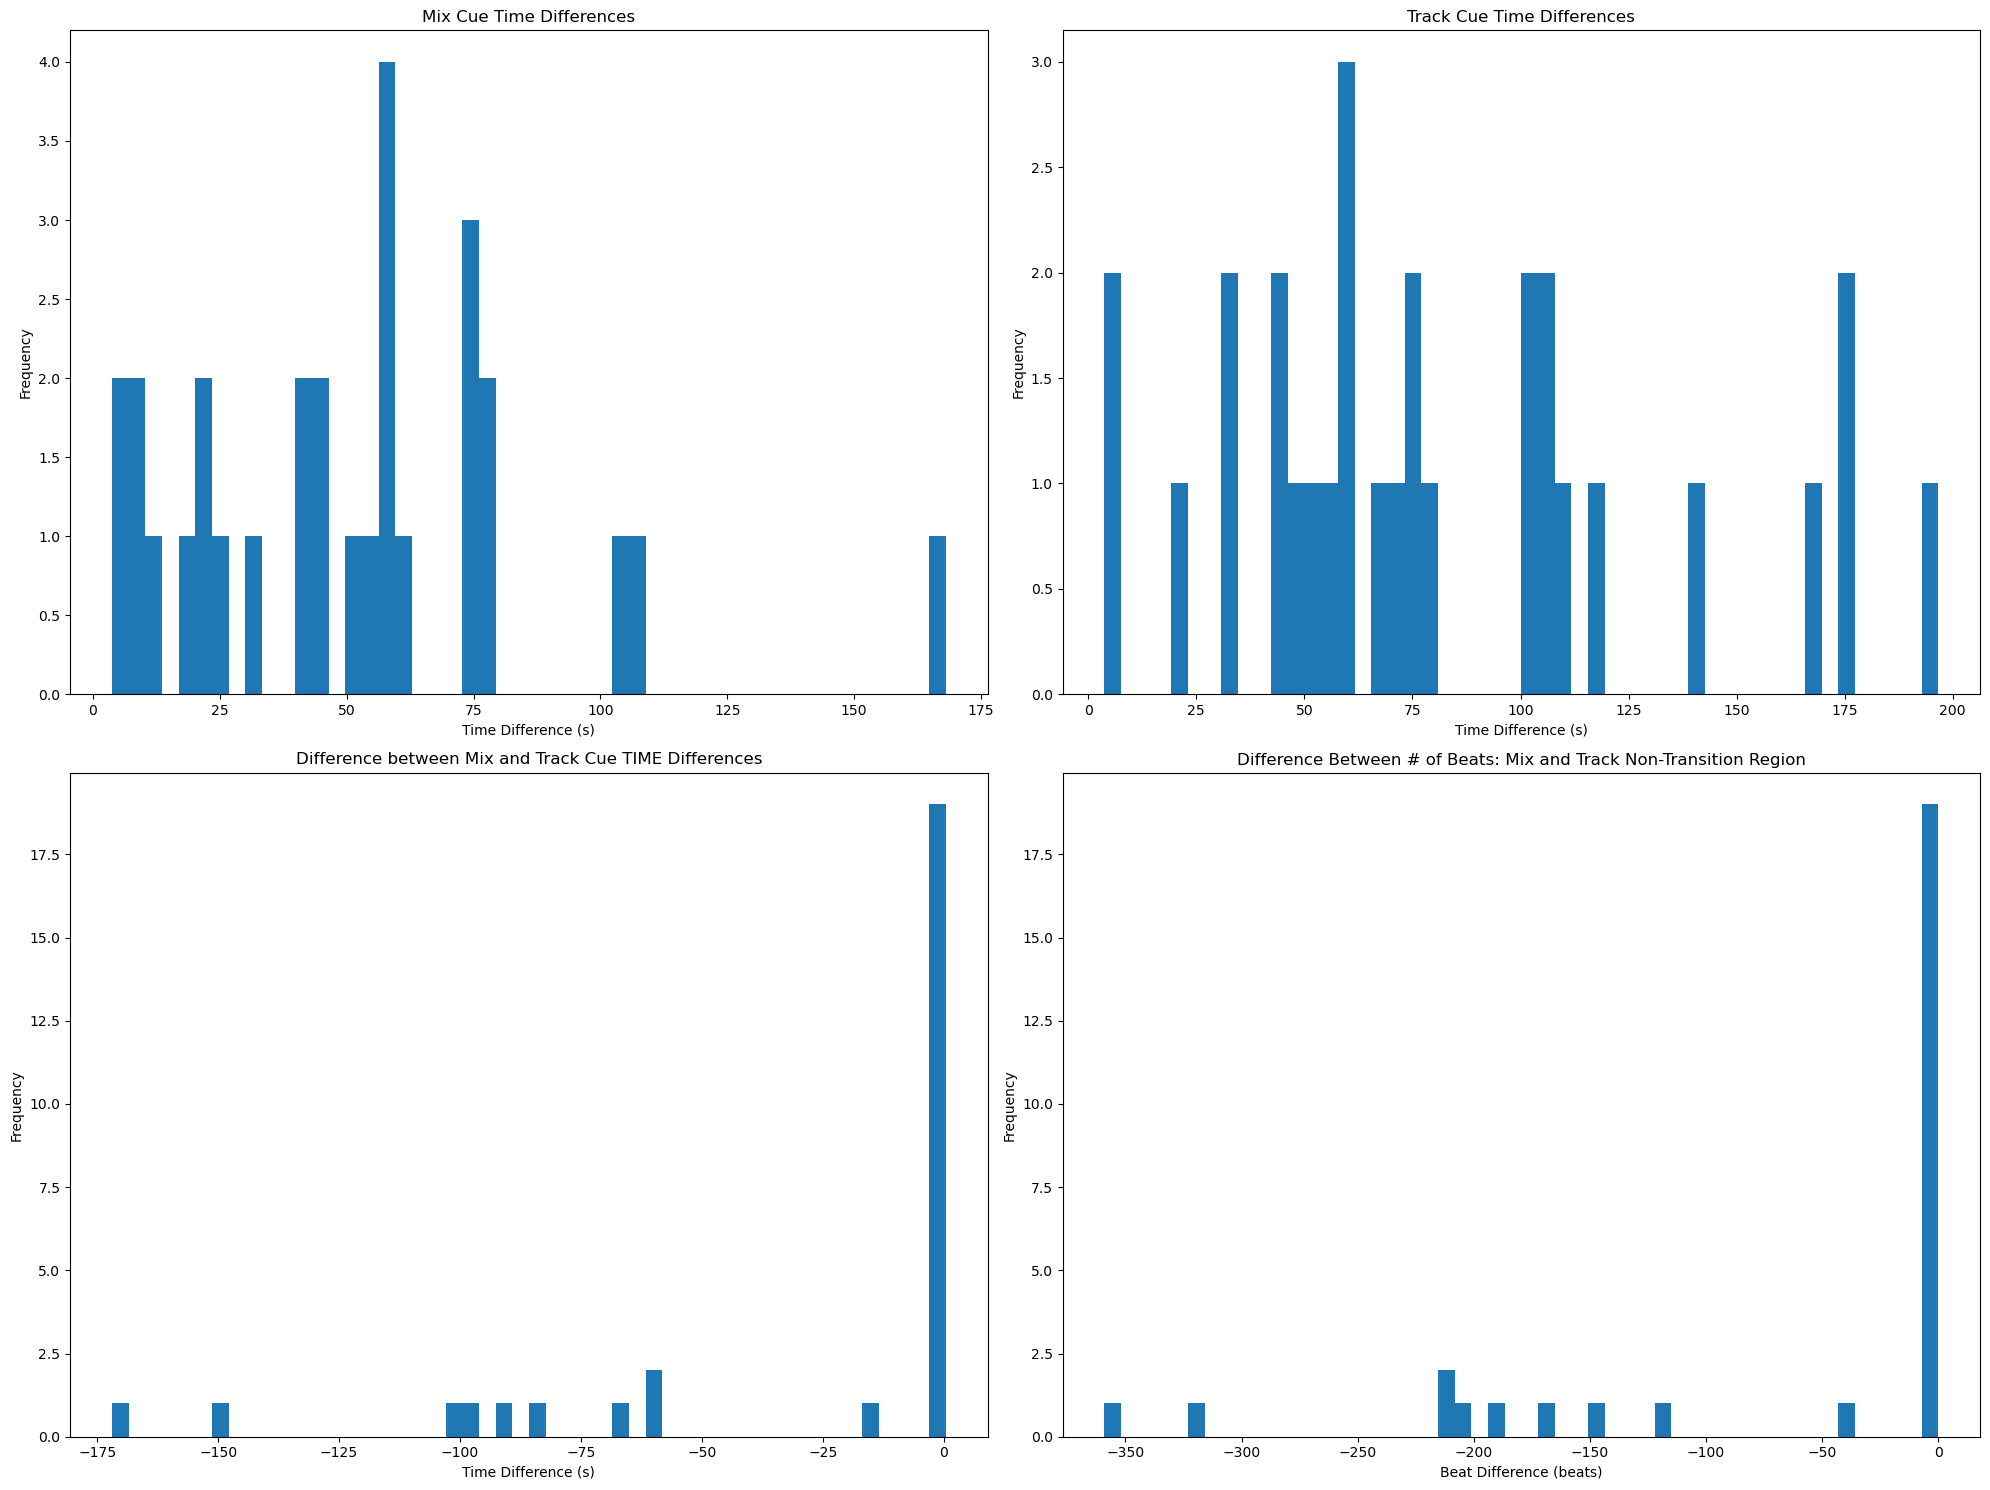

In [103]:
analyze_cue_time_diff(df_sc)

Number of tracks with key changes: 0


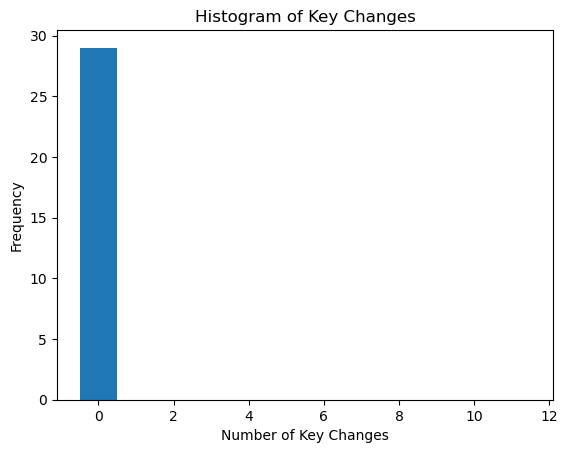

In [104]:
analyze_key_changes(df_sc)

In [105]:
check_cue_time_order(df_sc)

Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 10y0bwb5
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 9p7yws5
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 2n51zgwf
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track nu81jjp
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 10y4b0pp
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 14p436j5


Summary statistics of transition gaps in TIME domain:
count      28.000000
mean       71.404643
std       673.893602
min     -1532.960000
25%         8.282500
50%        27.475000
75%        75.265000
max      1668.790000
Name: time_transition_gap, dtype: float64

Summary statistics of transition gaps in BEAT domain:
count      28.000000
mean      153.714286
std      1463.986740
min     -3388.000000
25%        17.750000
50%        61.500000
75%       162.250000
max      3675.000000
Name: beat_transition_gap, dtype: float64



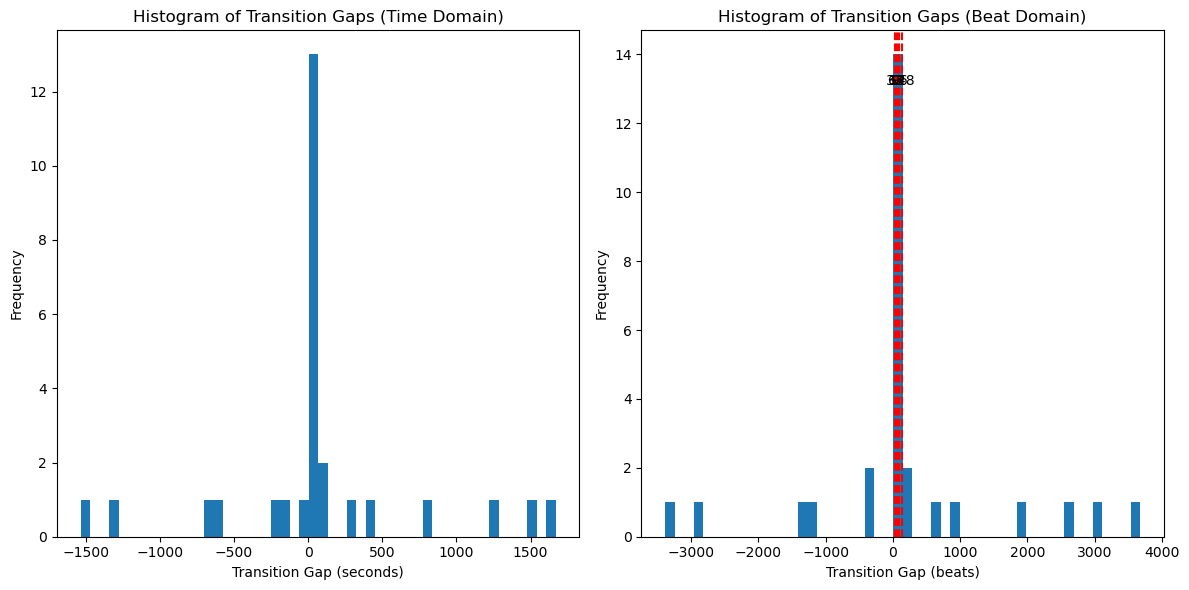

In [106]:
analyze_transition_gaps(df_sc)

In [107]:
df_sc[['track_id', 'match_rate', 'best_cost',
           'mix_cue_in_time', 'mix_cue_out_time', 'track_cue_in_time', 'track_cue_out_time',
           'mix_cue_in_beat', 'mix_cue_out_beat', 'track_cue_in_beat', 'track_cue_out_beat',
           'mix_cue_beat_diff', 'track_cue_beat_diff', 'cue_beat_diff_diff',
           'time_transition_gap', 'beat_transition_gap']].head(8)

track_id  match_rate  best_cost  mix_cue_in_time  mix_cue_out_time  \
0  12t6wktp    1.000000   0.459884            10.43            116.54   
1  16juffhx    1.000000   0.395928           126.90            148.06   
2  258n7bkf    1.000000   0.486539           178.06            250.88   
3  10y0bwb5    0.500000   0.425736            62.02             79.61   
4   g9krvgx    1.000000   0.371544          1748.40           1752.17   
5   9p7yws5    0.383721   0.592837           444.57            503.39   
6  1qc2j195    1.000000   0.595937           528.06            603.28   
7  1mlcb24f    0.439353   0.419636           616.56            692.95   

   track_cue_in_time  track_cue_out_time  mix_cue_in_beat  mix_cue_out_beat  \
0               2.70              109.91               21               239   
1             137.39              158.48              261               306   
2              19.79               92.92              370               526   
3             133.32              167.07              126               162   
4               8.43               12.18             3837              3845   
5              10.99              152.29              958              1091   
6               8.60               83.82             1148              1336   
7               2.39              176.28             1369              1532   

   track_cue_in_beat  track_cue_out_beat  mix_cue_beat_diff  \
0                  5                 223                218   
1                293                 338                 45   
2                 42                 198                156   
3                284                 356                 36   
4                 18                  26                  8   
5                 25                 368                133   
6                 21                 209                188   
7                  5                 376                163   

   track_cue_beat_diff  cue_beat_diff_diff  time_transition_gap  \
0                  218                   0                  NaN   
1                   45                   0                10.36   
2                  156                   0                30.00   
3                   72                 -36              -188.86   
4                    8                   0              1668.79   
5                  343                -210             -1307.60   
6                  188                   0                24.67   
7                  371                -208                13.28   

   beat_transition_gap  
0                  NaN  
1                 22.0  
2                 64.0  
3               -400.0  
4               3675.0  
5              -2887.0  
6                 57.0  
7                 33.0

In [108]:
analyze_match_rate(df_sc)

Match Rate Analysis:
count    29.000000
mean      0.748349
std       0.364110
min       0.073913
25%       0.422819
50%       1.000000
75%       1.000000
max       1.000000
Name: match_rate, dtype: float64
Percentage of Match Rates Equal to 1: 62.07%


In [109]:
df_sc.iloc[3]['wp']

array([[450, 172],
       [449, 172],
       [448, 171],
       [447, 170],
       [446, 169],
       [445, 168],
       [444, 168],
       [443, 168],
       [442, 168],
       [441, 168],
       [440, 167],
       [439, 167],
       [438, 167],
       [437, 167],
       [436, 167],
       [435, 167],
       [434, 167],
       [433, 167],
       [432, 167],
       [431, 167],
       [430, 167],
       [429, 167],
       [428, 167],
       [427, 167],
       [426, 167],
       [425, 167],
       [424, 167],
       [423, 167],
       [422, 167],
       [421, 167],
       [420, 167],
       [419, 167],
       [418, 167],
       [417, 167],
       [416, 167],
       [415, 167],
       [414, 167],
       [413, 167],
       [412, 167],
       [411, 167],
       [410, 167],
       [409, 167],
       [408, 167],
       [407, 167],
       [406, 167],
       [405, 167],
       [404, 167],
       [403, 167],
       [402, 167],
       [401, 167],
       [400, 167],
       [399, 167],
       [398,

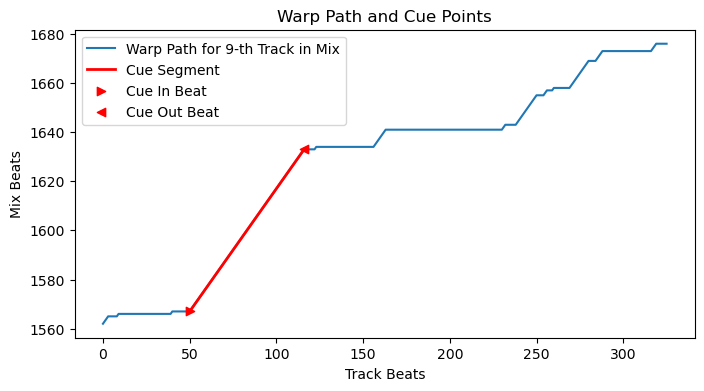

In [110]:
plot_warp_path(df_sc)

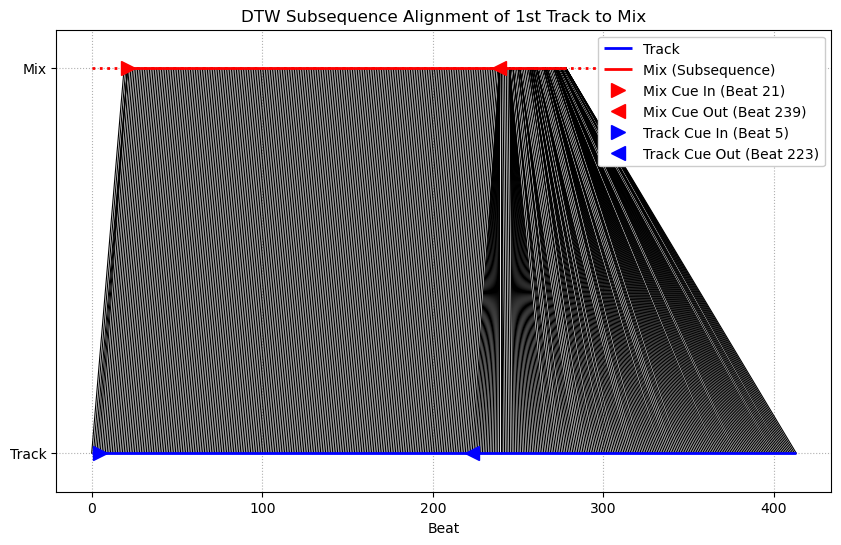

In [111]:
plot_warp_path_connections(df_sc)

In [112]:
df_sc.iloc[0]['wp']

array([[413, 278],
       [412, 278],
       [411, 278],
       [410, 278],
       [409, 278],
       [408, 278],
       [407, 278],
       [406, 278],
       [405, 278],
       [404, 277],
       [403, 277],
       [402, 277],
       [401, 277],
       [400, 277],
       [399, 276],
       [398, 275],
       [397, 275],
       [396, 275],
       [395, 275],
       [394, 275],
       [393, 275],
       [392, 275],
       [391, 275],
       [390, 275],
       [389, 275],
       [388, 275],
       [387, 275],
       [386, 275],
       [385, 275],
       [384, 275],
       [383, 275],
       [382, 275],
       [381, 275],
       [380, 275],
       [379, 275],
       [378, 275],
       [377, 274],
       [376, 273],
       [375, 273],
       [374, 273],
       [373, 273],
       [372, 273],
       [371, 273],
       [370, 273],
       [369, 273],
       [368, 273],
       [367, 273],
       [366, 273],
       [365, 272],
       [364, 272],
       [363, 272],
       [362, 272],
       [361,

# Chroma CQT

In [125]:
df_cqt = pd.read_pickle('../data/align/jwmtj61-chroma_cqt.pkl')

Mix Cue Time Differences:
count     29.000000
mean      77.242414
std       42.100049
min        7.400000
25%       54.860000
50%       68.450000
75%       82.760000
max      181.830000
Name: mix_cue_time_diff, dtype: float64
Standard Deviation: 42.10004891880194

Track Cue Time Differences:
count     29.000000
mean      84.706552
std       48.884474
min        7.520000
25%       55.770000
50%       71.910000
75%      123.990000
max      213.750000
Name: track_cue_time_diff, dtype: float64
Standard Deviation: 48.88447418410223

Difference between Mix and Track Cue TIME Differences:
count     29.000000
mean      -7.464138
std       25.246272
min     -120.210000
25%       -1.070000
50%       -0.260000
75%        0.010000
max        7.080000
Name: cue_time_diff_diff, dtype: float64
Standard Deviation: 25.246272499582062

Difference between Mix and Track Cue BEAT Differences:
count     29.00000
mean     -15.37931
std       53.83335
min     -256.00000
25%        0.00000
50%        0.00000
7

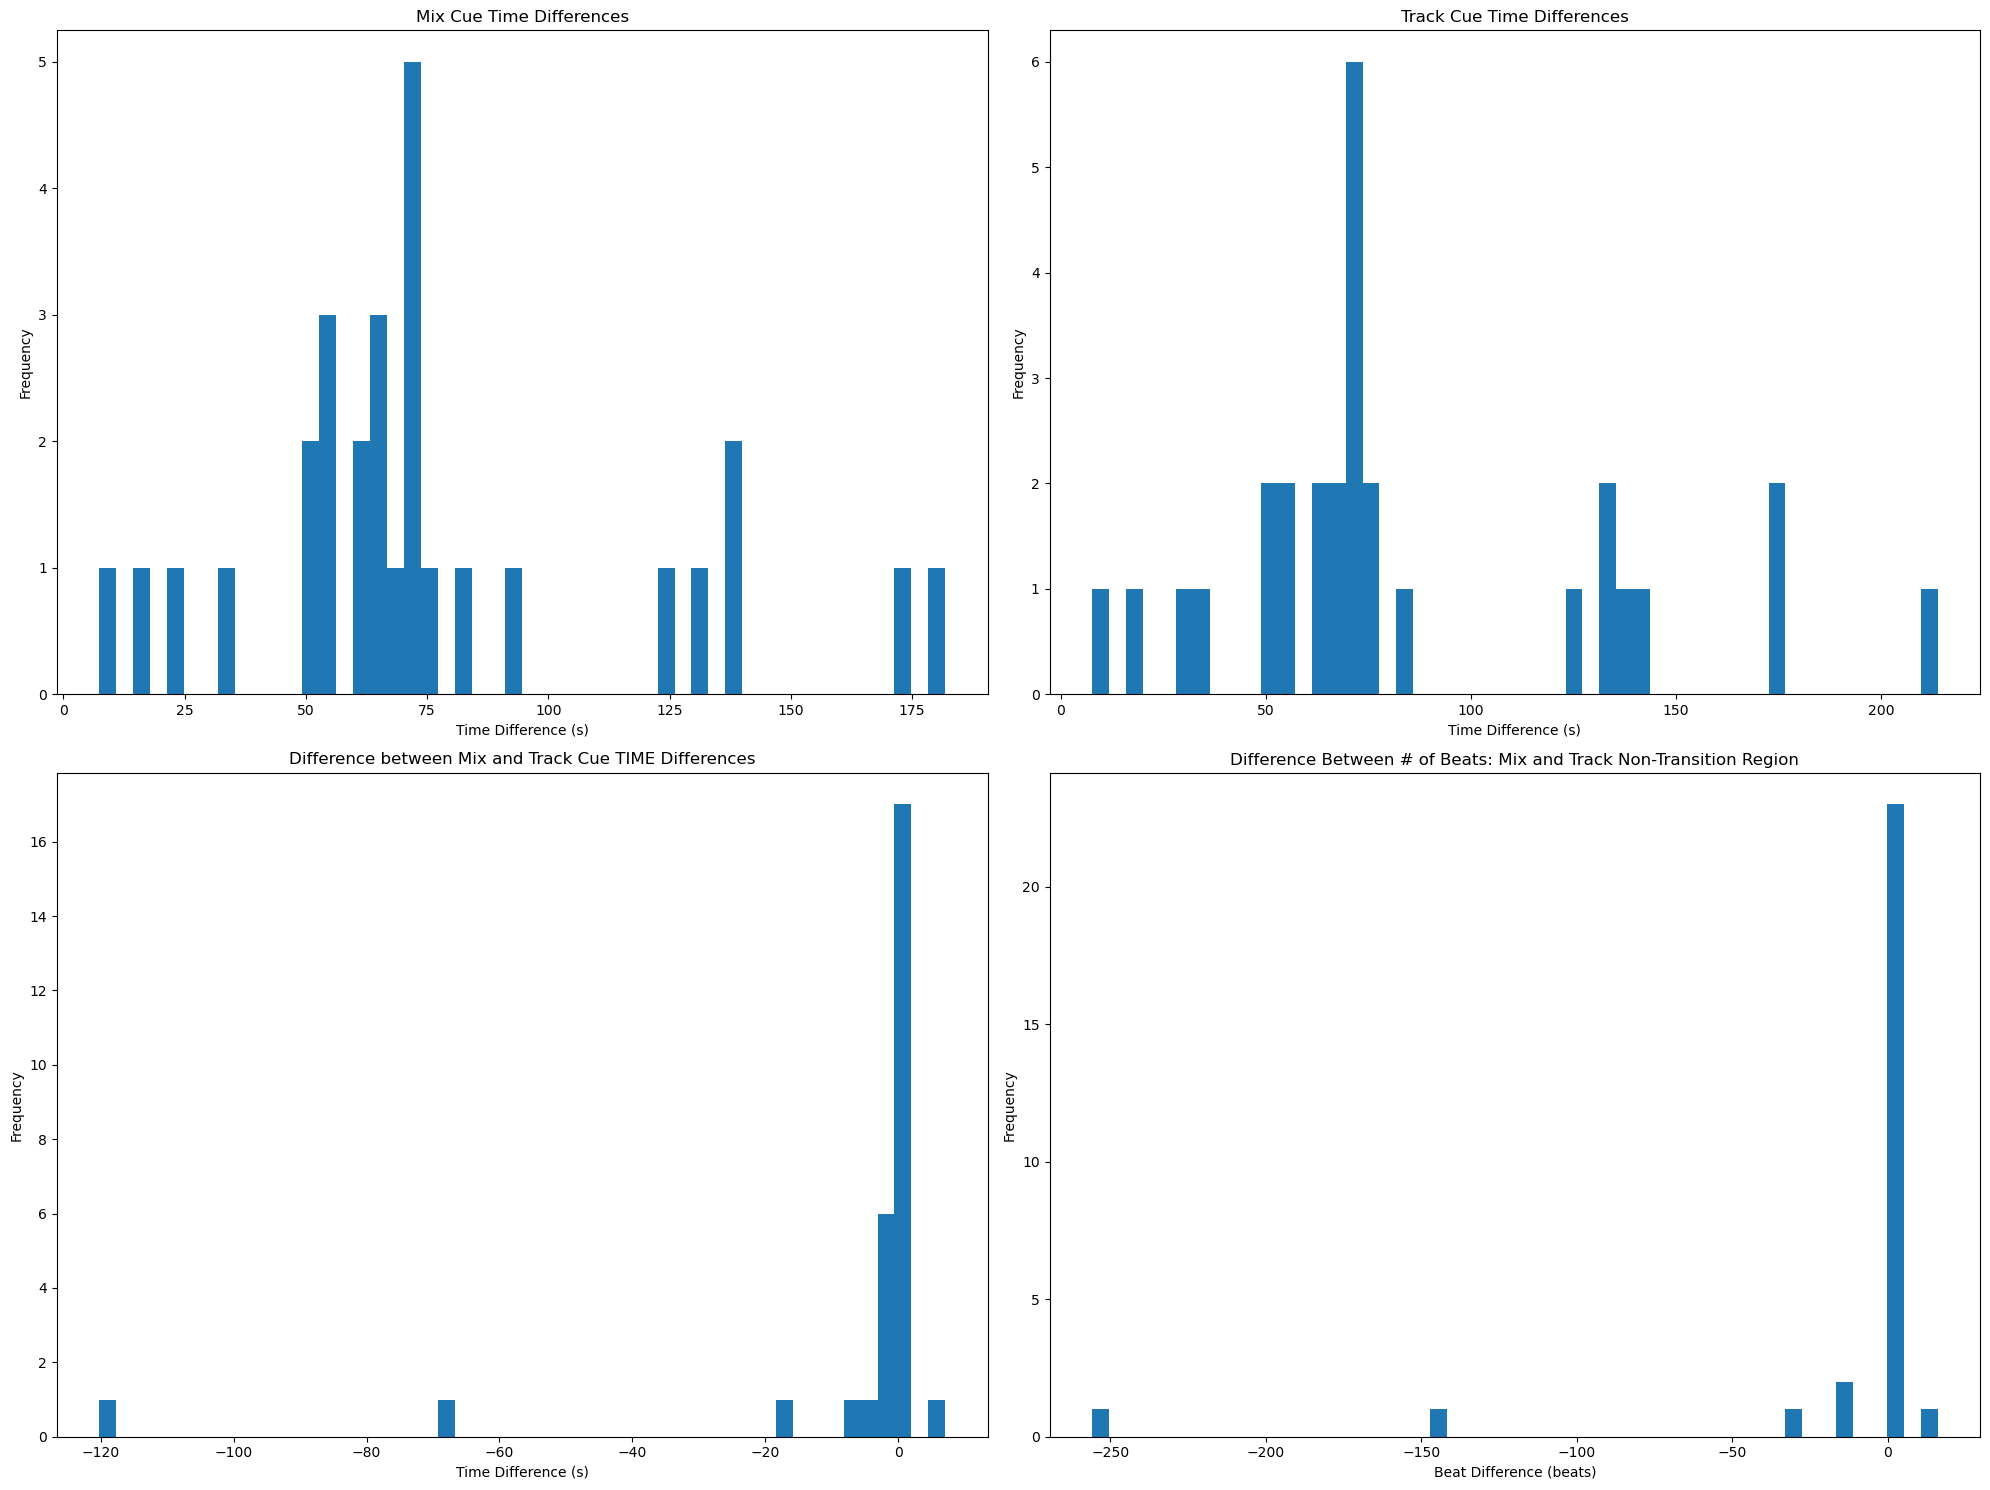

In [126]:
analyze_cue_time_diff(df_cqt)

Number of tracks with key changes: 0


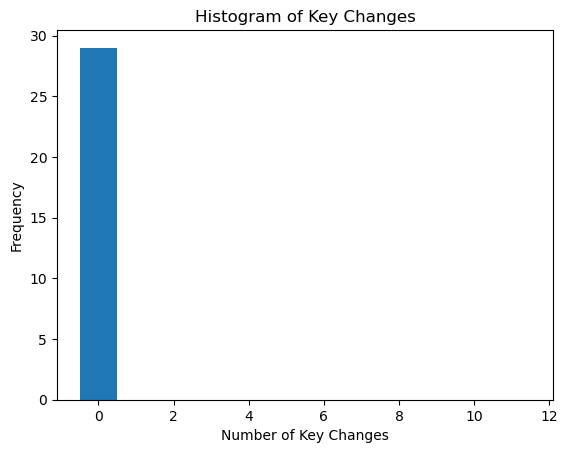

In [127]:
analyze_key_changes(df_cqt)

In [128]:
check_cue_time_order(df_cqt)

All mix_cue_in_time and mix_cue_out_time are in order.


Summary statistics of transition gaps in TIME domain:
count     28.000000
mean      44.293571
std       63.008143
min        0.950000
25%       18.987500
50%       21.450000
75%       39.897500
max      309.660000
Name: time_transition_gap, dtype: float64

Summary statistics of transition gaps in BEAT domain:
count     28.000000
mean      94.464286
std      133.760561
min        2.000000
25%       39.750000
50%       50.000000
75%       82.000000
max      658.000000
Name: beat_transition_gap, dtype: float64



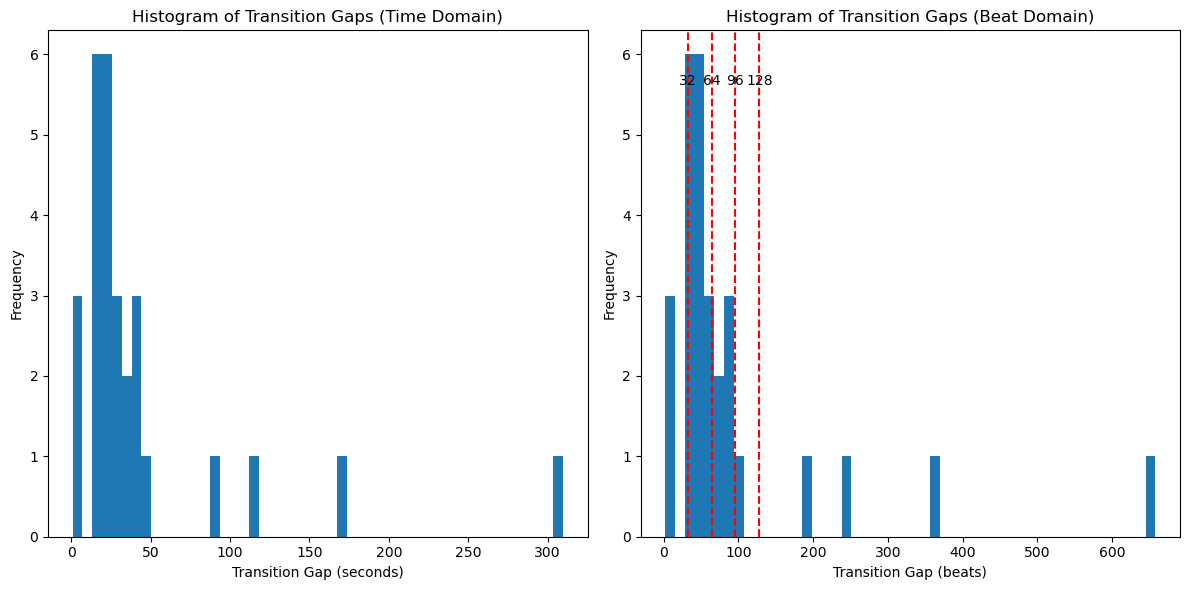

In [129]:
analyze_transition_gaps(df_cqt)

In [130]:
df_cqt[['track_id', 'match_rate', 'best_cost',
           'mix_cue_in_time', 'mix_cue_out_time', 'track_cue_in_time', 'track_cue_out_time',
           'mix_cue_in_beat', 'mix_cue_out_beat', 'track_cue_in_beat', 'track_cue_out_beat',
           'mix_cue_beat_diff', 'track_cue_beat_diff', 'cue_beat_diff_diff',
           'time_transition_gap', 'beat_transition_gap']].head(8)

track_id  match_rate  best_cost  mix_cue_in_time  mix_cue_out_time  \
0  12t6wktp    1.000000   1.849118             7.98             90.74   
1  16juffhx    1.000000   1.965800           109.94            144.77   
2  258n7bkf    1.000000   1.901628           171.98            242.97   
3  10y0bwb5    1.000000   2.418733           275.97            336.60   
4   g9krvgx    0.916168   1.500722           354.95            417.42   
5   9p7yws5    1.000000   2.209096           438.06            504.29   
6  1qc2j195    1.000000   2.196451           525.65            598.06   
7  1mlcb24f    1.000000   1.923760           615.27            688.73   

   track_cue_in_time  track_cue_out_time  mix_cue_in_beat  mix_cue_out_beat  \
0               0.23               83.36               16               185   
1              15.51               50.20              225               299   
2              13.71               84.96              357               509   
3              50.82              112.23              580               711   
4              10.31               77.18              751               904   
5               4.47               69.39              943              1093   
6               6.20               78.60             1142              1323   
7               0.96               74.58             1366              1523   

   track_cue_in_beat  track_cue_out_beat  mix_cue_beat_diff  \
0                  0                 169                169   
1                 33                 107                 74   
2                 29                 181                152   
3                108                 239                131   
4                 22                 189                153   
5                 10                 160                150   
6                 15                 196                181   
7                  2                 159                157   

   track_cue_beat_diff  cue_beat_diff_diff  time_transition_gap  \
0                  169                   0                  NaN   
1                   74                   0                19.20   
2                  152                   0                27.21   
3                  131                   0                33.00   
4                  167                 -14                18.35   
5                  150                   0                20.64   
6                  181                   0                21.36   
7                  157                   0                17.21   

   beat_transition_gap  
0                  NaN  
1                 40.0  
2                 58.0  
3                 71.0  
4                 40.0  
5                 39.0  
6                 49.0  
7                 43.0

In [131]:
analyze_match_rate(df_cqt)

Match Rate Analysis:
count    29.000000
mean      0.940826
std       0.145502
min       0.438596
25%       0.989418
50%       1.000000
75%       1.000000
max       1.000000
Name: match_rate, dtype: float64
Percentage of Match Rates Equal to 1: 72.41%


In [132]:
df_cqt.iloc[3]['wp']

array([[450, 760],
       [449, 759],
       [448, 759],
       [447, 759],
       [446, 759],
       [445, 759],
       [444, 758],
       [443, 758],
       [442, 758],
       [441, 758],
       [440, 758],
       [439, 758],
       [438, 758],
       [437, 758],
       [436, 758],
       [435, 758],
       [434, 758],
       [433, 758],
       [432, 758],
       [431, 758],
       [430, 758],
       [429, 758],
       [428, 758],
       [427, 758],
       [426, 758],
       [425, 758],
       [424, 758],
       [423, 758],
       [422, 758],
       [421, 758],
       [420, 758],
       [419, 758],
       [418, 758],
       [417, 758],
       [416, 758],
       [415, 758],
       [414, 758],
       [413, 758],
       [412, 758],
       [411, 758],
       [410, 758],
       [409, 758],
       [408, 758],
       [407, 758],
       [406, 758],
       [405, 758],
       [404, 758],
       [403, 758],
       [402, 758],
       [401, 757],
       [400, 756],
       [399, 755],
       [398,

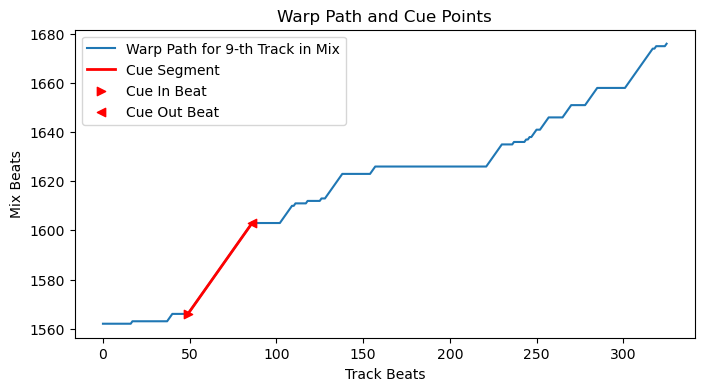

In [136]:
plot_warp_path(df_cqt)

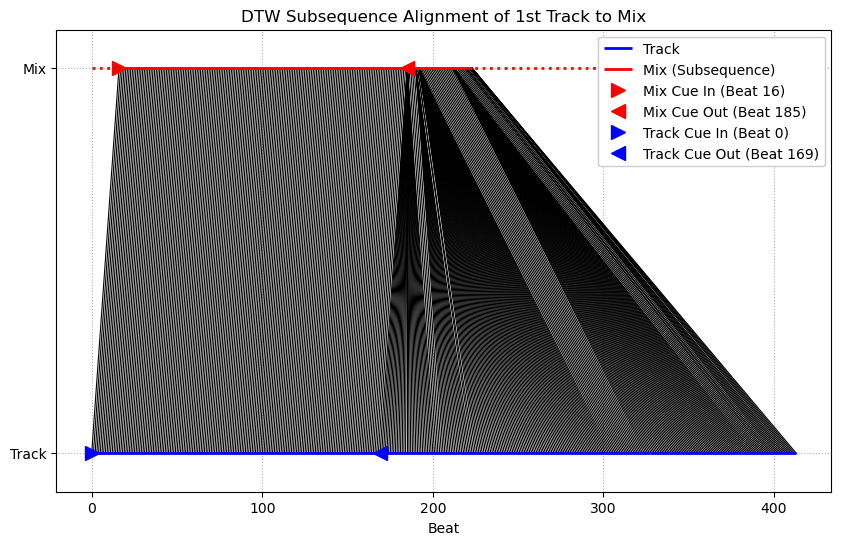

In [137]:
plot_warp_path_connections(df_cqt)

In [138]:
df_cqt.iloc[0]['wp']

array([[413, 223],
       [412, 223],
       [411, 223],
       [410, 223],
       [409, 223],
       [408, 223],
       [407, 222],
       [406, 222],
       [405, 222],
       [404, 222],
       [403, 222],
       [402, 222],
       [401, 222],
       [400, 222],
       [399, 221],
       [398, 220],
       [397, 220],
       [396, 219],
       [395, 219],
       [394, 218],
       [393, 217],
       [392, 216],
       [391, 215],
       [390, 214],
       [389, 213],
       [388, 212],
       [387, 212],
       [386, 212],
       [385, 212],
       [384, 212],
       [383, 212],
       [382, 212],
       [381, 212],
       [380, 212],
       [379, 212],
       [378, 212],
       [377, 212],
       [376, 212],
       [375, 212],
       [374, 212],
       [373, 212],
       [372, 212],
       [371, 212],
       [370, 212],
       [369, 212],
       [368, 212],
       [367, 212],
       [366, 212],
       [365, 212],
       [364, 212],
       [363, 212],
       [362, 212],
       [361,

# Downbeat Prob

In [139]:
df_db = pd.read_pickle('../data/align/jwmtj61-downbeat_prob.pkl')

Mix Cue Time Differences:
count     29.000000
mean      47.560345
std       53.869602
min        3.800000
25%       10.780000
50%       25.640000
75%       80.710000
max      196.540000
Name: mix_cue_time_diff, dtype: float64
Standard Deviation: 53.869602181216756

Track Cue Time Differences:
count     29.000000
mean      58.111379
std       67.393701
min        3.550000
25%       10.330000
50%       26.180000
75%       91.300000
max      220.000000
Name: track_cue_time_diff, dtype: float64
Standard Deviation: 67.39370120653169

Difference between Mix and Track Cue TIME Differences:
count     29.000000
mean     -10.551034
std       24.866251
min     -102.820000
25%       -1.610000
50%       -0.070000
75%        0.110000
max        1.780000
Name: cue_time_diff_diff, dtype: float64
Standard Deviation: 24.866251274831406

Difference between Mix and Track Cue BEAT Differences:
count     29.000000
mean     -25.344828
std       60.225929
min     -222.000000
25%       -1.000000
50%        0.0

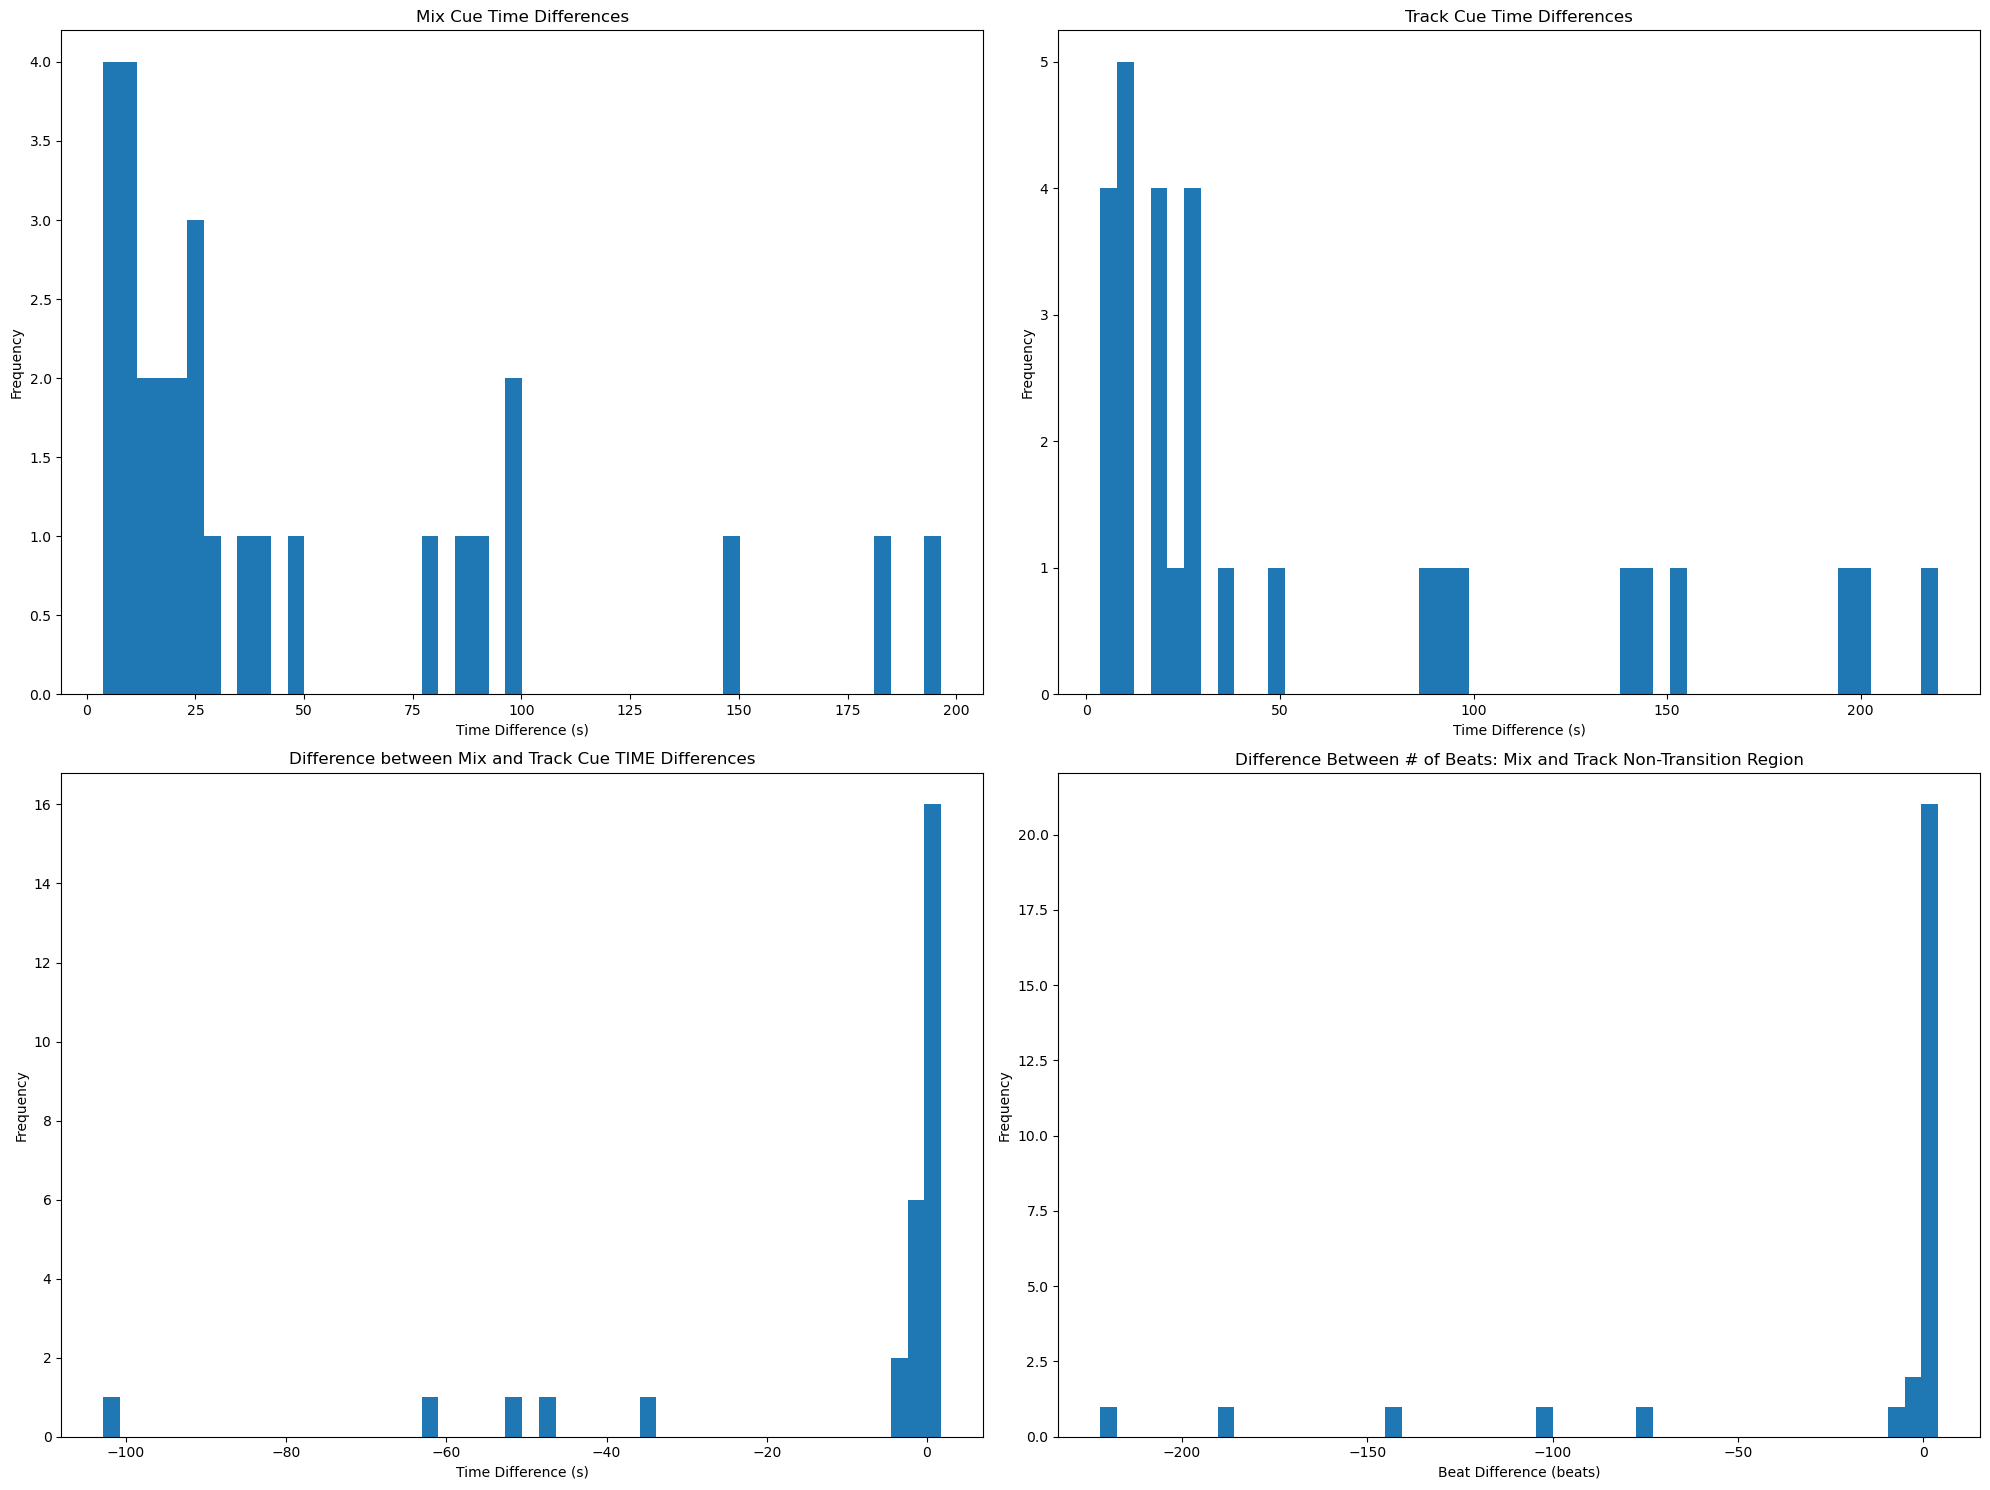

In [140]:
analyze_cue_time_diff(df_db)

Number of tracks with key changes: 0


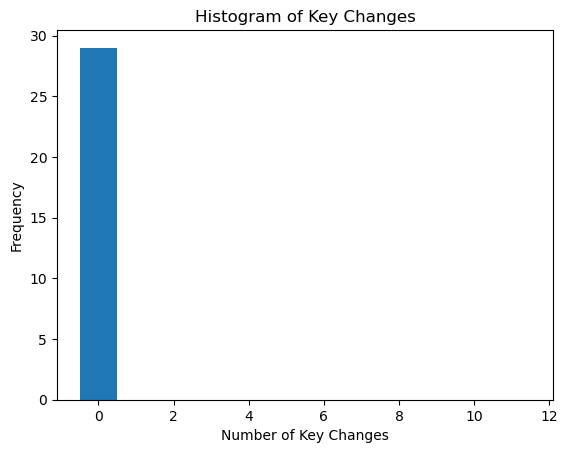

In [141]:
analyze_key_changes(df_db)

In [142]:
check_cue_time_order(df_db)

Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 16juffhx
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 9p7yws5
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 1mlcb24f
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 1zpfjwkx
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 1s73nhd5
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 2rwj144f
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 2fnjbkm5
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 2bvj420x
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 2n51zgwf
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track nu81jjp
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 2m76b78x
Error: mix_cue_in_time is not after previous 

Summary statistics of transition gaps in TIME domain:
count      28.000000
mean      -49.903214
std      1261.006160
min     -2621.050000
25%      -309.007500
50%       -60.530000
75%       262.982500
max      2719.360000
Name: time_transition_gap, dtype: float64

Summary statistics of transition gaps in BEAT domain:
count      28.000000
mean     -104.285714
std      2693.892913
min     -5652.000000
25%      -652.250000
50%      -127.500000
75%       555.250000
max      5857.000000
Name: beat_transition_gap, dtype: float64



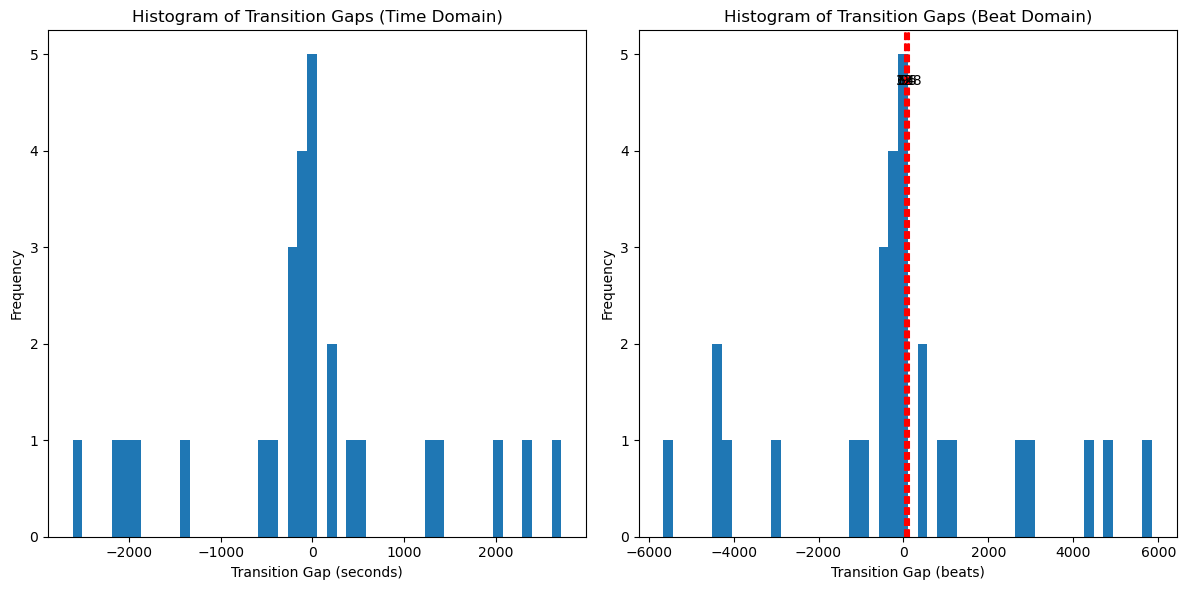

In [143]:
analyze_transition_gaps(df_db)

In [144]:
df_db[['track_id', 'match_rate', 'best_cost',
           'mix_cue_in_time', 'mix_cue_out_time', 'track_cue_in_time', 'track_cue_out_time',
           'mix_cue_in_beat', 'mix_cue_out_beat', 'track_cue_in_beat', 'track_cue_out_beat',
           'mix_cue_beat_diff', 'track_cue_beat_diff', 'cue_beat_diff_diff',
           'time_transition_gap', 'beat_transition_gap']].head(8)

track_id  match_rate  best_cost  mix_cue_in_time  mix_cue_out_time  \
0  12t6wktp    1.000000   0.659461          2706.30           2731.94   
1  16juffhx    0.876106   0.729361           110.89            160.73   
2  258n7bkf    1.000000   0.711801           179.45            197.25   
3  10y0bwb5    1.000000   0.938498          2916.61           2925.63   
4   g9krvgx    1.000000   0.682008          2926.58           2941.30   
5   9p7yws5    0.356522   0.743078          2713.89           2753.77   
6  1qc2j195    1.000000   0.678780          3133.46           3140.01   
7  1mlcb24f    1.000000   0.784691          2681.61           2686.36   

   track_cue_in_time  track_cue_out_time  mix_cue_in_beat  mix_cue_out_beat  \
0             149.26              175.82             5825              5879   
1              16.45               66.14              227               333   
2              21.21               39.02              373               411   
3             103.32              112.23             6268              6287   
4              98.18              116.78             6289              6320   
5              56.21              147.51             5841              5925   
6             139.41              145.02             6730              6744   
7              55.83               60.52             5773              5783   

   track_cue_in_beat  track_cue_out_beat  mix_cue_beat_diff  \
0                303                 357                 54   
1                 35                 141                106   
2                 45                  83                 38   
3                220                 239                 19   
4                224                 255                 31   
5                129                 357                 84   
6                348                 362                 14   
7                119                 129                 10   

   track_cue_beat_diff  cue_beat_diff_diff  time_transition_gap  \
0                   54                   0                  NaN   
1                  106                   0             -2621.05   
2                   38                   0                18.72   
3                   19                   0              2719.36   
4                   31                   0                 0.95   
5                  228                -144              -227.41   
6                   14                   0               379.69   
7                   10                   0              -458.40   

   beat_transition_gap  
0                  NaN  
1              -5652.0  
2                 40.0  
3               5857.0  
4                  2.0  
5               -479.0  
6                805.0  
7               -971.0

In [145]:
analyze_match_rate(df_db)

Match Rate Analysis:
count    29.000000
mean      0.884230
std       0.189876
min       0.356522
25%       0.883041
50%       1.000000
75%       1.000000
max       1.000000
Name: match_rate, dtype: float64
Percentage of Match Rates Equal to 1: 55.17%


In [146]:
df_db.iloc[3]['wp']

array([[ 449, 6395],
       [ 448, 6395],
       [ 447, 6395],
       [ 446, 6395],
       [ 445, 6394],
       [ 445, 6393],
       [ 445, 6392],
       [ 444, 6391],
       [ 443, 6390],
       [ 442, 6390],
       [ 441, 6390],
       [ 440, 6390],
       [ 439, 6390],
       [ 438, 6390],
       [ 437, 6390],
       [ 436, 6390],
       [ 435, 6390],
       [ 434, 6390],
       [ 433, 6390],
       [ 432, 6389],
       [ 431, 6388],
       [ 431, 6387],
       [ 430, 6386],
       [ 429, 6385],
       [ 428, 6384],
       [ 427, 6383],
       [ 426, 6383],
       [ 425, 6382],
       [ 424, 6382],
       [ 423, 6381],
       [ 422, 6381],
       [ 421, 6381],
       [ 420, 6381],
       [ 419, 6381],
       [ 418, 6381],
       [ 417, 6381],
       [ 416, 6380],
       [ 415, 6379],
       [ 414, 6379],
       [ 413, 6378],
       [ 413, 6377],
       [ 412, 6376],
       [ 411, 6375],
       [ 410, 6374],
       [ 409, 6373],
       [ 408, 6372],
       [ 407, 6371],
       [ 406,

In [149]:
# # Fails because warp path is not 1-to-1
# plot_warp_path(df_db)

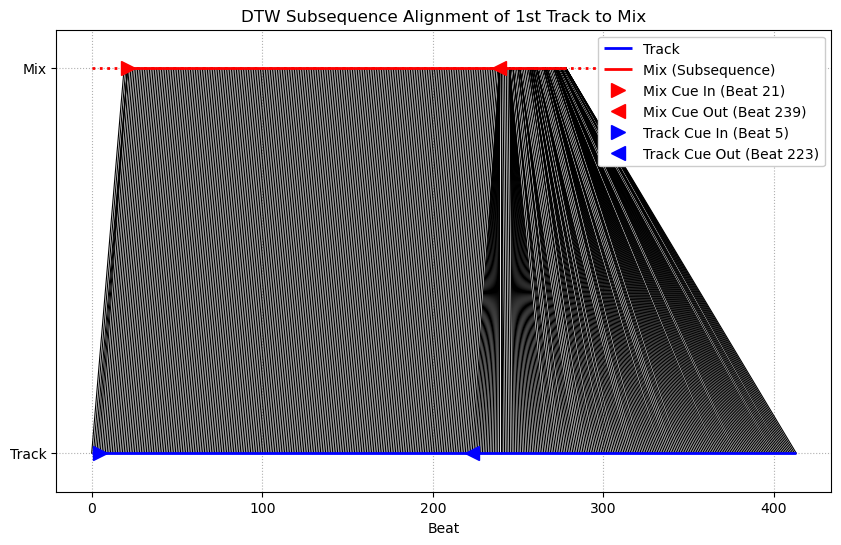

In [ ]:
plot_warp_path_connections(df_db)

In [148]:
df_db.iloc[0]['wp']

array([[ 412, 5911],
       [ 411, 5911],
       [ 410, 5911],
       [ 409, 5911],
       [ 408, 5911],
       [ 407, 5911],
       [ 406, 5911],
       [ 405, 5911],
       [ 404, 5911],
       [ 403, 5911],
       [ 402, 5911],
       [ 401, 5911],
       [ 400, 5911],
       [ 399, 5911],
       [ 398, 5911],
       [ 397, 5911],
       [ 396, 5910],
       [ 395, 5909],
       [ 394, 5909],
       [ 393, 5909],
       [ 392, 5908],
       [ 391, 5907],
       [ 390, 5906],
       [ 389, 5905],
       [ 388, 5904],
       [ 387, 5903],
       [ 386, 5902],
       [ 385, 5901],
       [ 384, 5900],
       [ 383, 5899],
       [ 382, 5898],
       [ 381, 5897],
       [ 380, 5896],
       [ 379, 5895],
       [ 378, 5894],
       [ 377, 5893],
       [ 376, 5892],
       [ 375, 5891],
       [ 374, 5890],
       [ 373, 5889],
       [ 372, 5888],
       [ 371, 5887],
       [ 370, 5886],
       [ 369, 5885],
       [ 368, 5884],
       [ 367, 5883],
       [ 366, 5883],
       [ 365,

# Onset Strength

In [150]:
df_os = pd.read_pickle('../data/align/jwmtj61-onset_strength.pkl')

Mix Cue Time Differences:
count     29.000000
mean      46.457241
std       42.656027
min        3.730000
25%       11.520000
50%       32.410000
75%       69.740000
max      151.710000
Name: mix_cue_time_diff, dtype: float64
Standard Deviation: 42.65602703157228

Track Cue Time Differences:
count     29.000000
mean      76.424138
std       76.004448
min        3.760000
25%       11.450000
50%       51.900000
75%      130.800000
max      297.050000
Name: track_cue_time_diff, dtype: float64
Standard Deviation: 76.00444824939251

Difference between Mix and Track Cue TIME Differences:
count     29.000000
mean     -29.966897
std       42.912064
min     -145.340000
25%      -48.740000
50%       -2.250000
75%       -0.030000
max        0.920000
Name: cue_time_diff_diff, dtype: float64
Standard Deviation: 42.91206383020385

Difference between Mix and Track Cue BEAT Differences:
count     29.000000
mean     -63.241379
std       90.122003
min     -286.000000
25%      -98.000000
50%        0.000

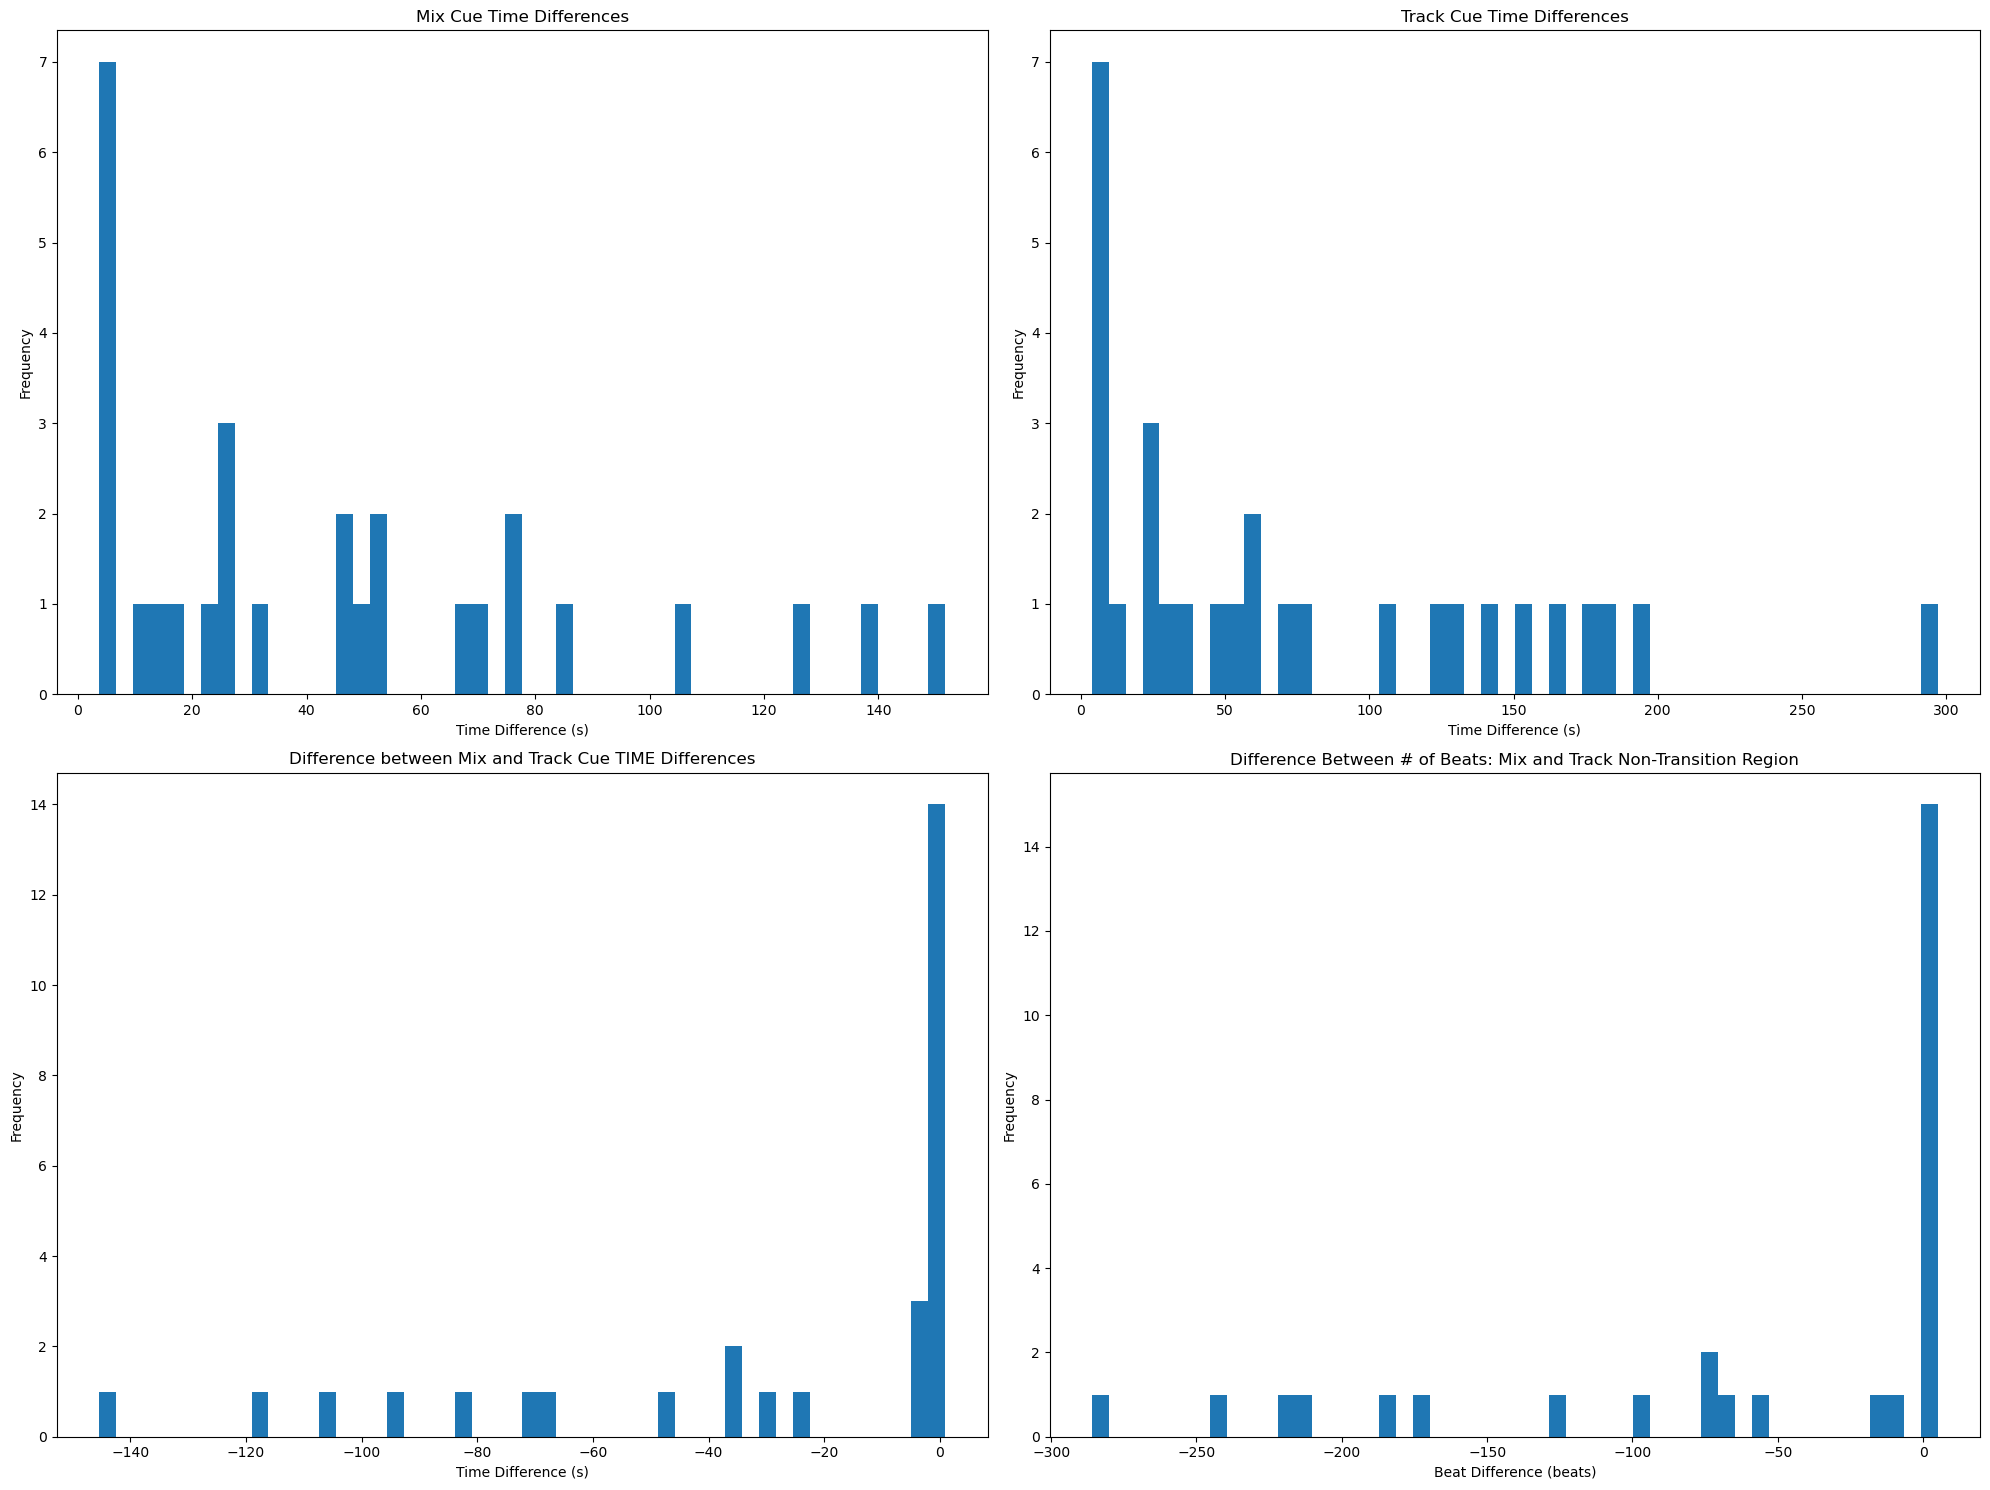

In [151]:
analyze_cue_time_diff(df_os)

Number of tracks with key changes: 0


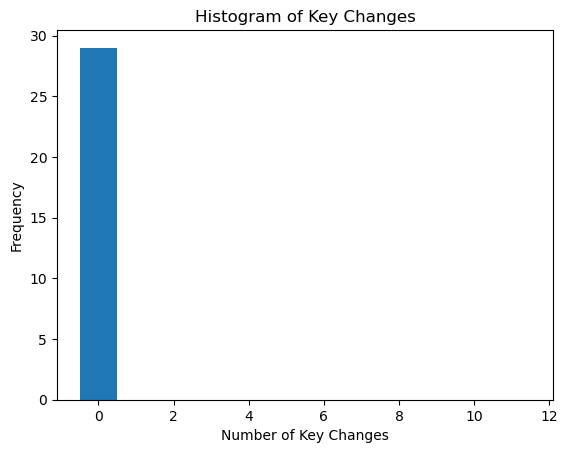

In [152]:
analyze_key_changes(df_os)

In [153]:
check_cue_time_order(df_os)

Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 258n7bkf
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track g9krvgx
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 1qc2j195
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 1mlcb24f
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 1b82c47p
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 2fnjbkm5
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 2bvj420x
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 2bv3tl05
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 2m76b78x
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 1xsvq5t5
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 10xzy06p
Error: mix_cue_in_time is not after previous

Summary statistics of transition gaps in TIME domain:
count      28.000000
mean       21.008929
std       979.572047
min     -2248.090000
25%      -407.007500
50%        33.435000
75%       658.315000
max      1685.140000
Name: time_transition_gap, dtype: float64

Summary statistics of transition gaps in BEAT domain:
count      28.000000
mean       43.178571
std      2083.112558
min     -4757.000000
25%      -828.500000
50%        71.500000
75%      1412.500000
max      3531.000000
Name: beat_transition_gap, dtype: float64



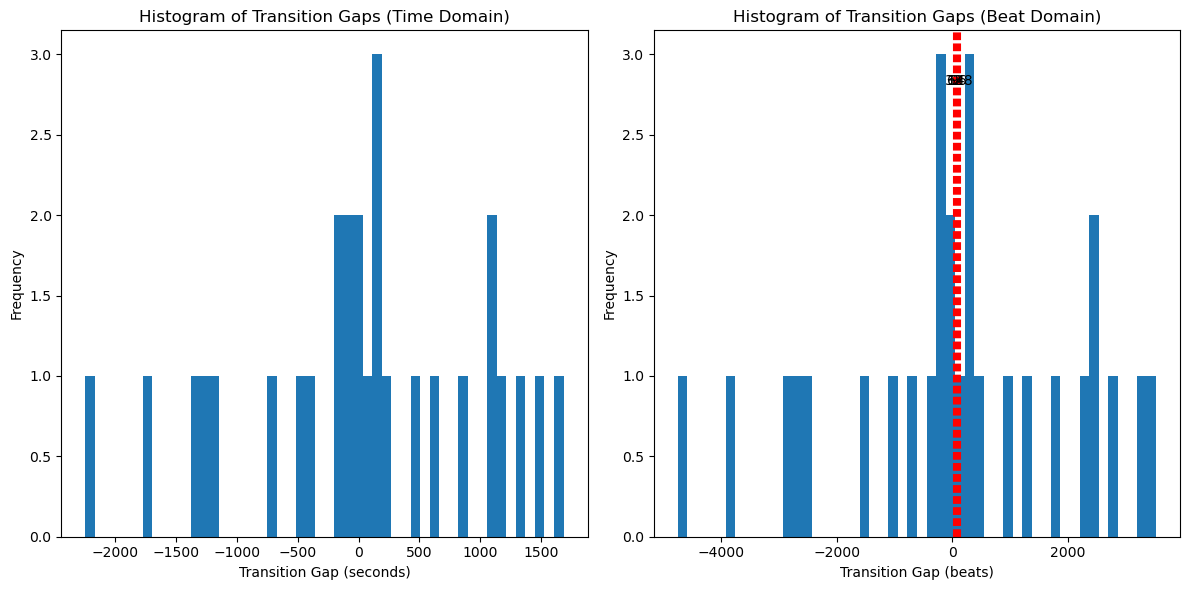

In [154]:
analyze_transition_gaps(df_os)

In [155]:
df_os[['track_id', 'match_rate', 'best_cost',
           'mix_cue_in_time', 'mix_cue_out_time', 'track_cue_in_time', 'track_cue_out_time',
           'mix_cue_in_beat', 'mix_cue_out_beat', 'track_cue_in_beat', 'track_cue_out_beat',
           'mix_cue_beat_diff', 'track_cue_beat_diff', 'cue_beat_diff_diff',
           'time_transition_gap', 'beat_transition_gap']].head(8)

track_id  match_rate  best_cost  mix_cue_in_time  mix_cue_out_time  \
0  12t6wktp    0.400517   1.018060          1555.91           1641.16   
1  16juffhx    1.000000   0.926199          3326.30           3330.51   
2  258n7bkf    0.349398   0.804416          1962.62           1976.16   
3  10y0bwb5    1.000000   0.774501          2142.91           2148.05   
4   g9krvgx    0.402299   0.831212           374.65            427.40   
5   9p7yws5    1.000000   0.741932          1882.33           1886.52   
6  1qc2j195    0.328597   0.714950          1871.13           1996.24   
7  1mlcb24f    1.000000   0.787271          1868.33           1872.06   

   track_cue_in_time  track_cue_out_time  mix_cue_in_beat  mix_cue_out_beat  \
0              18.93              197.43             3432              3611   
1              60.98               65.20             7142              7151   
2              85.90              124.80             4296              4325   
3               8.64               12.86             4672              4681   
4              31.39              155.18              802               922   
5              47.08               50.99             4124              4133   
6               3.00              194.93             4100              4368   
7               7.07               10.83             4094              4102   

   track_cue_in_beat  track_cue_out_beat  mix_cue_beat_diff  \
0                 38                 401                179   
1                130                 139                  9   
2                183                 266                 29   
3                 18                  27                  9   
4                 73                 319                120   
5                108                 117                  9   
6                  7                 487                268   
7                 15                  23                  8   

   track_cue_beat_diff  cue_beat_diff_diff  time_transition_gap  \
0                  363                -184                  NaN   
1                    9                   0              1685.14   
2                   83                 -54             -1367.89   
3                    9                   0               166.75   
4                  246                -126             -1773.40   
5                    9                   0              1454.93   
6                  480                -212               -15.39   
7                    8                   0              -127.91   

   beat_transition_gap  
0                  NaN  
1               3531.0  
2              -2855.0  
3                347.0  
4              -3879.0  
5               3202.0  
6                -33.0  
7               -274.0

In [156]:
analyze_match_rate(df_os)

Match Rate Analysis:
count    29.000000
mean      0.661577
std       0.292733
min       0.259259
25%       0.370425
50%       0.642857
75%       1.000000
max       1.000000
Name: match_rate, dtype: float64
Percentage of Match Rates Equal to 1: 31.03%


In [157]:
df_os.iloc[3]['wp']

array([[ 450, 4804],
       [ 449, 4803],
       [ 448, 4802],
       [ 447, 4802],
       [ 446, 4802],
       [ 445, 4802],
       [ 444, 4802],
       [ 443, 4802],
       [ 442, 4801],
       [ 441, 4801],
       [ 440, 4800],
       [ 439, 4799],
       [ 438, 4798],
       [ 437, 4798],
       [ 436, 4798],
       [ 435, 4798],
       [ 434, 4798],
       [ 433, 4797],
       [ 432, 4796],
       [ 431, 4795],
       [ 430, 4794],
       [ 429, 4794],
       [ 428, 4794],
       [ 427, 4794],
       [ 426, 4794],
       [ 425, 4794],
       [ 424, 4793],
       [ 423, 4793],
       [ 422, 4792],
       [ 421, 4792],
       [ 420, 4792],
       [ 419, 4792],
       [ 418, 4792],
       [ 417, 4792],
       [ 416, 4792],
       [ 415, 4792],
       [ 414, 4792],
       [ 413, 4791],
       [ 412, 4790],
       [ 411, 4790],
       [ 410, 4789],
       [ 410, 4788],
       [ 410, 4787],
       [ 409, 4786],
       [ 409, 4785],
       [ 408, 4784],
       [ 407, 4784],
       [ 406,

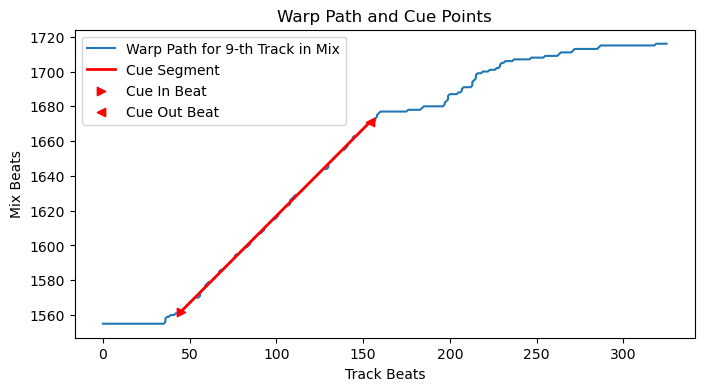

In [158]:
plot_warp_path(df_os)

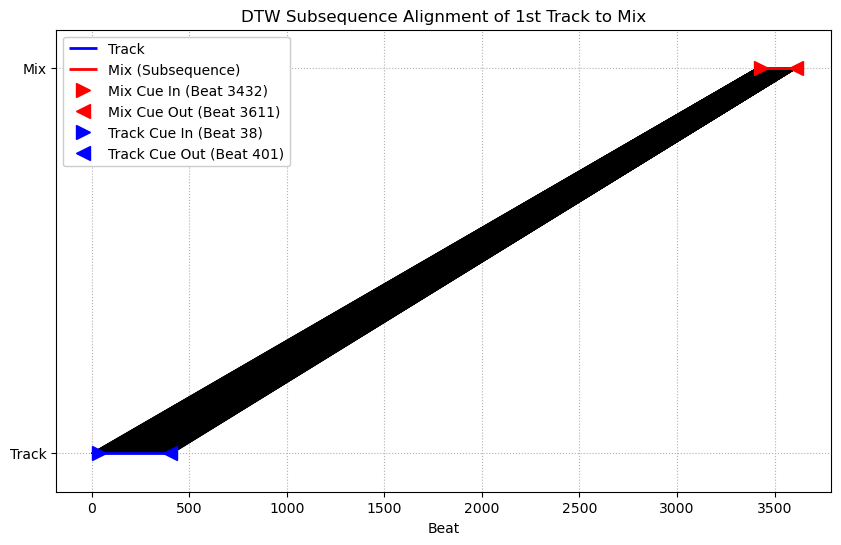

In [159]:
plot_warp_path_connections(df_os)

In [160]:
df_os.iloc[0]['wp']

array([[ 413, 3611],
       [ 412, 3611],
       [ 411, 3611],
       [ 410, 3611],
       [ 409, 3611],
       [ 408, 3611],
       [ 407, 3611],
       [ 406, 3611],
       [ 405, 3611],
       [ 404, 3611],
       [ 403, 3611],
       [ 402, 3611],
       [ 401, 3611],
       [ 400, 3610],
       [ 399, 3609],
       [ 398, 3608],
       [ 397, 3607],
       [ 396, 3606],
       [ 395, 3606],
       [ 394, 3606],
       [ 393, 3606],
       [ 392, 3606],
       [ 391, 3606],
       [ 390, 3606],
       [ 389, 3606],
       [ 388, 3606],
       [ 387, 3606],
       [ 386, 3606],
       [ 385, 3606],
       [ 384, 3606],
       [ 383, 3606],
       [ 382, 3606],
       [ 381, 3606],
       [ 380, 3606],
       [ 379, 3605],
       [ 378, 3604],
       [ 377, 3603],
       [ 376, 3603],
       [ 375, 3603],
       [ 374, 3602],
       [ 373, 3601],
       [ 372, 3601],
       [ 371, 3600],
       [ 370, 3599],
       [ 370, 3598],
       [ 370, 3597],
       [ 370, 3596],
       [ 369,

# Chroma Key Invariant Pkl

In [107]:
df_chroma_key_inv = pd.read_pickle('../data/align/jwmtj61-chroma-key_invariant.pkl')

In [108]:
df_chroma_key_inv.head(2)

mix_id  track_id feature  key_invariant  match_rate  key_change  \
0  jwmtj61  12t6wktp  chroma           True    0.501217           0   
1  jwmtj61  16juffhx  chroma           True    0.335938           0   

   best_cost                                              costs  \
0   1.665522  [1.6655221443434998, 2.648717482493616, 2.7857...   
1   1.756937  [1.7569367111168483, 2.247524936347166, 2.3244...   

                                                  wp  mix_cue_in_time  \
0  [[411, 222], [410, 222], [409, 222], [408, 222...             7.95   
1  [[384, 351], [383, 350], [382, 350], [381, 349...           108.99   

   mix_cue_out_time  track_cue_in_time  track_cue_out_time  mix_cue_in_beat  \
0             90.27               0.25               82.87               16   
1            150.88              14.58               56.30              223   

   mix_cue_out_beat  track_cue_in_beat  track_cue_out_beat  
0               184                  0                 168  
1               312                 31                 120

Mix Cue Time Differences:
0    82.32
1    41.89
2    95.18
3    67.55
4    62.81
Name: mix_cue_time_diff, dtype: float64
Mean: 79.79448275862069
Median: 66.60999999999996
Standard Deviation: 39.30018643959841
Min: 7.869999999999891
Max: 173.62000000000012

Track Cue Time Differences:
0     82.62
1     41.72
2     95.61
3    128.44
4     67.33
Name: track_cue_time_diff, dtype: float64
Mean: 92.36586206896553
Median: 77.81
Standard Deviation: 50.36796370690695
Min: 7.969999999999999
Max: 224.52

Difference between Mix and Track Cue Time Differences:
0    -0.30
1     0.17
2    -0.43
3   -60.89
4    -4.52
Name: cue_time_diff_diff, dtype: float64
Mean: -12.571379310344826
Median: -0.4100000000000108
Standard Deviation: 34.15785767413845
Min: -120.14999999999989
Max: 26.580000000000098



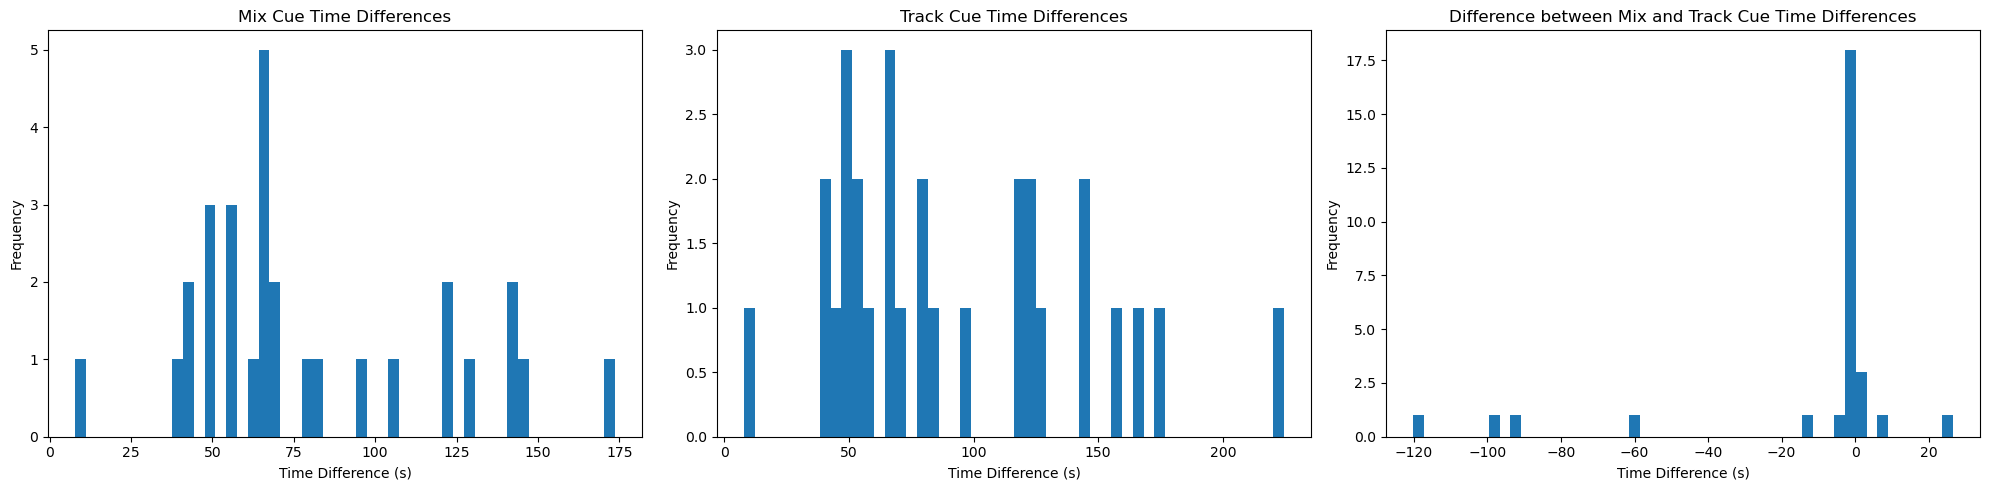

In [109]:
analyze_cue_time_diff(df_chroma_key_inv)

Number of tracks with key changes: 0


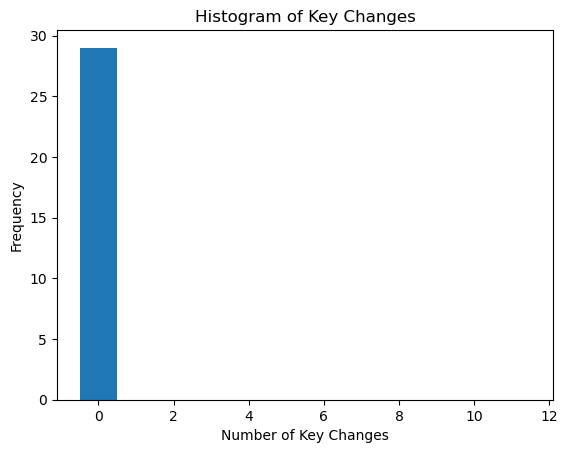

In [110]:
analyze_key_changes(df_chroma_key_inv)

In [111]:
check_cue_time_order(df_chroma_key_inv)

All mix_cue_in_time and mix_cue_out_time are in order.


# Chroma and MFCC Pkl

In [257]:
df_chroma_mfcc = pd.read_pickle('../data/align/jwmtj61-chroma+mfcc.pkl')

In [258]:
df_chroma_mfcc.head(2)

mix_id  track_id      feature  key_invariant  match_rate  key_change  \
0  jwmtj61  12t6wktp  chroma+mfcc          False    0.522388           0   
1  jwmtj61  16juffhx  chroma+mfcc          False    1.000000           0   

   best_cost                 costs  \
0   2.401158  [2.4011578310579376]   
1   2.673337  [2.6733367988318926]   

                                                  wp  \
0  [[411, 227], [410, 227], [409, 227], [408, 227...   
1  [[384, 350], [383, 350], [382, 349], [381, 348...   

                                           wp_sliced  mix_cue_in_time  \
0  [[1, 17], [2, 18], [3, 19], [4, 20], [5, 21], ...             8.46   
1  [[31, 223], [32, 224], [33, 225], [34, 226], [...           108.99   

   mix_cue_out_time  track_cue_in_time  track_cue_out_time  mix_cue_in_beat  \
0            110.89               0.74              198.36               17   
1            150.88              14.58               56.30              223   

   mix_cue_out_beat  track_cue_in_beat  track_cue_out_beat  
0               227                  1                 403  
1               312                 31                 120

Mix Cue Time Differences:
count     29.000000
mean      83.290345
std       42.406895
min        9.710000
25%       52.030000
50%       68.070000
75%      108.060000
max      170.420000
Name: mix_cue_time_diff, dtype: float64
Standard Deviation: 42.40689511681178

Track Cue Time Differences:
count     29.000000
mean     104.743448
std       63.472795
min        9.840000
25%       54.800000
50%       81.610000
75%      143.330000
max      266.590000
Name: track_cue_time_diff, dtype: float64
Standard Deviation: 63.47279503151961

Difference between Mix and Track Cue TIME Differences:
count     29.000000
mean     -21.453103
std       41.352614
min     -119.680000
25%       -4.540000
50%       -0.640000
75%       -0.060000
max        7.190000
Name: cue_time_diff_diff, dtype: float64
Standard Deviation: 41.3526142811041

Difference between Mix and Track Cue BEAT Differences:
count     29.000000
mean     -46.482759
std       90.471235
min     -260.000000
25%      -14.000000
50%        0.0000

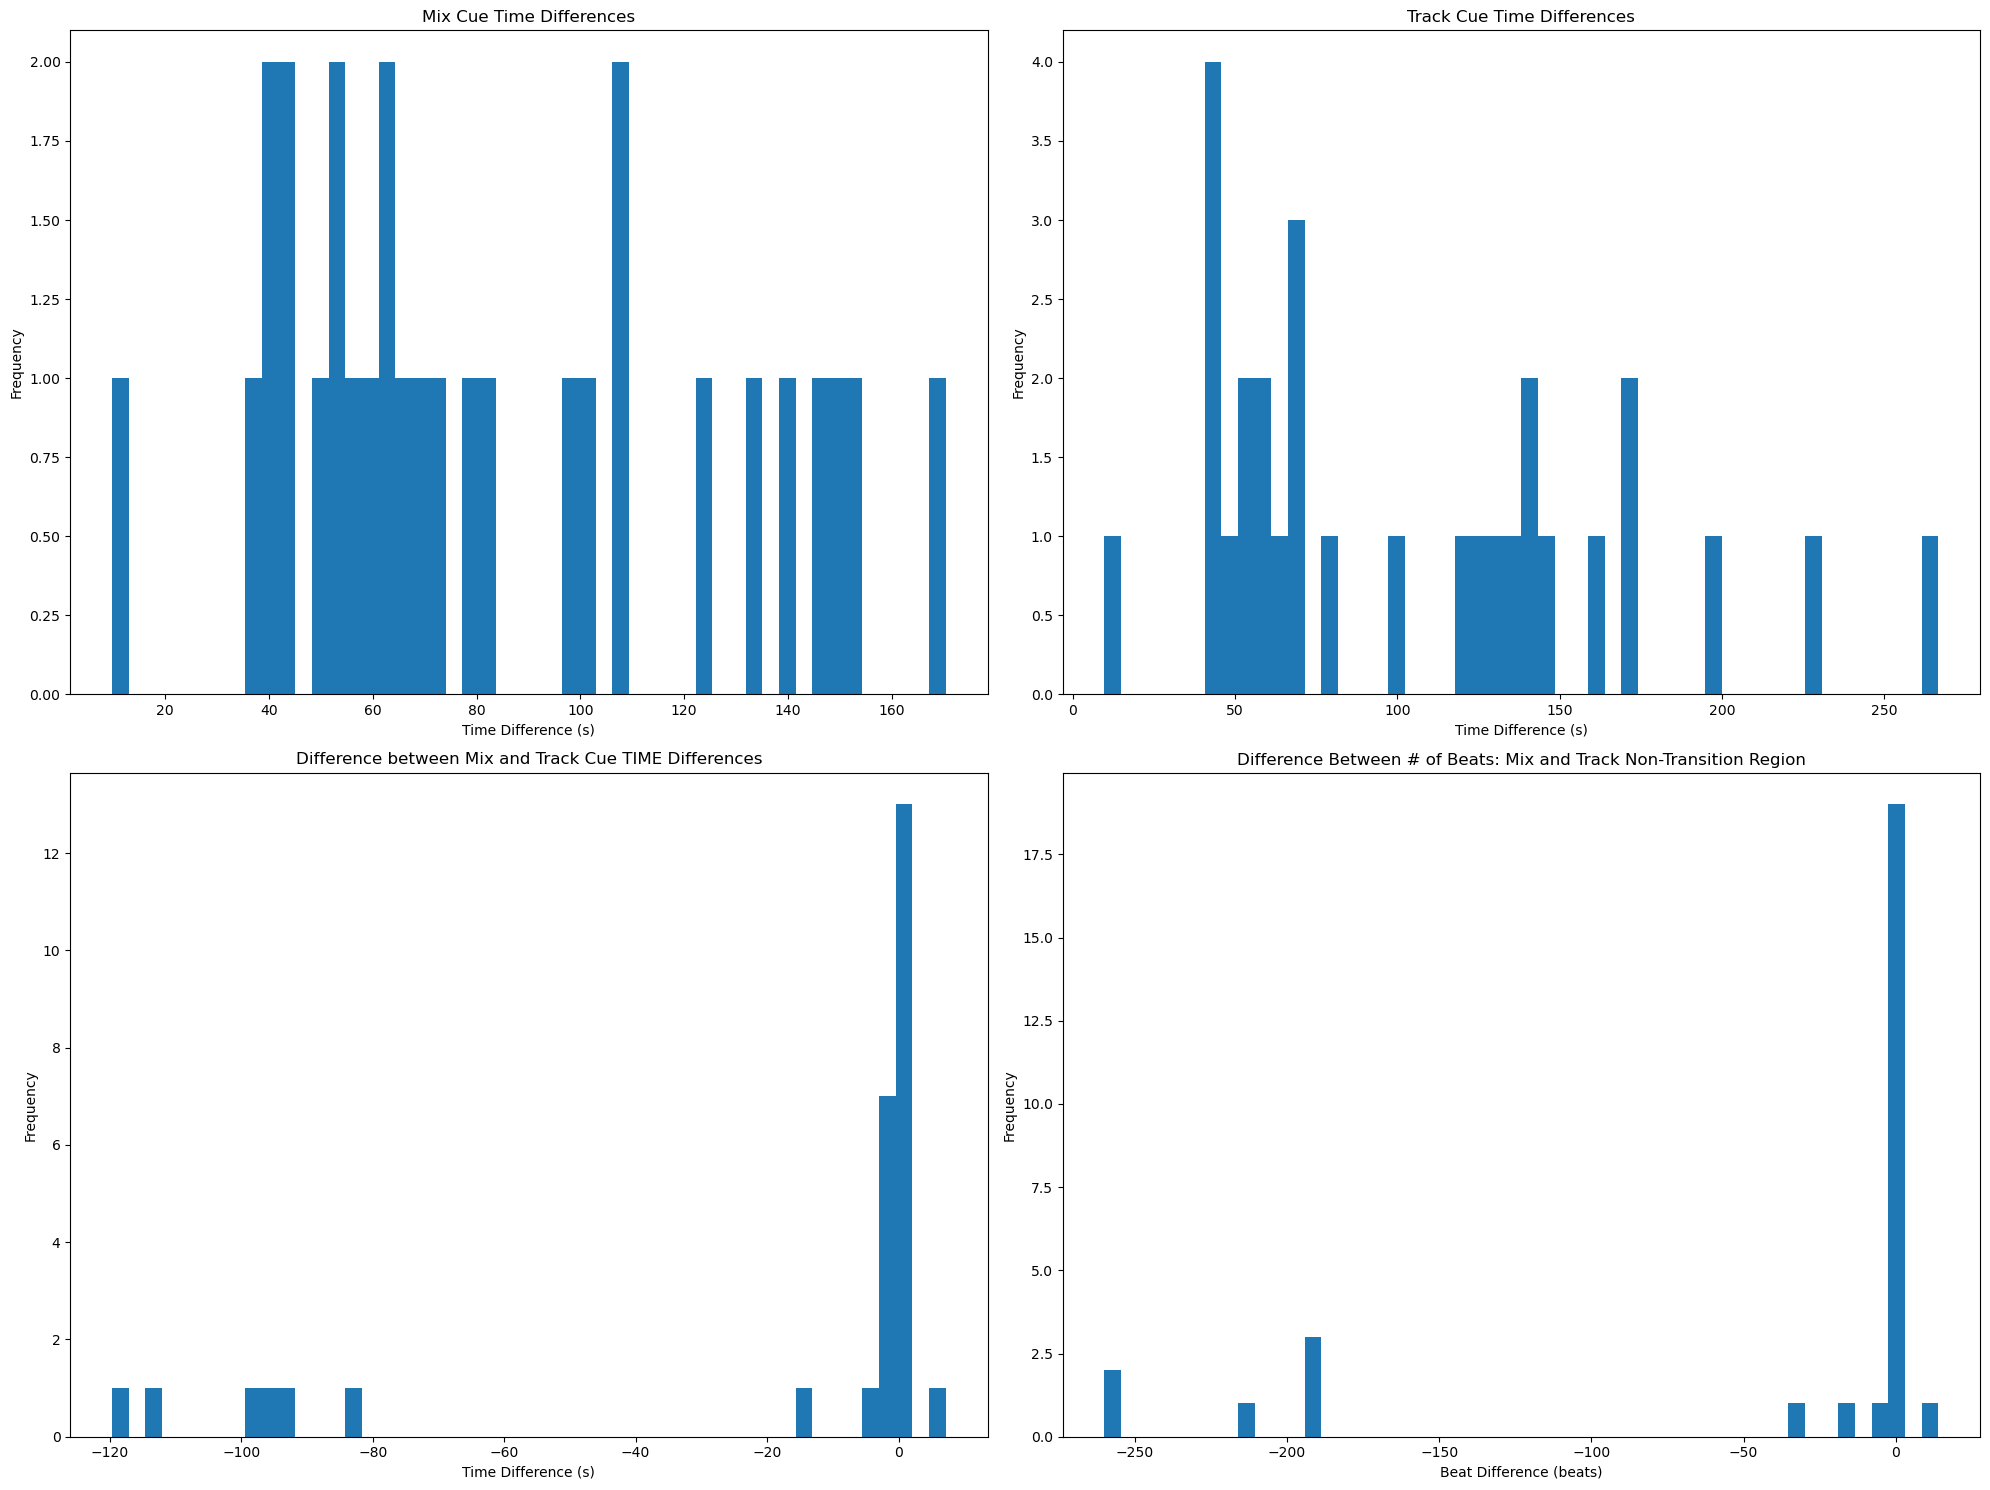

In [259]:
analyze_cue_time_diff(df_chroma_mfcc)

Number of tracks with key changes: 0


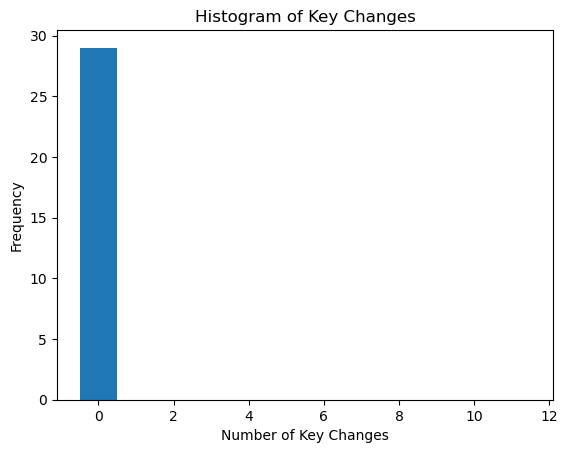

In [260]:
analyze_key_changes(df_chroma_mfcc)

In [261]:
check_cue_time_order(df_chroma_mfcc)

Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 16juffhx


In [ ]:
analyze_match_rate(df_chroma_mfcc)

Match Rate Analysis:
count    29.000000
mean      0.874214
std       0.219826
min       0.296703
25%       0.900621
50%       1.000000
75%       1.000000
max       1.000000
Name: match_rate, dtype: float64
Percentage of Match Rates Equal to 1: 58.62%


# Chroma and MFCC Key Invariant Pkl

In [120]:
df_chroma_mfcc_key_inv = pd.read_pickle('../data/align/jwmtj61-chroma+mfcc-key_invariant.pkl')

In [121]:
df_chroma_mfcc_key_inv.head(2)

mix_id  track_id      feature  key_invariant  match_rate  key_change  \
0  jwmtj61  12t6wktp  chroma+mfcc           True    0.510949           0   
1  jwmtj61  16juffhx  chroma+mfcc           True    0.333333           0   

   best_cost                                              costs  \
0   2.401158  [2.4011578310579376, 3.6316766345101397, 3.620...   
1   2.673337  [2.6733367988318926, 3.313664917866619, 3.4233...   

                                                  wp  mix_cue_in_time  \
0  [[411, 227], [410, 227], [409, 227], [408, 227...             8.46   
1  [[384, 350], [383, 350], [382, 349], [381, 348...           108.99   

   mix_cue_out_time  track_cue_in_time  track_cue_out_time  mix_cue_in_beat  \
0            110.89               0.74              198.36               17   
1            150.88              14.58               56.30              223   

   mix_cue_out_beat  track_cue_in_beat  track_cue_out_beat  
0               227                  1                 403  
1               312                 31                 120

Mix Cue Time Differences:
0    102.43
1     41.89
2     66.80
3     98.16
4     62.92
Name: mix_cue_time_diff, dtype: float64
Mean: 83.2903448275862
Median: 68.06999999999994
Standard Deviation: 42.40689511681178
Min: 9.710000000000036
Max: 170.42000000000007

Track Cue Time Differences:
0    197.62
1     41.72
2     67.03
3     99.37
4     67.46
Name: track_cue_time_diff, dtype: float64
Mean: 104.74344827586206
Median: 81.61
Standard Deviation: 63.47279503151961
Min: 9.84
Max: 266.59

Difference between Mix and Track Cue Time Differences:
0   -95.19
1     0.17
2    -0.23
3    -1.21
4    -4.54
Name: cue_time_diff_diff, dtype: float64
Mean: -21.453103448275865
Median: -0.6399999999999579
Standard Deviation: 41.3526142811041
Min: -119.68000000000029
Max: 7.189999999999998



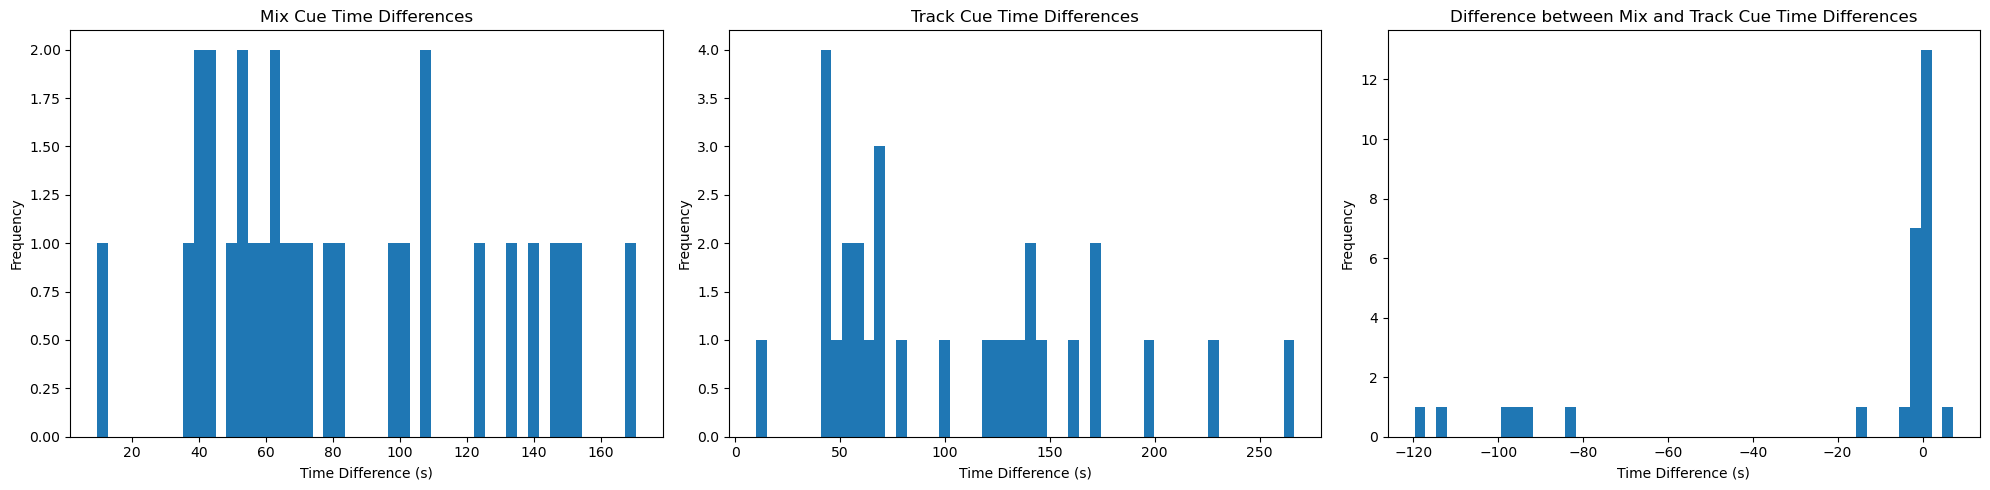

In [123]:
analyze_cue_time_diff(df_chroma_mfcc_key_inv)

Number of tracks with key changes: 0


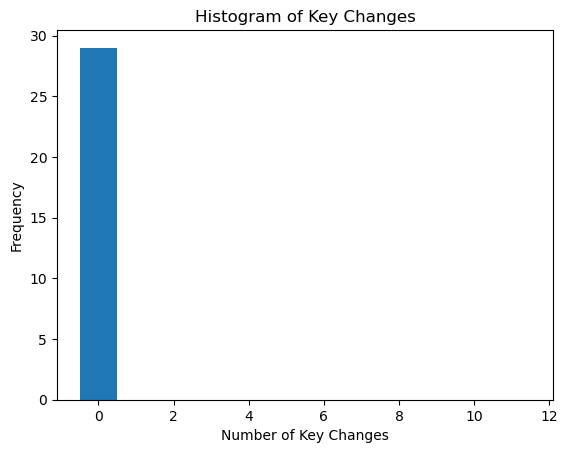

In [124]:
analyze_key_changes(df_chroma_mfcc_key_inv)

In [125]:
check_cue_time_order(df_chroma_mfcc_key_inv)

Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 16juffhx


# Chroma, MFCC, Spectral Contrast

In [3]:
df_chroma_mfcc_sc = pd.read_pickle('../data/align/jwmtj61-chroma+mfcc+spectral_contrast.pkl')

Mix Cue Time Differences:
count     29.000000
mean      88.712414
std       42.758787
min        9.720000
25%       59.040000
50%       81.610000
75%      108.160000
max      179.460000
Name: mix_cue_time_diff, dtype: float64
Standard Deviation: 42.758787205102415

Track Cue Time Differences:
count     29.000000
mean     112.282069
std       64.153241
min        9.840000
25%       60.000000
50%       99.380000
75%      163.350000
max      270.000000
Name: track_cue_time_diff, dtype: float64
Standard Deviation: 64.15324111505593

Difference between Mix and Track Cue TIME Differences:
count     29.000000
mean     -23.569655
std       43.474500
min     -119.620000
25%      -15.410000
50%       -0.740000
75%        0.070000
max       14.840000
Name: cue_time_diff_diff, dtype: float64
Standard Deviation: 43.47450028323323

Difference between Mix and Track Cue BEAT Differences:
count     29.000000
mean     -48.517241
std       91.106147
min     -256.000000
25%      -32.000000
50%        0.00

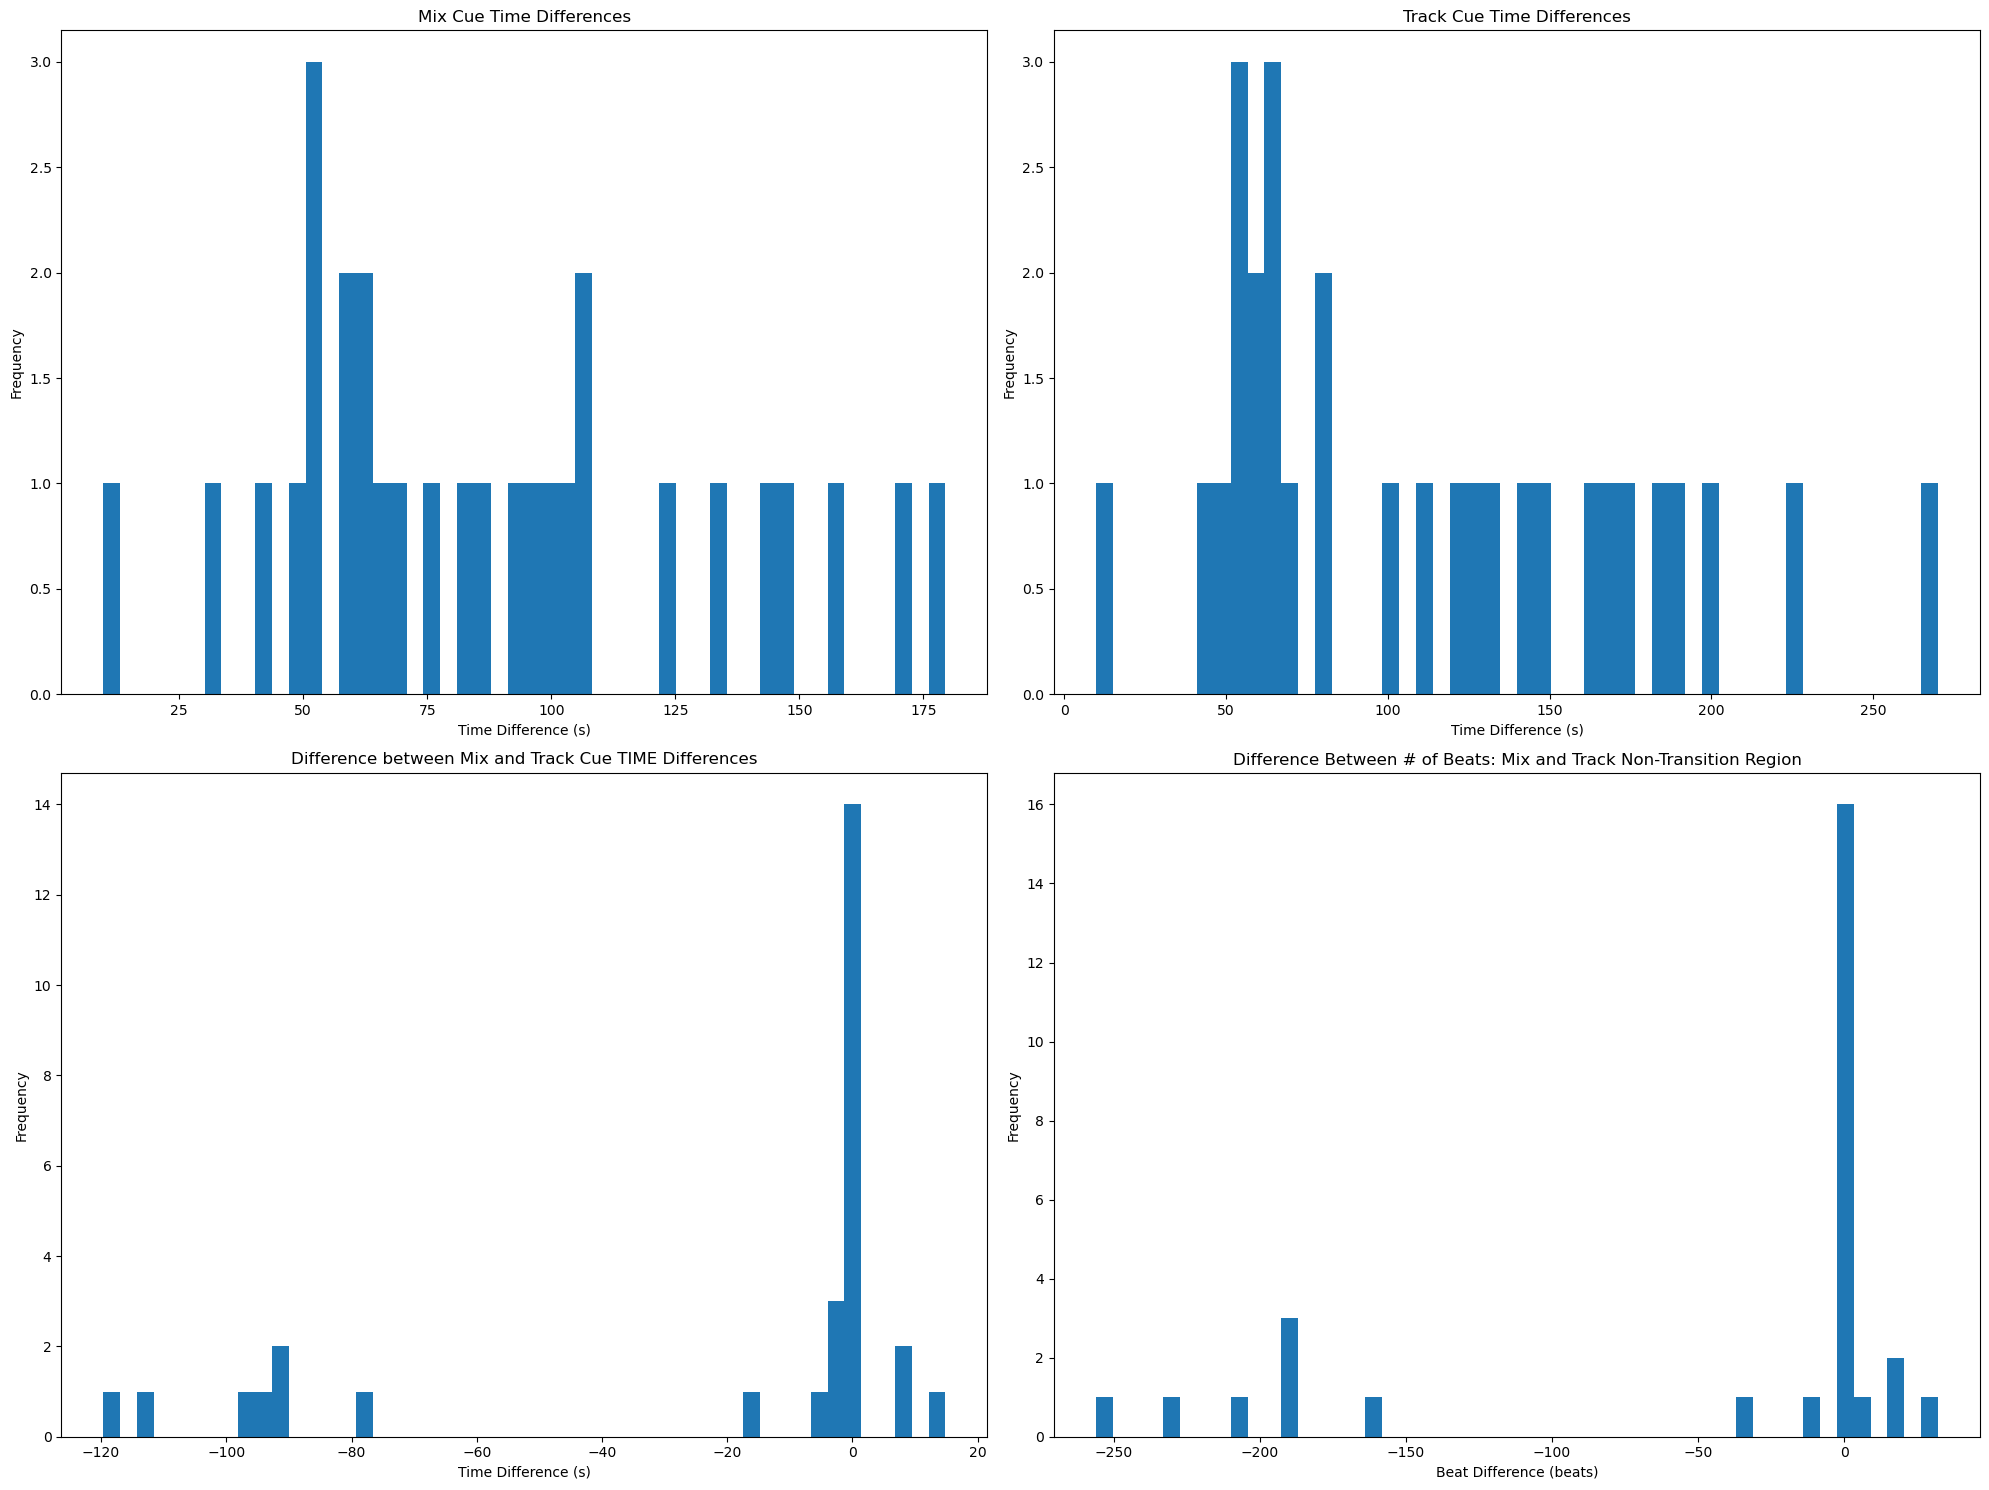

In [10]:
analyze_cue_time_diff(df_chroma_mfcc_sc)

Number of tracks with key changes: 0


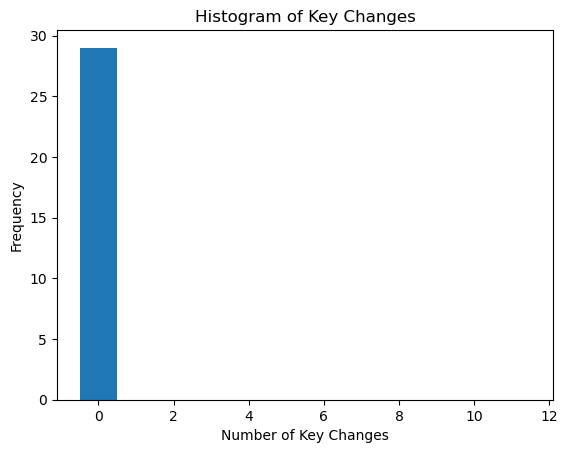

In [11]:
analyze_key_changes(df_chroma_mfcc_sc)

In [12]:
check_cue_time_order(df_chroma_mfcc_sc)

Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 16juffhx
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 10y0bwb5
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 2rwj144f


Summary statistics of transition gaps in TIME domain:
count     28.00000
mean      32.69750
std       51.66767
min      -19.99000
25%       12.06500
50%       20.62000
75%       33.62750
max      258.81000
Name: time_transition_gap, dtype: float64

Summary statistics of transition gaps in BEAT domain:
count     28.000000
mean      70.000000
std      109.804877
min      -43.000000
25%       26.000000
50%       42.500000
75%       73.500000
max      550.000000
Name: beat_transition_gap, dtype: float64



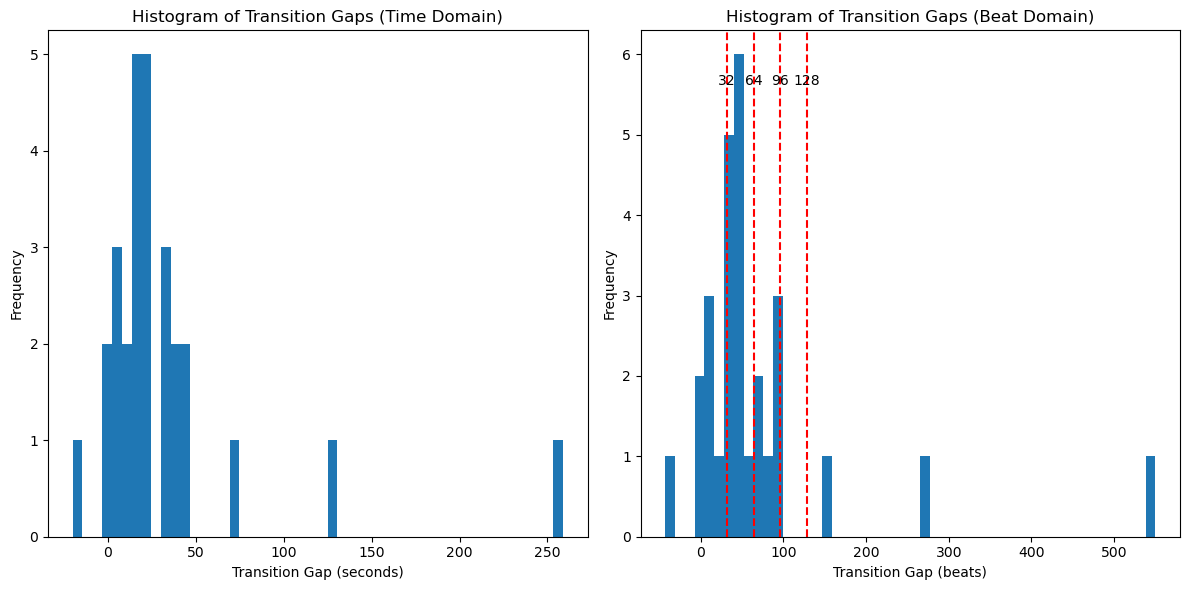

In [14]:
analyze_transition_gaps(df_chroma_mfcc_sc)

In [15]:
df_chroma_mfcc_sc[['track_id', 'match_rate', 'best_cost',
                    'mix_cue_in_time', 'mix_cue_out_time', 'track_cue_in_time', 'track_cue_out_time',
                    'mix_cue_in_beat', 'mix_cue_out_beat', 'track_cue_in_beat', 'track_cue_out_beat',
                    'mix_cue_beat_diff', 'track_cue_beat_diff', 'cue_beat_diff_diff',
                    'time_transition_gap', 'beat_transition_gap']].head(8)

track_id  match_rate  best_cost  mix_cue_in_time  mix_cue_out_time  \
0  12t6wktp    0.524752   2.501928             7.98            111.36   
1  16juffhx    1.000000   2.725741           109.46            151.34   
2  258n7bkf    0.518797   2.846221           173.86            270.40   
3  10y0bwb5    1.000000   3.286033           250.41            348.57   
4   g9krvgx    0.916667   2.423444           354.95            417.97   
5   9p7yws5    1.000000   3.123666           439.36            491.73   
6  1qc2j195    1.000000   3.129376           522.86            604.47   
7  1mlcb24f    0.465296   2.895774           618.42            703.26   

   track_cue_in_time  track_cue_out_time  mix_cue_in_beat  mix_cue_out_beat  \
0               0.23              198.87               16               228   
1              15.05               56.76              224               313   
2              15.56              202.62              361               568   
3              25.04              124.42              525               737   
4              10.31               77.78              751               905   
5               5.79               57.52              946              1065   
6               3.41               85.01             1135              1339   
7               4.26              186.61             1373              1554   

   track_cue_in_beat  track_cue_out_beat  mix_cue_beat_diff  \
0                  0                 404                212   
1                 32                 121                 89   
2                 33                 432                207   
3                 53                 265                212   
4                 22                 190                154   
5                 13                 132                119   
6                  8                 212                204   
7                  9                 398                181   

   track_cue_beat_diff  cue_beat_diff_diff  time_transition_gap  \
0                  404                -192                  NaN   
1                   89                   0                -1.90   
2                  399                -192                22.52   
3                  212                   0               -19.99   
4                  168                 -14                 6.38   
5                  119                   0                21.39   
6                  204                   0                31.13   
7                  389                -208                13.95   

   beat_transition_gap  
0                  NaN  
1                 -4.0  
2                 48.0  
3                -43.0  
4                 14.0  
5                 41.0  
6                 70.0  
7                 34.0

In [44]:
analyze_match_rate(df_chroma_mfcc_sc)

Match Rate Analysis:
count    29.000000
mean      0.854697
std       0.226403
min       0.307359
25%       0.840000
50%       1.000000
75%       1.000000
max       1.000000
Name: match_rate, dtype: float64
Percentage of Match Rates Equal to 1: 55.17%


In [16]:
df_chroma_mfcc_sc.iloc[3]['wp']

array([[450, 769],
       [449, 769],
       [448, 769],
       [447, 769],
       [446, 769],
       [445, 769],
       [444, 769],
       [443, 769],
       [442, 769],
       [441, 769],
       [440, 769],
       [439, 769],
       [438, 769],
       [437, 769],
       [436, 769],
       [435, 769],
       [434, 769],
       [433, 769],
       [432, 769],
       [431, 769],
       [430, 769],
       [429, 769],
       [428, 769],
       [427, 769],
       [426, 769],
       [425, 769],
       [424, 769],
       [423, 769],
       [422, 769],
       [421, 769],
       [420, 769],
       [419, 769],
       [418, 769],
       [417, 769],
       [416, 769],
       [415, 769],
       [414, 769],
       [413, 769],
       [412, 769],
       [411, 769],
       [410, 769],
       [409, 769],
       [408, 769],
       [407, 769],
       [406, 769],
       [405, 769],
       [404, 769],
       [403, 769],
       [402, 769],
       [401, 769],
       [400, 769],
       [399, 769],
       [398,

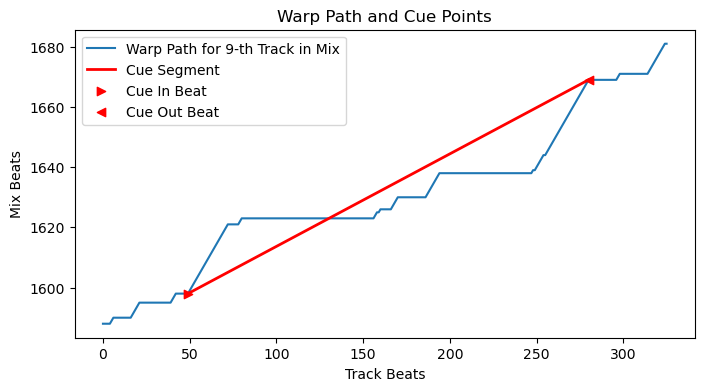

In [17]:
plot_warp_path(df_chroma_mfcc_sc)

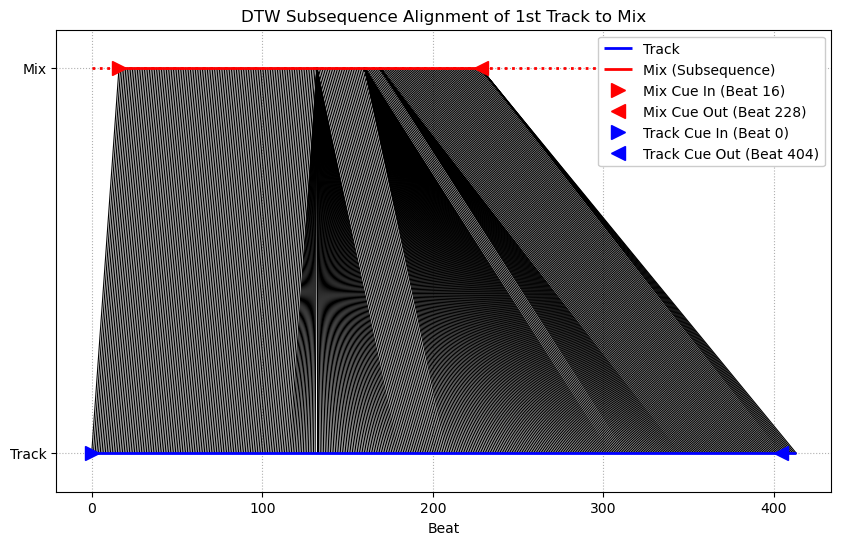

In [19]:
plot_warp_path_connections(df_chroma_mfcc_sc)

In [ ]:
df_chroma_mfcc_sc.iloc[0]['wp']

array([[411, 222],
       [410, 222],
       [409, 222],
       [408, 222],
       [407, 222],
       [406, 221],
       [405, 221],
       [404, 221],
       [403, 221],
       [402, 221],
       [401, 221],
       [400, 221],
       [399, 221],
       [398, 220],
       [397, 219],
       [396, 219],
       [395, 218],
       [394, 218],
       [393, 217],
       [392, 216],
       [391, 215],
       [390, 214],
       [389, 213],
       [388, 212],
       [387, 211],
       [386, 210],
       [385, 209],
       [384, 208],
       [383, 207],
       [382, 206],
       [381, 205],
       [380, 204],
       [379, 203],
       [378, 202],
       [377, 201],
       [376, 200],
       [375, 199],
       [374, 198],
       [373, 197],
       [372, 196],
       [371, 195],
       [370, 194],
       [369, 193],
       [368, 192],
       [367, 192],
       [366, 192],
       [365, 192],
       [364, 192],
       [363, 192],
       [362, 192],
       [361, 192],
       [360, 192],
       [359,

# Chroma, MFCC, Spectral Contrast, Downbeat Prob, Onset Strength

In [45]:
df_chroma_mfcc_sc_db_os = pd.read_pickle('../data/align/jwmtj61-chroma+mfcc+spectral_contrast+downbeat_prob+onset_strength.pkl')

Mix Cue Time Differences:
count     29.000000
mean      77.563448
std       45.048463
min       10.320000
25%       51.840000
50%       70.520000
75%       94.600000
max      215.540000
Name: mix_cue_time_diff, dtype: float64
Standard Deviation: 45.04846281473368

Track Cue Time Differences:
count     29.000000
mean      98.978966
std       63.183901
min       10.310000
25%       51.600000
50%       73.580000
75%      154.690000
max      224.960000
Name: track_cue_time_diff, dtype: float64
Standard Deviation: 63.18390088491279

Difference between Mix and Track Cue TIME Differences:
count     29.000000
mean     -21.415517
std       37.444805
min     -120.000000
25%      -33.990000
50%       -0.700000
75%       -0.050000
max        6.970000
Name: cue_time_diff_diff, dtype: float64
Standard Deviation: 37.44480534125308

Difference between Mix and Track Cue BEAT Differences:
count     29.000000
mean     -45.000000
std       81.086814
min     -256.000000
25%      -72.000000
50%        0.000

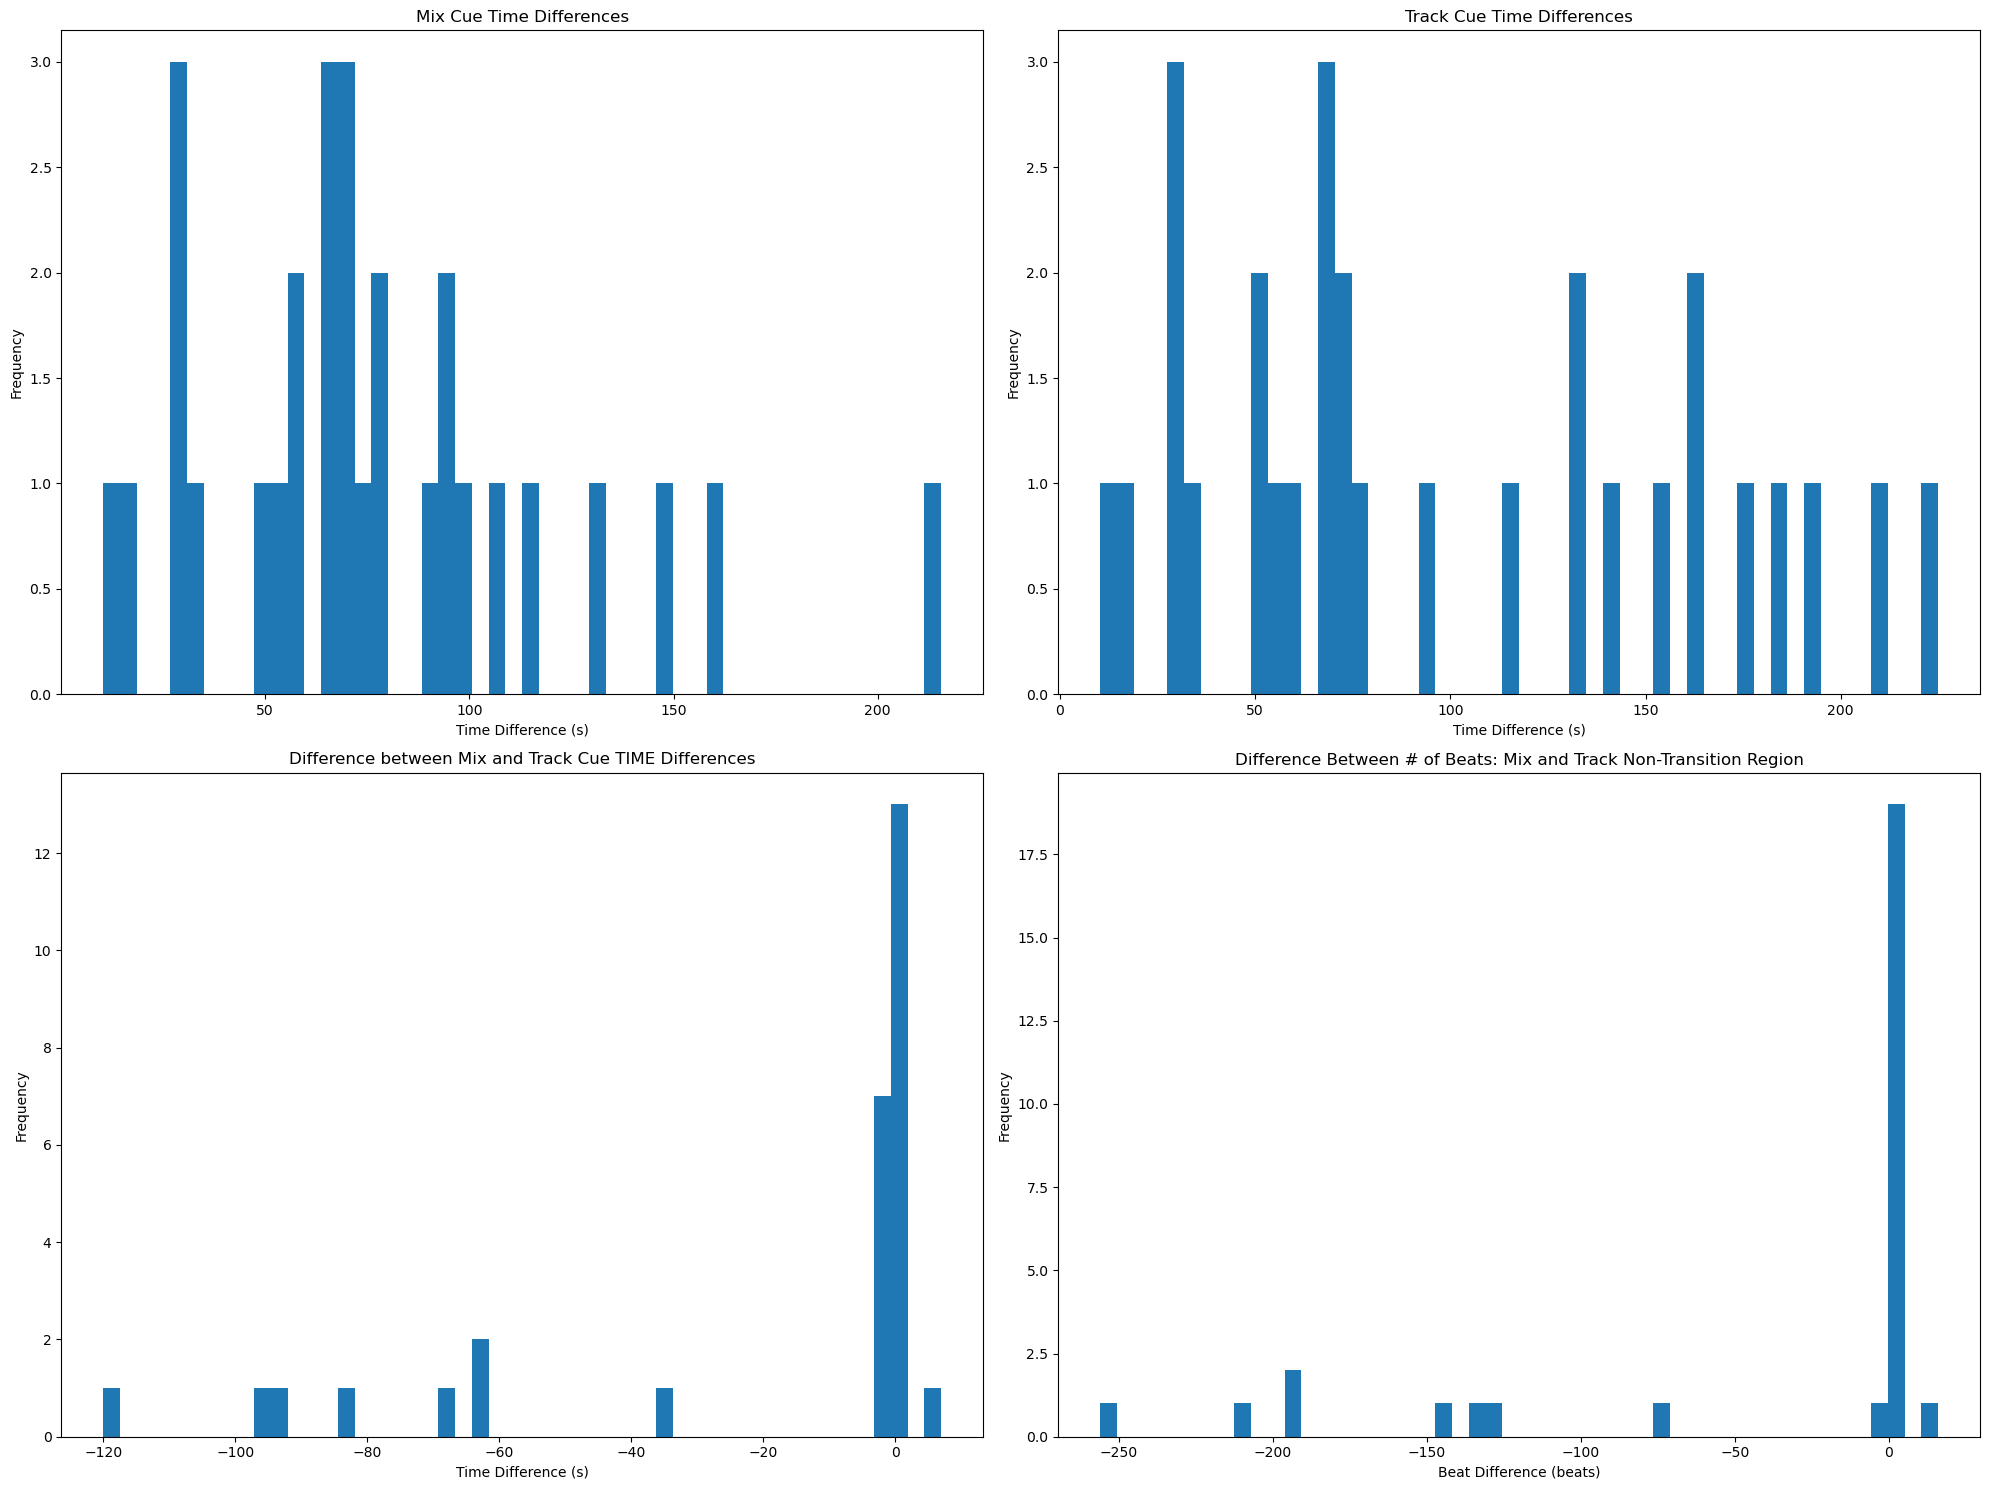

In [46]:
analyze_cue_time_diff(df_chroma_mfcc_sc_db_os)

Number of tracks with key changes: 0


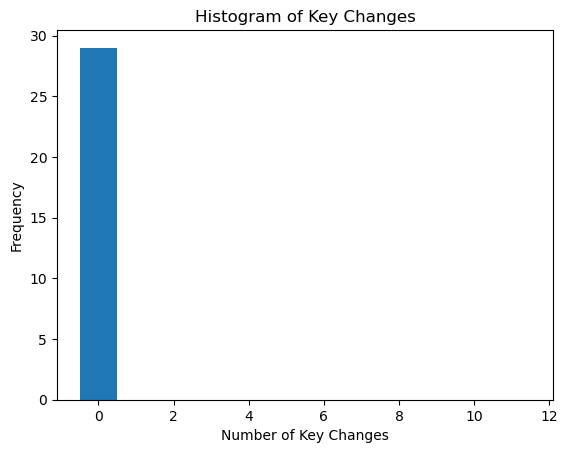

In [48]:
analyze_key_changes(df_chroma_mfcc_sc_db_os)

In [49]:
check_cue_time_order(df_chroma_mfcc_sc_db_os)

Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 16juffhx
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track g9krvgx
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 2rwj144f


Summary statistics of transition gaps in TIME domain:
count     28.000000
mean      44.187857
std       58.126962
min       -6.230000
25%       15.380000
50%       29.050000
75%       47.052500
max      286.310000
Name: time_transition_gap, dtype: float64

Summary statistics of transition gaps in BEAT domain:
count     28.000000
mean      93.750000
std      123.380059
min      -13.000000
25%       36.750000
50%       64.000000
75%      100.500000
max      609.000000
Name: beat_transition_gap, dtype: float64



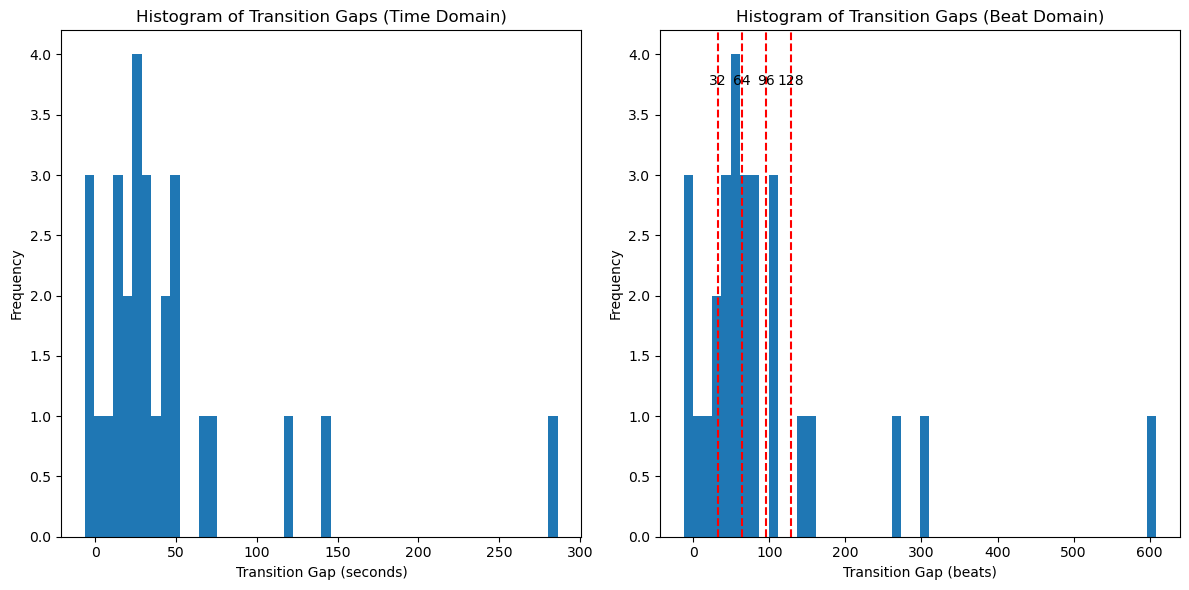

In [51]:
analyze_transition_gaps(df_chroma_mfcc_sc_db_os)

In [52]:
df_chroma_mfcc_sc_db_os[['track_id', 'match_rate', 'best_cost',
        'mix_cue_in_time', 'mix_cue_out_time', 'track_cue_in_time', 'track_cue_out_time',
        'mix_cue_in_beat', 'mix_cue_out_beat', 'track_cue_in_beat', 'track_cue_out_beat',
        'mix_cue_beat_diff', 'track_cue_beat_diff', 'cue_beat_diff_diff',
        'time_transition_gap', 'beat_transition_gap']].head(8)

track_id  match_rate  best_cost  mix_cue_in_time  mix_cue_out_time  \
0  12t6wktp    0.511450   3.767681             7.98            106.12   
1  16juffhx    1.000000   4.025074            99.89            149.46   
2  258n7bkf    1.000000   3.839214           172.45            242.97   
3  10y0bwb5    0.612121   4.356833           269.94            362.80   
4   g9krvgx    0.939394   3.733705           358.56            390.15   
5   9p7yws5    1.000000   4.163503           435.48            491.73   
6  1qc2j195    0.531532   4.055747           522.86            617.46   
7  1mlcb24f    1.000000   4.266005           650.76            661.08   

   track_cue_in_time  track_cue_out_time  mix_cue_in_beat  mix_cue_out_beat  \
0               0.23              193.52               16               217   
1               5.67               54.89              204               309   
2              14.18               84.96              358               509   
3              44.73              199.42              567               769   
4              14.07               47.78              759               855   
5               1.86               57.52              937              1065   
6               3.41              181.01             1135              1371   
7              37.08               47.39             1442              1464   

   track_cue_in_beat  track_cue_out_beat  mix_cue_beat_diff  \
0                  0                 393                201   
1                 12                 117                105   
2                 30                 181                151   
3                 95                 425                202   
4                 30                 126                 96   
5                  4                 132                128   
6                  8                 452                236   
7                 79                 101                 22   

   track_cue_beat_diff  cue_beat_diff_diff  time_transition_gap  \
0                  393                -192                  NaN   
1                  105                   0                -6.23   
2                  151                   0                22.99   
3                  330                -128                26.97   
4                   96                   0                -4.24   
5                  128                   0                45.33   
6                  444                -208                31.13   
7                   22                   0                33.30   

   beat_transition_gap  
0                  NaN  
1                -13.0  
2                 49.0  
3                 58.0  
4                -10.0  
5                 82.0  
6                 70.0  
7                 71.0

In [53]:
analyze_match_rate(df_chroma_mfcc_sc_db_os)

Match Rate Analysis:
count    29.000000
mean      0.859187
std       0.210270
min       0.443478
25%       0.673759
50%       0.989529
75%       1.000000
max       1.000000
Name: match_rate, dtype: float64
Percentage of Match Rates Equal to 1: 44.83%


In [54]:
df_chroma_mfcc_sc_db_os.iloc[3]['wp']

array([[449, 777],
       [448, 776],
       [447, 776],
       [446, 776],
       [445, 776],
       [444, 776],
       [443, 776],
       [442, 776],
       [441, 776],
       [440, 775],
       [439, 774],
       [438, 773],
       [437, 772],
       [436, 771],
       [435, 770],
       [434, 769],
       [433, 769],
       [432, 769],
       [431, 769],
       [430, 769],
       [429, 769],
       [428, 769],
       [427, 769],
       [426, 769],
       [425, 769],
       [424, 768],
       [423, 767],
       [422, 766],
       [421, 765],
       [420, 764],
       [419, 763],
       [418, 762],
       [417, 761],
       [416, 760],
       [415, 759],
       [414, 758],
       [413, 757],
       [412, 756],
       [411, 755],
       [410, 754],
       [409, 753],
       [408, 752],
       [407, 751],
       [406, 750],
       [405, 749],
       [404, 748],
       [403, 747],
       [402, 746],
       [401, 745],
       [400, 744],
       [399, 743],
       [398, 742],
       [397,

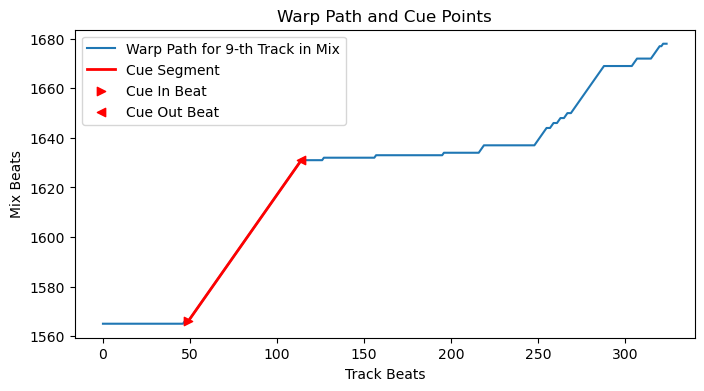

In [56]:
plot_warp_path(df_chroma_mfcc_sc_db_os)

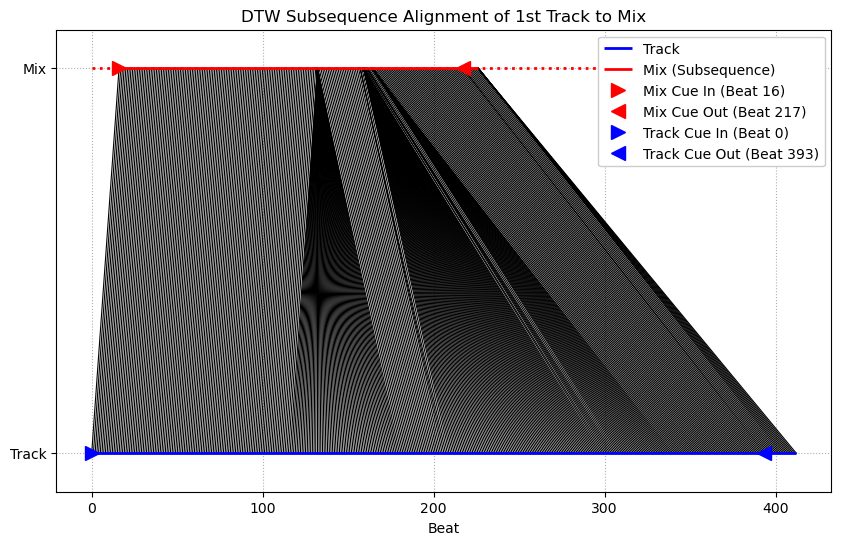

In [57]:
plot_warp_path_connections(df_chroma_mfcc_sc_db_os)

In [58]:
df_chroma_mfcc_sc_db_os.iloc[0]['wp']

array([[412, 226],
       [411, 226],
       [410, 226],
       [409, 226],
       [408, 226],
       [407, 226],
       [406, 226],
       [405, 226],
       [404, 226],
       [403, 226],
       [402, 225],
       [401, 224],
       [400, 223],
       [399, 222],
       [398, 221],
       [397, 220],
       [396, 219],
       [395, 218],
       [394, 217],
       [393, 217],
       [392, 216],
       [391, 215],
       [390, 214],
       [389, 213],
       [388, 212],
       [387, 211],
       [386, 210],
       [385, 209],
       [384, 208],
       [383, 207],
       [382, 206],
       [381, 205],
       [380, 204],
       [379, 203],
       [378, 202],
       [377, 201],
       [376, 200],
       [375, 199],
       [374, 198],
       [373, 197],
       [372, 196],
       [371, 195],
       [370, 194],
       [369, 193],
       [368, 192],
       [367, 191],
       [366, 190],
       [365, 189],
       [364, 188],
       [363, 187],
       [362, 186],
       [361, 185],
       [360,

# Chroma, MFCC, Downbeat Prob, Onset Strength

In [81]:
df_chroma_mfcc_db_os = pd.read_pickle('../data/align/jwmtj61-chroma+mfcc+downbeat_prob+onset_strength.pkl')

Mix Cue Time Differences:
count     29.000000
mean      75.805862
std       46.112400
min       10.320000
25%       49.570000
50%       71.670000
75%       94.600000
max      215.540000
Name: mix_cue_time_diff, dtype: float64
Standard Deviation: 46.11239975144904

Track Cue Time Differences:
count     29.000000
mean      95.352414
std       64.221522
min       10.310000
25%       49.220000
50%       74.000000
75%      154.690000
max      224.960000
Name: track_cue_time_diff, dtype: float64
Standard Deviation: 64.22152224111102

Difference between Mix and Track Cue TIME Differences:
count     29.000000
mean     -19.546552
std       37.205087
min     -120.000000
25%       -2.720000
50%       -0.530000
75%       -0.040000
max        6.970000
Name: cue_time_diff_diff, dtype: float64
Standard Deviation: 37.20508742822508

Difference between Mix and Track Cue BEAT Differences:
count     29.000000
mean     -42.068966
std       82.357640
min     -256.000000
25%       -1.000000
50%        0.000

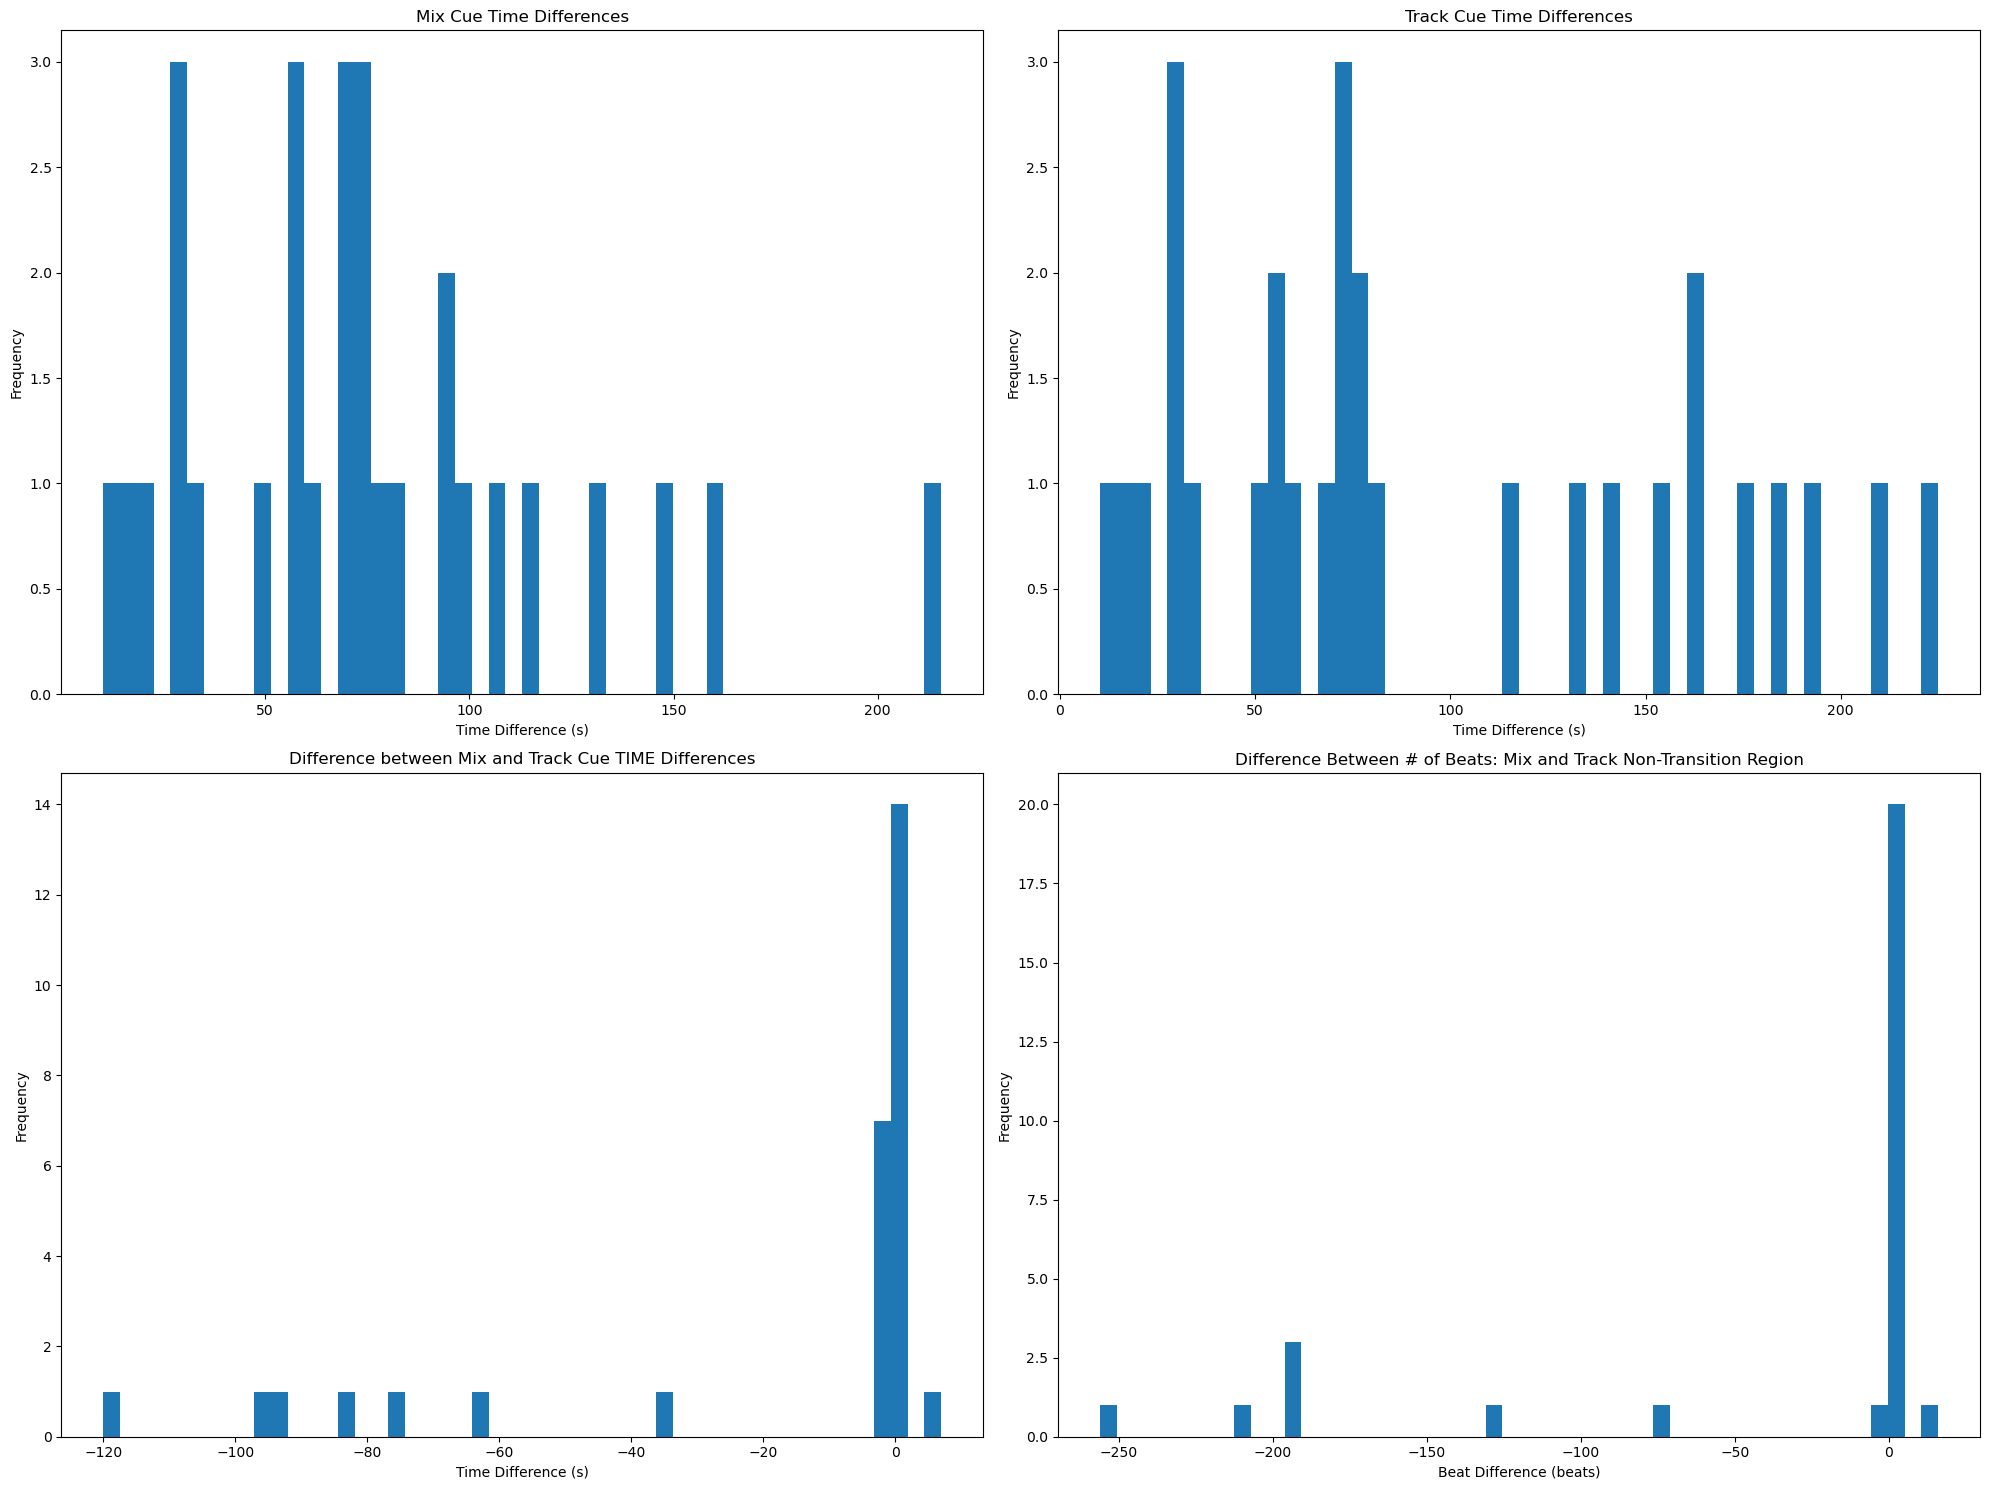

In [82]:
analyze_cue_time_diff(df_chroma_mfcc_db_os)

Number of tracks with key changes: 0


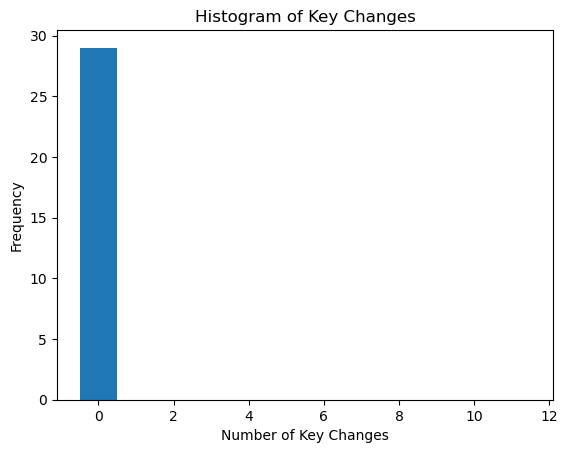

In [83]:
analyze_key_changes(df_chroma_mfcc_db_os)

In [84]:
check_cue_time_order(df_chroma_mfcc_db_os)

Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 16juffhx
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track g9krvgx
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 2rwj144f


Summary statistics of transition gaps in TIME domain:
count     28.000000
mean      46.008214
std       61.128632
min       -6.230000
25%       18.215000
50%       29.050000
75%       47.052500
max      306.770000
Name: time_transition_gap, dtype: float64

Summary statistics of transition gaps in BEAT domain:
count     28.000000
mean      97.357143
std      129.700856
min      -13.000000
25%       39.000000
50%       64.000000
75%      100.500000
max      652.000000
Name: beat_transition_gap, dtype: float64



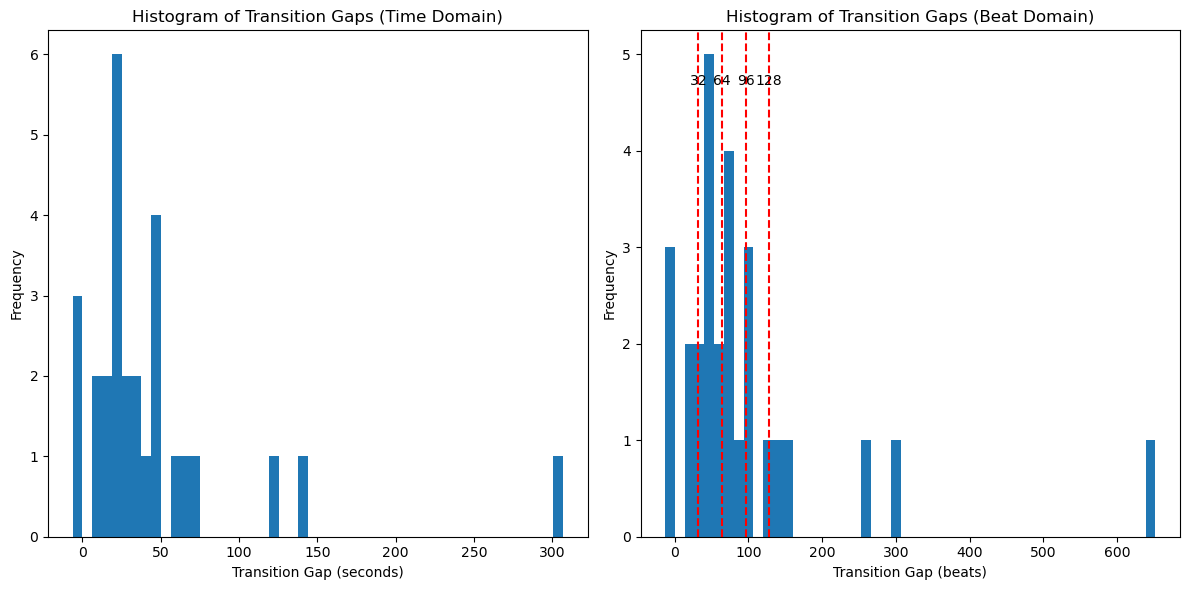

In [85]:
analyze_transition_gaps(df_chroma_mfcc_db_os)

In [86]:
df_chroma_mfcc_db_os[['track_id', 'match_rate', 'best_cost',
        'mix_cue_in_time', 'mix_cue_out_time', 'track_cue_in_time', 'track_cue_out_time',
        'mix_cue_in_beat', 'mix_cue_out_beat', 'track_cue_in_beat', 'track_cue_out_beat',
        'mix_cue_beat_diff', 'track_cue_beat_diff', 'cue_beat_diff_diff',
        'time_transition_gap', 'beat_transition_gap']].head(8)

track_id  match_rate  best_cost  mix_cue_in_time  mix_cue_out_time  \
0  12t6wktp    0.511450   3.717583             7.98            106.12   
1  16juffhx    1.000000   3.980027            99.89            149.46   
2  258n7bkf    1.000000   3.773530           172.45            242.97   
3  10y0bwb5    0.612121   4.308576           269.94            362.80   
4   g9krvgx    0.939394   3.688176           358.56            390.15   
5   9p7yws5    1.000000   4.085128           435.48            491.73   
6  1qc2j195    0.531532   3.968819           522.86            617.46   
7  1mlcb24f    1.000000   4.226528           650.76            661.08   

   track_cue_in_time  track_cue_out_time  mix_cue_in_beat  mix_cue_out_beat  \
0               0.23              193.52               16               217   
1               5.67               54.89              204               309   
2              14.18               84.96              358               509   
3              44.73              199.42              567               769   
4              14.07               47.78              759               855   
5               1.86               57.52              937              1065   
6               3.41              181.01             1135              1371   
7              37.08               47.39             1442              1464   

   track_cue_in_beat  track_cue_out_beat  mix_cue_beat_diff  \
0                  0                 393                201   
1                 12                 117                105   
2                 30                 181                151   
3                 95                 425                202   
4                 30                 126                 96   
5                  4                 132                128   
6                  8                 452                236   
7                 79                 101                 22   

   track_cue_beat_diff  cue_beat_diff_diff  time_transition_gap  \
0                  393                -192                  NaN   
1                  105                   0                -6.23   
2                  151                   0                22.99   
3                  330                -128                26.97   
4                   96                   0                -4.24   
5                  128                   0                45.33   
6                  444                -208                31.13   
7                   22                   0                33.30   

   beat_transition_gap  
0                  NaN  
1                -13.0  
2                 49.0  
3                 58.0  
4                -10.0  
5                 82.0  
6                 70.0  
7                 71.0

In [ ]:
analyze_match_rate(df_chroma_mfcc_db_os)

Match Rate Analysis:
count    29.000000
mean      0.873413
std       0.204882
min       0.443478
25%       0.892045
50%       0.992908
75%       1.000000
max       1.000000
Name: match_rate, dtype: float64
Percentage of Match Rates Equal to 1: 48.28%


In [ ]:
df_chroma_mfcc_db_os.iloc[3]['wp']

array([[449, 777],
       [448, 776],
       [447, 776],
       [446, 776],
       [445, 776],
       [444, 776],
       [443, 776],
       [442, 775],
       [441, 774],
       [440, 773],
       [439, 772],
       [438, 771],
       [437, 770],
       [436, 769],
       [435, 769],
       [434, 769],
       [433, 769],
       [432, 769],
       [431, 769],
       [430, 769],
       [429, 769],
       [428, 769],
       [427, 769],
       [426, 769],
       [425, 769],
       [424, 768],
       [423, 767],
       [422, 766],
       [421, 765],
       [420, 764],
       [419, 763],
       [418, 762],
       [417, 761],
       [416, 760],
       [415, 759],
       [414, 758],
       [413, 757],
       [412, 756],
       [411, 755],
       [410, 754],
       [409, 753],
       [408, 752],
       [407, 751],
       [406, 750],
       [405, 749],
       [404, 748],
       [403, 747],
       [402, 746],
       [401, 745],
       [400, 744],
       [399, 743],
       [398, 742],
       [397,

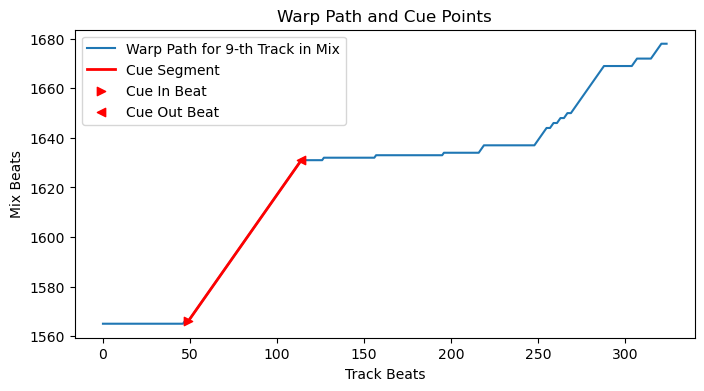

In [ ]:
plot_warp_path(df_chroma_mfcc_db_os)

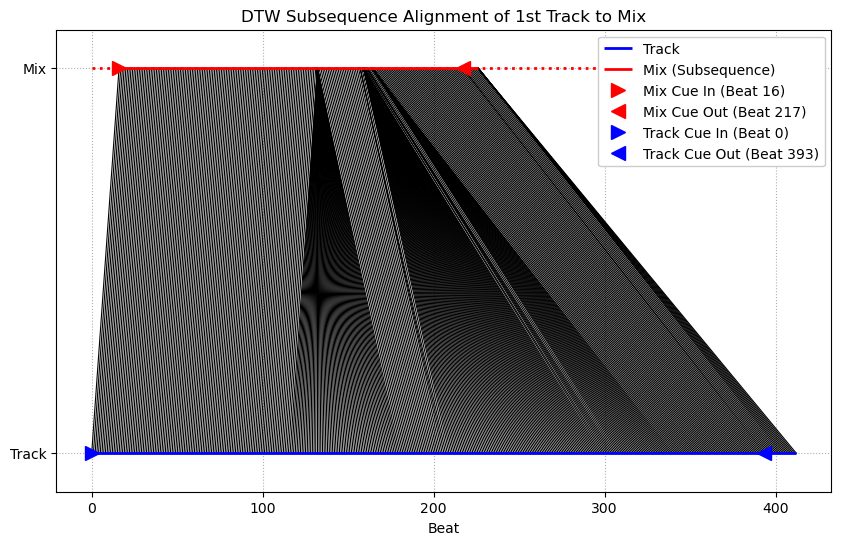

In [ ]:
plot_warp_path_connections(df_chroma_mfcc_db_os)

In [ ]:
df_chroma_mfcc_db_os.iloc[0]['wp']

array([[412, 226],
       [411, 226],
       [410, 226],
       [409, 226],
       [408, 226],
       [407, 226],
       [406, 226],
       [405, 226],
       [404, 226],
       [403, 226],
       [402, 225],
       [401, 224],
       [400, 223],
       [399, 222],
       [398, 221],
       [397, 220],
       [396, 219],
       [395, 218],
       [394, 217],
       [393, 217],
       [392, 216],
       [391, 215],
       [390, 214],
       [389, 213],
       [388, 212],
       [387, 211],
       [386, 210],
       [385, 209],
       [384, 208],
       [383, 207],
       [382, 206],
       [381, 205],
       [380, 204],
       [379, 203],
       [378, 202],
       [377, 201],
       [376, 200],
       [375, 199],
       [374, 198],
       [373, 197],
       [372, 196],
       [371, 195],
       [370, 194],
       [369, 193],
       [368, 192],
       [367, 191],
       [366, 190],
       [365, 189],
       [364, 188],
       [363, 187],
       [362, 186],
       [361, 185],
       [360,

# Chroma, Downbeat Prob, Onset Strength

In [88]:
df_chroma_db_os = pd.read_pickle('../data/align/jwmtj61-chroma+downbeat_prob+onset_strength.pkl')

Mix Cue Time Differences:
count     29.000000
mean      75.532069
std       45.404819
min        7.870000
25%       52.370000
50%       72.180000
75%       94.600000
max      197.970000
Name: mix_cue_time_diff, dtype: float64
Standard Deviation: 45.40481931463968

Track Cue Time Differences:
count     29.000000
mean      94.511379
std       62.780381
min        8.480000
25%       51.730000
50%       77.200000
75%      147.180000
max      217.500000
Name: track_cue_time_diff, dtype: float64
Standard Deviation: 62.7803814171808

Difference between Mix and Track Cue TIME Differences:
count     29.000000
mean     -18.979310
std       36.596826
min     -120.210000
25%       -2.720000
50%       -0.410000
75%        0.010000
max        7.050000
Name: cue_time_diff_diff, dtype: float64
Standard Deviation: 36.596825675287604

Difference between Mix and Track Cue BEAT Differences:
count     29.000000
mean     -39.862069
std       78.287348
min     -256.000000
25%       -1.000000
50%        0.000

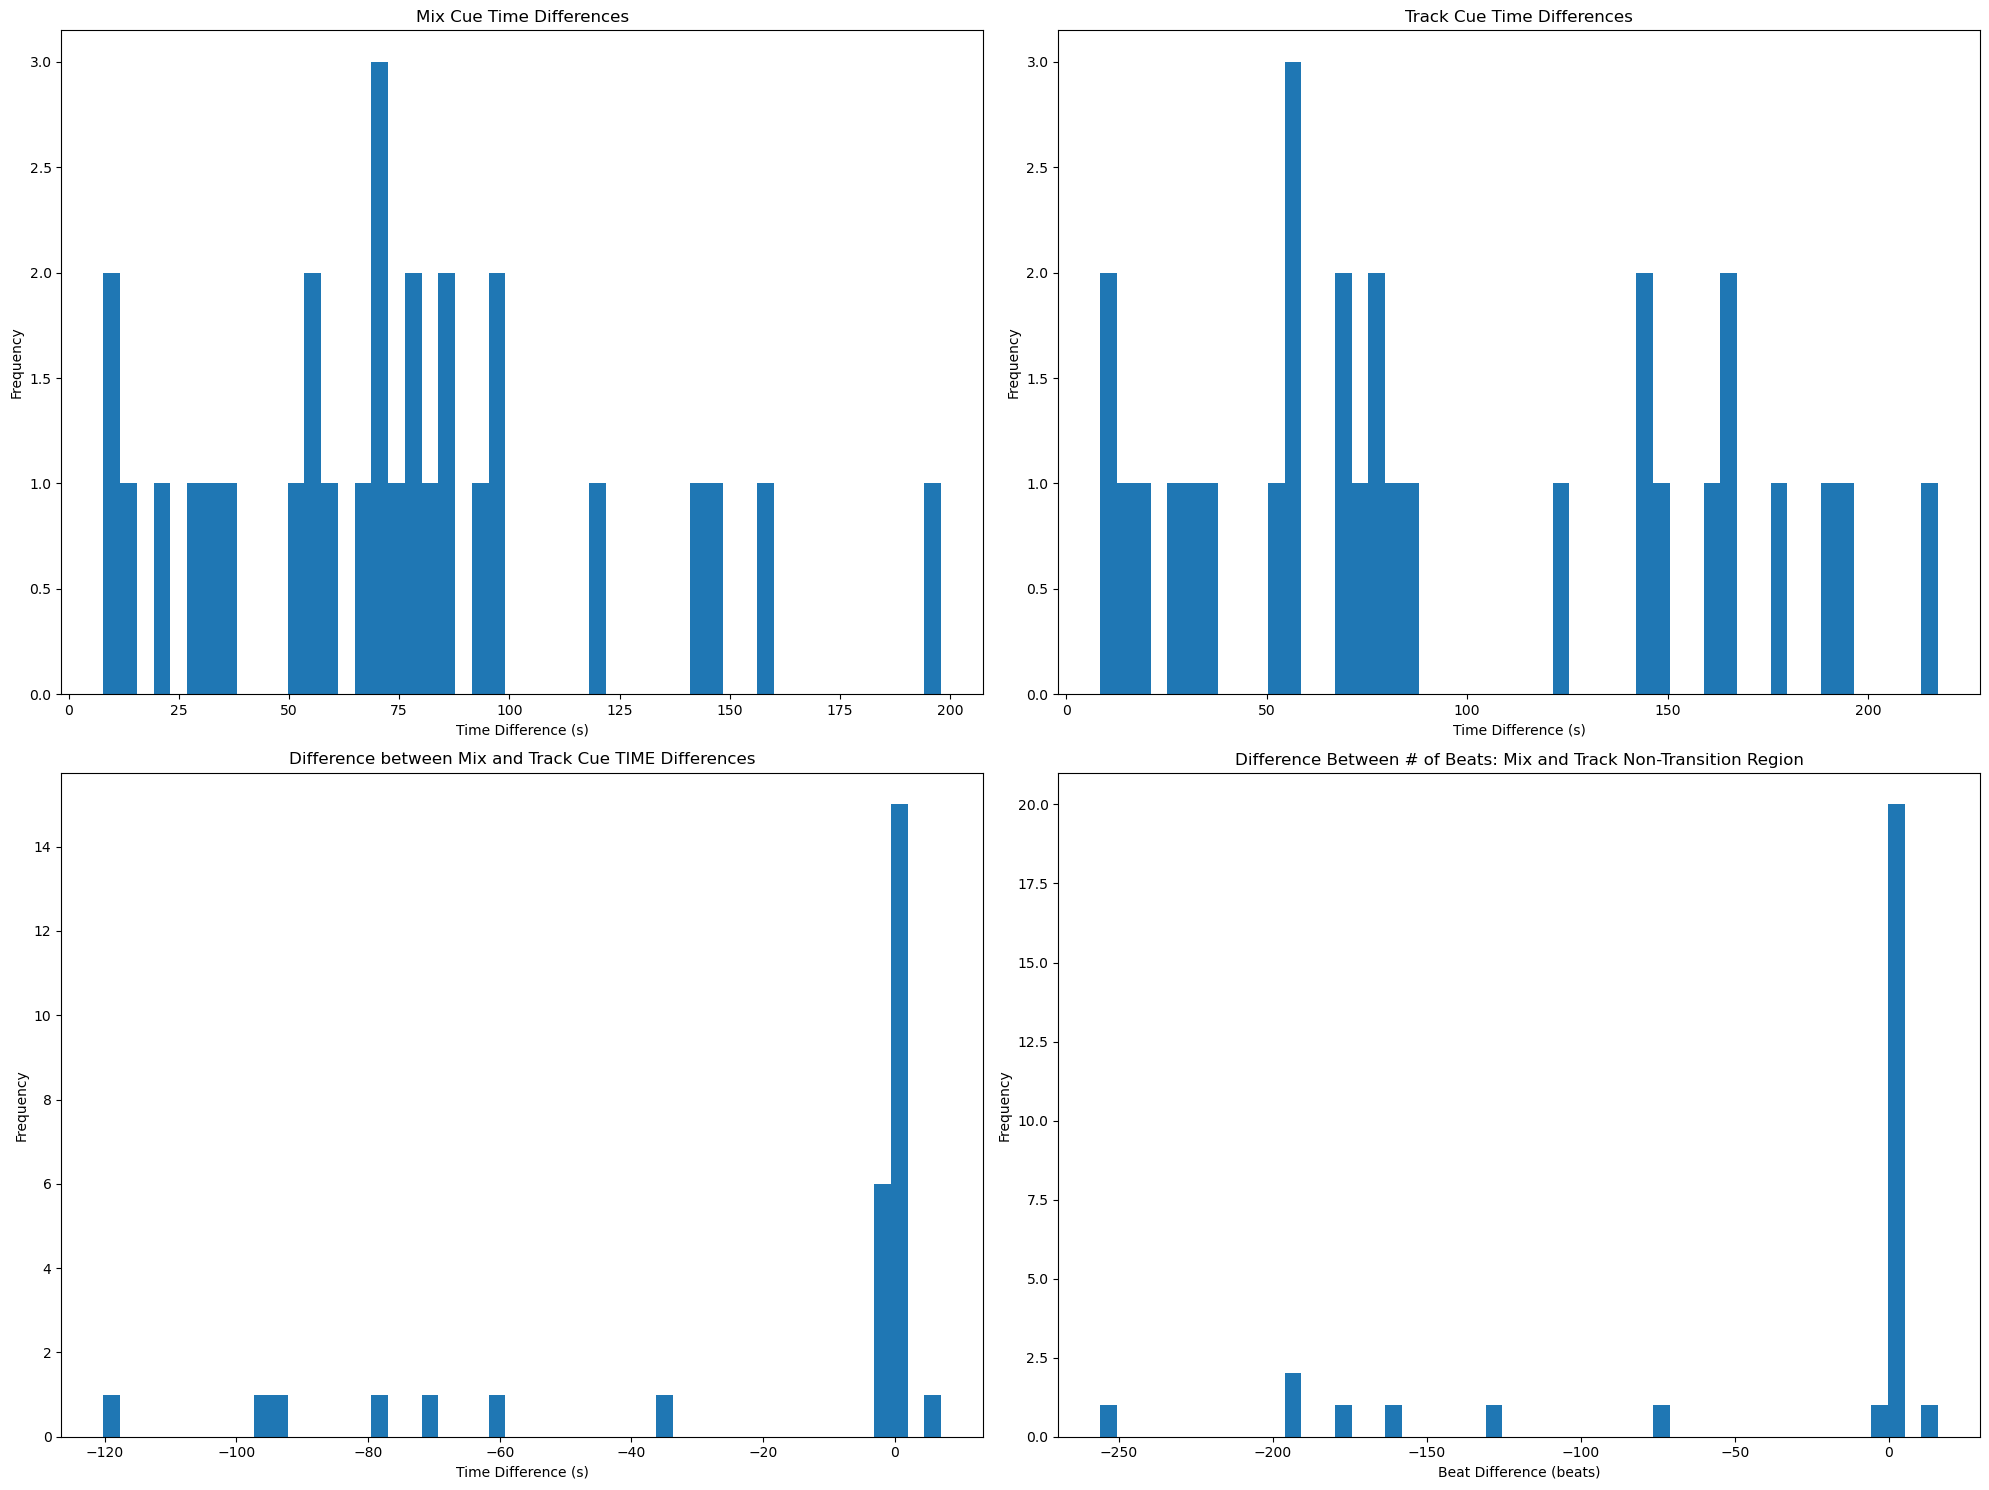

In [89]:
analyze_cue_time_diff(df_chroma_db_os)

Number of tracks with key changes: 0


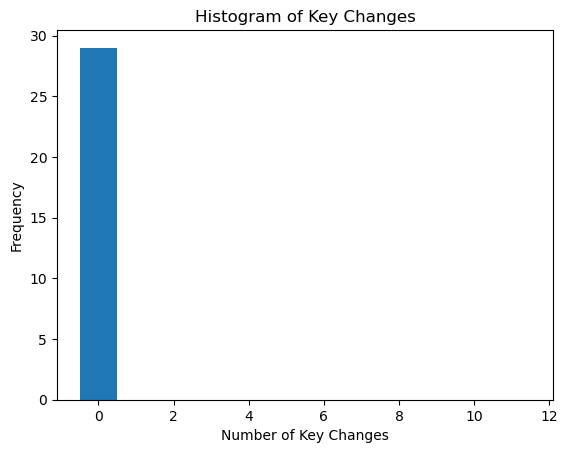

In [90]:
analyze_key_changes(df_chroma_db_os)

In [92]:
check_cue_time_order(df_chroma_db_os)

Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 16juffhx


Summary statistics of transition gaps in TIME domain:
count     28.000000
mean      46.291786
std       58.955706
min       -6.230000
25%       18.637500
50%       33.035000
75%       47.390000
max      306.770000
Name: time_transition_gap, dtype: float64

Summary statistics of transition gaps in BEAT domain:
count     28.000000
mean      99.000000
std      125.467718
min      -13.000000
25%       39.750000
50%       70.500000
75%      101.250000
max      652.000000
Name: beat_transition_gap, dtype: float64



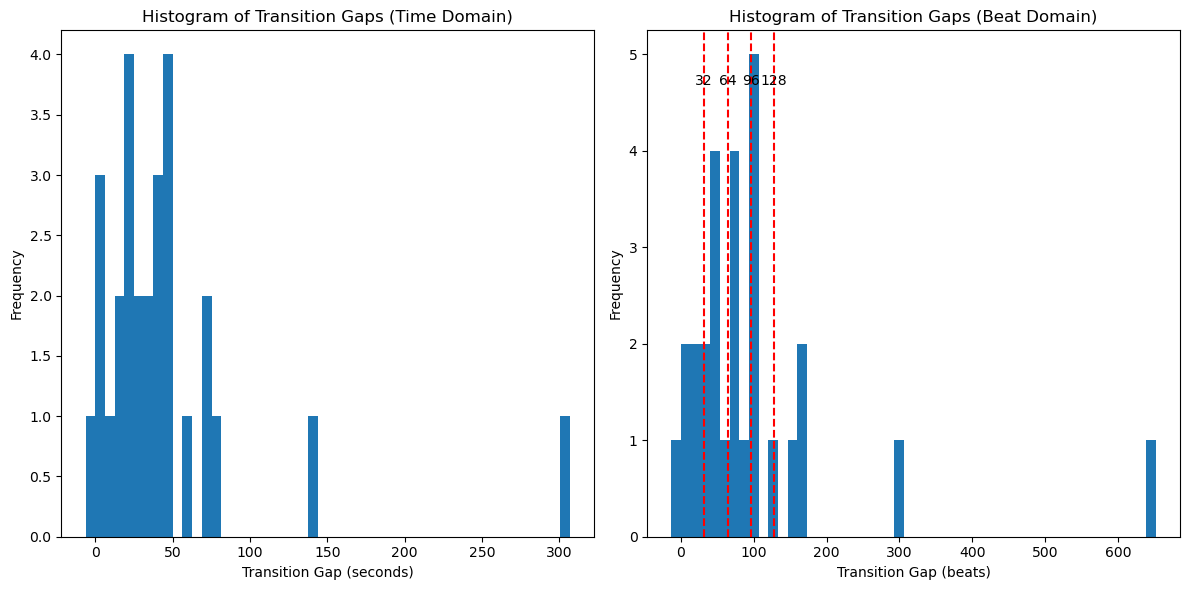

In [94]:
analyze_transition_gaps(df_chroma_db_os)

In [95]:
df_chroma_db_os[['track_id', 'match_rate', 'best_cost',
        'mix_cue_in_time', 'mix_cue_out_time', 'track_cue_in_time', 'track_cue_out_time',
        'mix_cue_in_beat', 'mix_cue_out_beat', 'track_cue_in_beat', 'track_cue_out_beat',
        'mix_cue_beat_diff', 'track_cue_beat_diff', 'cue_beat_diff_diff',
        'time_transition_gap', 'beat_transition_gap']].head(8)

track_id  match_rate  best_cost  mix_cue_in_time  mix_cue_out_time  \
0  12t6wktp    0.511450   3.220237             7.98            106.12   
1  16juffhx    1.000000   3.411794            99.89            156.97   
2  258n7bkf    1.000000   3.125994           172.45            242.97   
3  10y0bwb5    0.592357   3.585694           268.10            354.04   
4   g9krvgx    1.000000   2.940552           360.31            368.18   
5   9p7yws5    1.000000   3.439885           439.36            491.73   
6  1qc2j195    0.572816   3.065436           522.86            617.46   
7  1mlcb24f    1.000000   3.541719           650.76            661.08   

   track_cue_in_time  track_cue_out_time  mix_cue_in_beat  mix_cue_out_beat  \
0               0.23              193.52               16               217   
1               5.67               62.39              204               325   
2              14.18               84.96              358               509   
3              42.86              190.04              563               749   
4              15.93               24.41              763               783   
5               5.79               57.52              946              1065   
6               3.41              168.21             1135              1371   
7              37.08               47.39             1442              1464   

   track_cue_in_beat  track_cue_out_beat  mix_cue_beat_diff  \
0                  0                 393                201   
1                 12                 133                121   
2                 30                 181                151   
3                 91                 405                186   
4                 34                  54                 20   
5                 13                 132                119   
6                  8                 420                236   
7                 79                 101                 22   

   track_cue_beat_diff  cue_beat_diff_diff  time_transition_gap  \
0                  393                -192                  NaN   
1                  121                   0                -6.23   
2                  151                   0                15.48   
3                  314                -128                25.13   
4                   20                   0                 6.27   
5                  119                   0                71.18   
6                  412                -176                31.13   
7                   22                   0                33.30   

   beat_transition_gap  
0                  NaN  
1                -13.0  
2                 33.0  
3                 54.0  
4                 14.0  
5                163.0  
6                 70.0  
7                 71.0

In [96]:
analyze_match_rate(df_chroma_db_os)

Match Rate Analysis:
count    29.000000
mean      0.870186
std       0.201655
min       0.445087
25%       0.874214
50%       0.992395
75%       1.000000
max       1.000000
Name: match_rate, dtype: float64
Percentage of Match Rates Equal to 1: 48.28%


In [97]:
df_chroma_db_os.iloc[3]['wp']

array([[449, 759],
       [448, 758],
       [447, 757],
       [446, 757],
       [445, 757],
       [444, 757],
       [443, 757],
       [442, 757],
       [441, 757],
       [440, 757],
       [439, 757],
       [438, 757],
       [437, 757],
       [436, 757],
       [435, 757],
       [434, 757],
       [433, 757],
       [432, 757],
       [431, 757],
       [430, 757],
       [429, 757],
       [428, 757],
       [427, 757],
       [426, 757],
       [425, 757],
       [424, 757],
       [423, 757],
       [422, 757],
       [421, 757],
       [420, 757],
       [419, 757],
       [418, 757],
       [417, 757],
       [416, 756],
       [415, 755],
       [414, 754],
       [413, 753],
       [412, 752],
       [411, 751],
       [410, 751],
       [409, 751],
       [408, 750],
       [407, 749],
       [406, 749],
       [405, 749],
       [404, 748],
       [403, 747],
       [402, 746],
       [401, 745],
       [400, 744],
       [399, 743],
       [398, 742],
       [397,

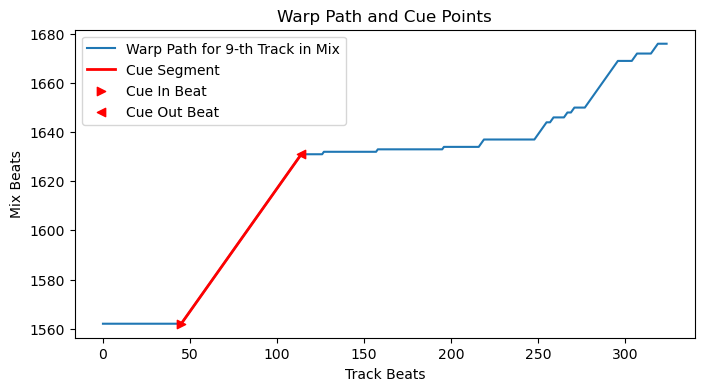

In [98]:
plot_warp_path(df_chroma_db_os)

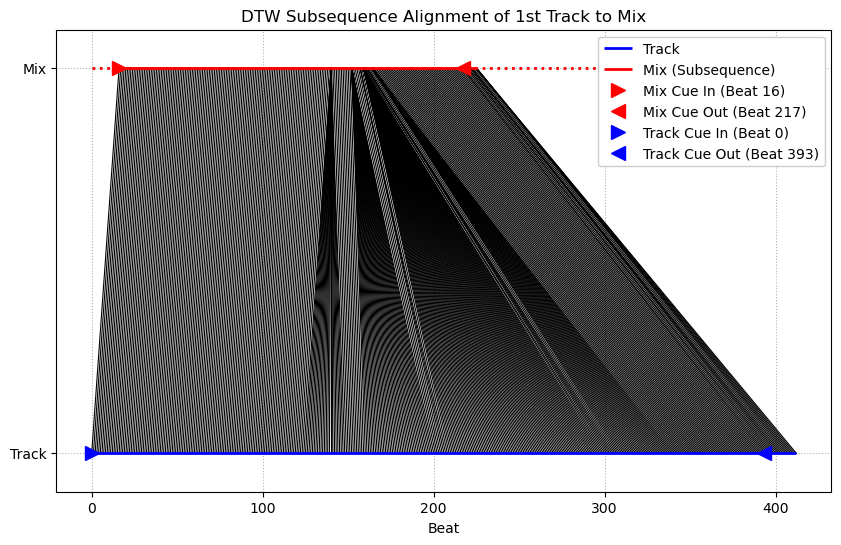

In [99]:
plot_warp_path_connections(df_chroma_db_os)

In [100]:
df_chroma_db_os.iloc[0]['wp']

array([[412, 225],
       [411, 225],
       [410, 225],
       [409, 225],
       [408, 225],
       [407, 225],
       [406, 225],
       [405, 224],
       [404, 223],
       [403, 222],
       [402, 222],
       [401, 222],
       [400, 222],
       [399, 221],
       [398, 220],
       [397, 220],
       [396, 219],
       [395, 218],
       [394, 217],
       [393, 217],
       [392, 216],
       [391, 215],
       [390, 214],
       [389, 213],
       [388, 212],
       [387, 211],
       [386, 210],
       [385, 209],
       [384, 208],
       [383, 207],
       [382, 206],
       [381, 205],
       [380, 204],
       [379, 203],
       [378, 202],
       [377, 201],
       [376, 200],
       [375, 199],
       [374, 198],
       [373, 197],
       [372, 196],
       [371, 195],
       [370, 194],
       [369, 193],
       [368, 192],
       [367, 191],
       [366, 190],
       [365, 189],
       [364, 188],
       [363, 187],
       [362, 186],
       [361, 185],
       [360,

# Downbeat Prob, Onset Strength

In [114]:
df_db_os = pd.read_pickle('../data/align/jwmtj61-downbeat_prob+onset_strength.pkl')

Mix Cue Time Differences:
count     29.000000
mean      55.030000
std       47.948811
min        3.770000
25%       16.620000
50%       43.350000
75%       76.080000
max      200.820000
Name: mix_cue_time_diff, dtype: float64
Standard Deviation: 47.94881057663769

Track Cue Time Differences:
count     29.000000
mean      60.984828
std       54.324524
min        3.020000
25%       16.400000
50%       43.320000
75%       76.410000
max      197.600000
Name: track_cue_time_diff, dtype: float64
Standard Deviation: 54.32452350857297

Difference between Mix and Track Cue TIME Differences:
count    29.000000
mean     -5.954828
std      17.198417
min     -78.510000
25%      -2.720000
50%      -0.090000
75%       0.030000
max       3.220000
Name: cue_time_diff_diff, dtype: float64
Standard Deviation: 17.19841658423604

Difference between Mix and Track Cue BEAT Differences:
count     29.000000
mean     -10.793103
std       35.108383
min     -171.000000
25%        0.000000
50%        0.000000
75% 

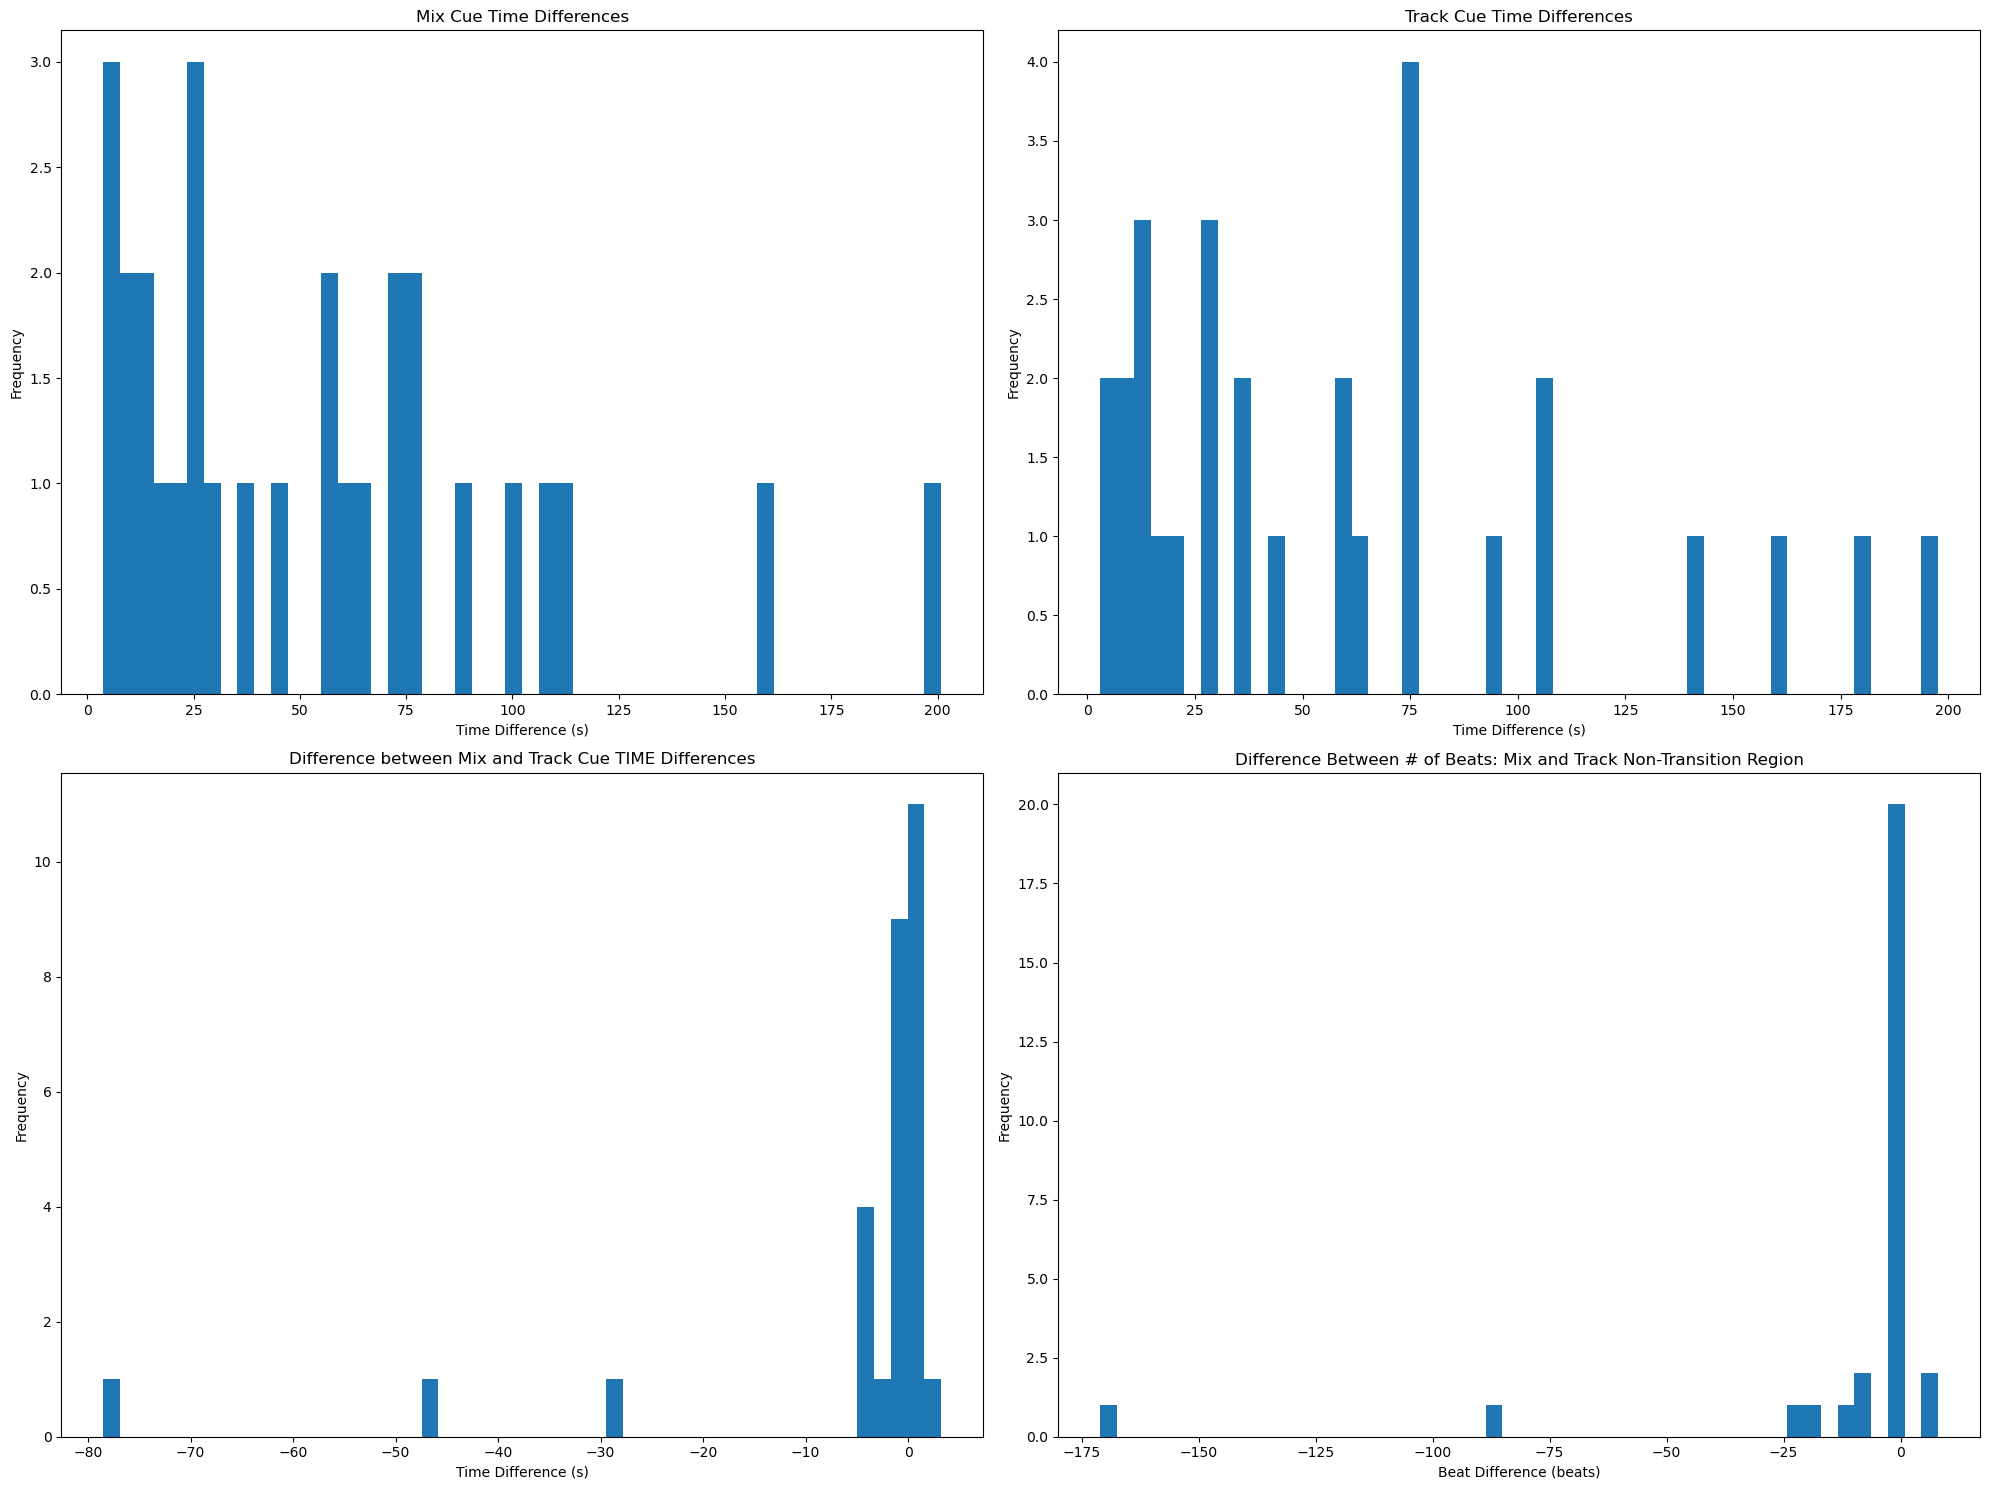

In [115]:
analyze_cue_time_diff(df_db_os)

Number of tracks with key changes: 0


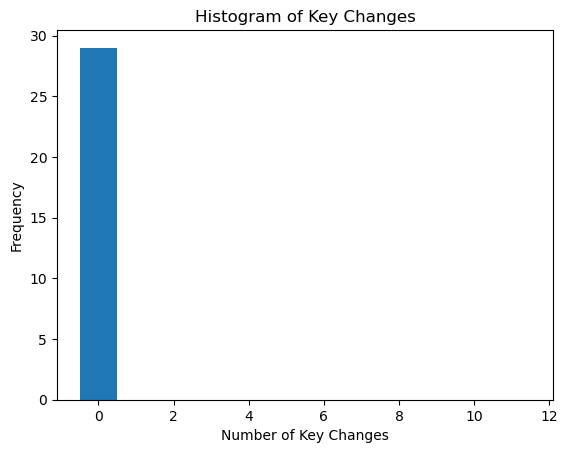

In [116]:
analyze_key_changes(df_db_os)

In [117]:
check_cue_time_order(df_db_os)

Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 258n7bkf
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track g9krvgx
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 9p7yws5
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 1b82c47p
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 1zpfjwkx
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 2rwj144f
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 2fnjbkm5
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 2bv3tl05
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 2m76b78x
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 10y4b0pp
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 1yrr5lgf
Error: mix_cue_in_time is not after previous 

Summary statistics of transition gaps in TIME domain:
count      28.000000
mean       46.816429
std       952.290680
min     -1842.060000
25%      -651.212500
50%        19.695000
75%       820.735000
max      2094.900000
Name: time_transition_gap, dtype: float64

Summary statistics of transition gaps in BEAT domain:
count      28.000000
mean       99.071429
std      2029.596237
min     -3890.000000
25%     -1386.000000
50%        43.500000
75%      1739.750000
max      4461.000000
Name: beat_transition_gap, dtype: float64



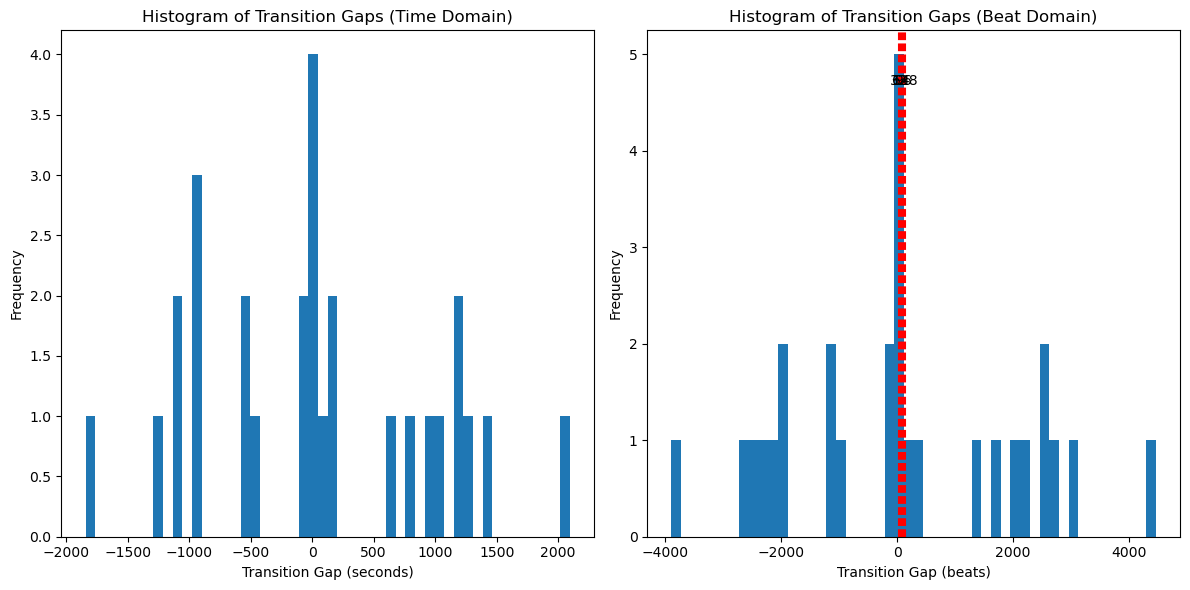

In [118]:
analyze_transition_gaps(df_db_os)

In [119]:
df_db_os[['track_id', 'match_rate', 'best_cost',
        'mix_cue_in_time', 'mix_cue_out_time', 'track_cue_in_time', 'track_cue_out_time',
        'mix_cue_in_beat', 'mix_cue_out_beat', 'track_cue_in_beat', 'track_cue_out_beat',
        'mix_cue_beat_diff', 'track_cue_beat_diff', 'cue_beat_diff_diff',
        'time_transition_gap', 'beat_transition_gap']].head(8)

track_id  match_rate  best_cost  mix_cue_in_time  mix_cue_out_time  \
0  12t6wktp    1.000000   2.133308             7.98             66.92   
1  16juffhx    0.932203   1.935210          1238.53           1264.90   
2  258n7bkf    0.917647   1.810166           176.20            252.28   
3  10y0bwb5    0.578947   1.939313          1251.95           1309.13   
4   g9krvgx    0.648387   1.700225           380.65            493.07   
5   9p7yws5    0.972028   1.870689           442.39            504.74   
6  1qc2j195    0.987500   1.626804           540.45            604.07   
7  1mlcb24f    0.527132   2.047303          1541.10           1641.16   

   track_cue_in_time  track_cue_out_time  mix_cue_in_beat  mix_cue_out_beat  \
0               0.23               59.26               16               136   
1              45.51               72.23             2731              2788   
2              17.93               94.34              366               529   
3             101.45              205.98             2760              2897   
4              37.87              178.58              822              1068   
5               8.81               69.69              953              1094   
6              21.00               84.61             1179              1338   
7              12.70              191.27             3401              3611   

   track_cue_in_beat  track_cue_out_beat  mix_cue_beat_diff  \
0                  0                 120                120   
1                 97                 154                 57   
2                 38                 201                163   
3                216                 439                137   
4                 93                 358                246   
5                 20                 161                141   
6                 52                 211                159   
7                 27                 408                210   

   track_cue_beat_diff  cue_beat_diff_diff  time_transition_gap  \
0                  120                   0                  NaN   
1                   57                   0              1171.61   
2                  163                   0             -1088.70   
3                  223                 -86               999.67   
4                  265                 -19              -928.48   
5                  141                   0               -50.68   
6                  159                   0                35.71   
7                  381                -171               937.03   

   beat_transition_gap  
0                  NaN  
1               2595.0  
2              -2422.0  
3               2231.0  
4              -2075.0  
5               -115.0  
6                 85.0  
7               2063.0

In [120]:
analyze_match_rate(df_db_os)

Match Rate Analysis:
count    29.000000
mean      0.898250
std       0.148113
min       0.527132
25%       0.831099
50%       0.987342
75%       1.000000
max       1.000000
Name: match_rate, dtype: float64
Percentage of Match Rates Equal to 1: 37.93%


In [121]:
df_db_os.iloc[3]['wp']

array([[ 449, 2898],
       [ 448, 2897],
       [ 447, 2897],
       [ 446, 2897],
       [ 445, 2897],
       [ 444, 2897],
       [ 443, 2897],
       [ 442, 2897],
       [ 441, 2897],
       [ 440, 2897],
       [ 439, 2897],
       [ 438, 2896],
       [ 437, 2895],
       [ 436, 2894],
       [ 435, 2893],
       [ 434, 2892],
       [ 433, 2891],
       [ 432, 2890],
       [ 431, 2889],
       [ 430, 2888],
       [ 429, 2887],
       [ 428, 2886],
       [ 427, 2885],
       [ 426, 2884],
       [ 425, 2883],
       [ 424, 2882],
       [ 423, 2881],
       [ 422, 2880],
       [ 421, 2879],
       [ 420, 2878],
       [ 419, 2877],
       [ 418, 2876],
       [ 417, 2875],
       [ 416, 2874],
       [ 415, 2873],
       [ 414, 2872],
       [ 413, 2872],
       [ 412, 2871],
       [ 411, 2870],
       [ 410, 2869],
       [ 409, 2869],
       [ 408, 2869],
       [ 407, 2869],
       [ 406, 2868],
       [ 405, 2867],
       [ 404, 2866],
       [ 403, 2865],
       [ 402,

In [123]:
# # Fails because warp path is not 1-to-1
# plot_warp_path(df_db_os)

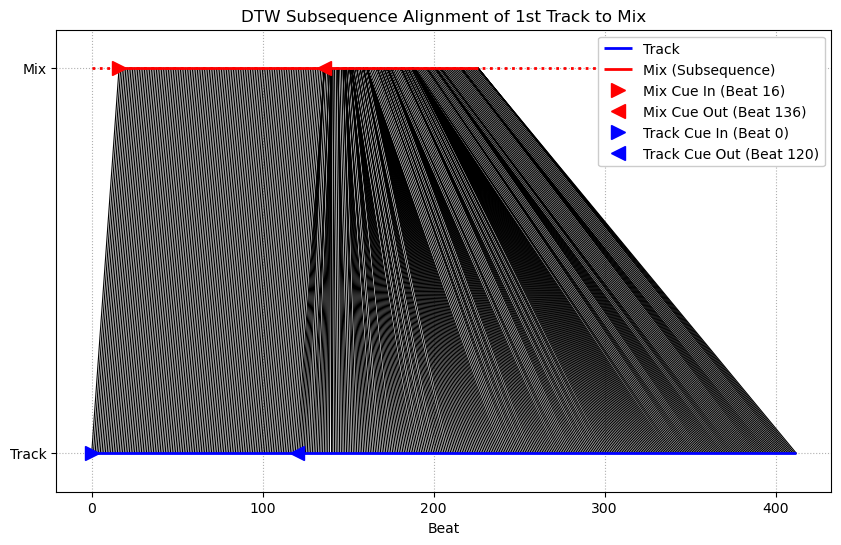

In [124]:
plot_warp_path_connections(df_db_os)

In [ ]:
df_db_os.iloc[0]['wp']

array([[412, 225],
       [411, 225],
       [410, 225],
       [409, 225],
       [408, 225],
       [407, 225],
       [406, 225],
       [405, 224],
       [404, 223],
       [403, 222],
       [402, 222],
       [401, 222],
       [400, 222],
       [399, 221],
       [398, 220],
       [397, 220],
       [396, 219],
       [395, 218],
       [394, 217],
       [393, 217],
       [392, 216],
       [391, 215],
       [390, 214],
       [389, 213],
       [388, 212],
       [387, 211],
       [386, 210],
       [385, 209],
       [384, 208],
       [383, 207],
       [382, 206],
       [381, 205],
       [380, 204],
       [379, 203],
       [378, 202],
       [377, 201],
       [376, 200],
       [375, 199],
       [374, 198],
       [373, 197],
       [372, 196],
       [371, 195],
       [370, 194],
       [369, 193],
       [368, 192],
       [367, 191],
       [366, 190],
       [365, 189],
       [364, 188],
       [363, 187],
       [362, 186],
       [361, 185],
       [360,

# Chroma, Downbeat Prob

In [172]:
df_chroma_db = pd.read_pickle('../data/align/jwmtj61-chroma+downbeat_prob.pkl')

Mix Cue Time Differences:
count     29.000000
mean      79.855172
std       48.077592
min       14.080000
25%       35.310000
50%       66.680000
75%      103.470000
max      197.970000
Name: mix_cue_time_diff, dtype: float64
Standard Deviation: 48.07759239133952

Track Cue Time Differences:
count     29.000000
mean     104.606552
std       61.443170
min       14.070000
25%       54.290000
50%      129.340000
75%      147.180000
max      223.590000
Name: track_cue_time_diff, dtype: float64
Standard Deviation: 61.44316957713631

Difference between Mix and Track Cue TIME Differences:
count     29.000000
mean     -24.751379
std       38.406454
min     -120.120000
25%      -43.940000
50%       -0.770000
75%       -0.060000
max        7.050000
Name: cue_time_diff_diff, dtype: float64
Standard Deviation: 38.40645376608856

Difference between Mix and Track Cue BEAT Differences:
count     29.000000
mean     -54.310345
std       85.516959
min     -256.000000
25%     -116.000000
50%        0.000

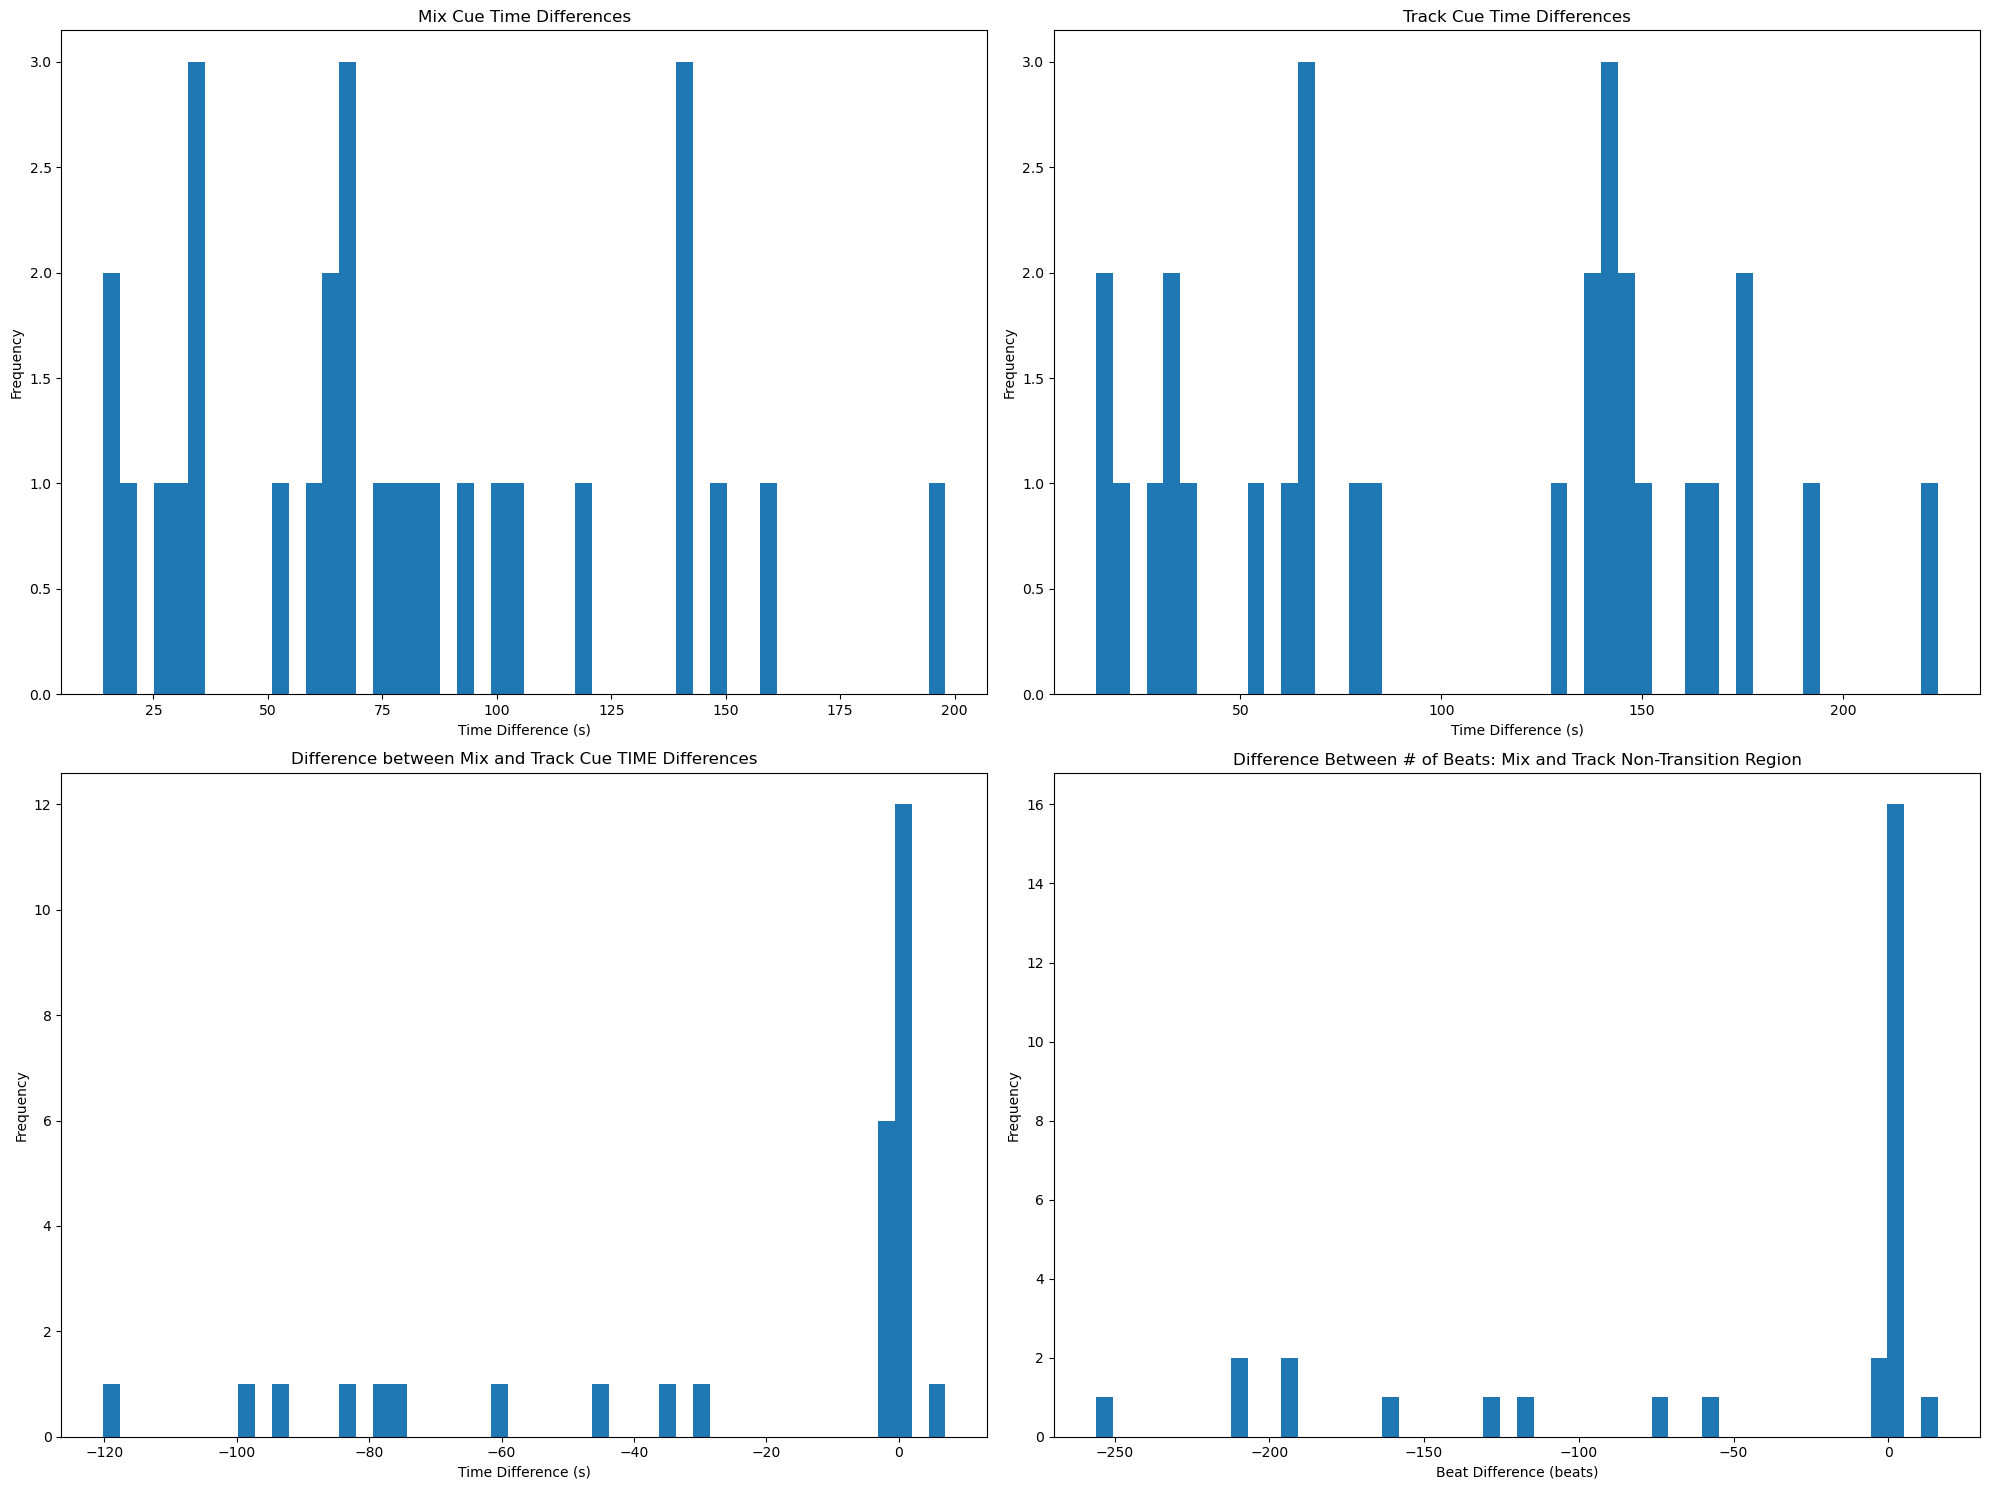

In [173]:
analyze_cue_time_diff(df_chroma_db)

Number of tracks with key changes: 0


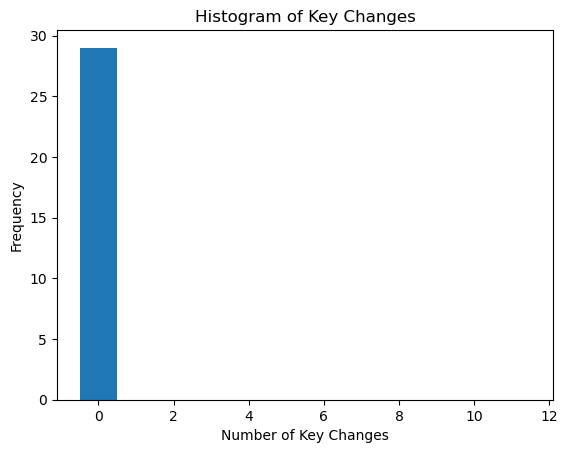

In [174]:
analyze_key_changes(df_chroma_db)

In [175]:
check_cue_time_order(df_chroma_db)

Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track mwv1cnx
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 2bvj420x
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 1yrr5lgf


Summary statistics of transition gaps in TIME domain:
count     28.000000
mean      41.956786
std       56.725129
min      -24.340000
25%       13.882500
50%       22.540000
75%       53.527500
max      269.480000
Name: time_transition_gap, dtype: float64

Summary statistics of transition gaps in BEAT domain:
count     28.000000
mean      87.500000
std      119.149921
min      -52.000000
25%       33.000000
50%       48.000000
75%      106.750000
max      572.000000
Name: beat_transition_gap, dtype: float64



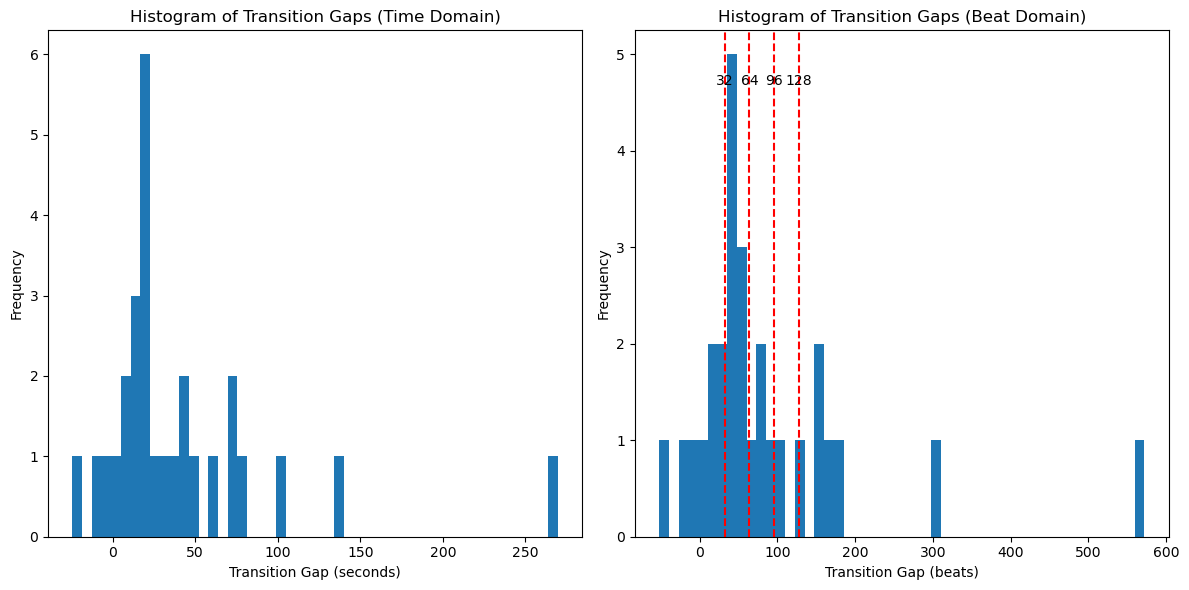

In [176]:
analyze_transition_gaps(df_chroma_db)

In [177]:
df_chroma_db[['track_id', 'match_rate', 'best_cost',
        'mix_cue_in_time', 'mix_cue_out_time', 'track_cue_in_time', 'track_cue_out_time',
        'mix_cue_in_beat', 'mix_cue_out_beat', 'track_cue_in_beat', 'track_cue_out_beat',
        'mix_cue_beat_diff', 'track_cue_beat_diff', 'cue_beat_diff_diff',
        'time_transition_gap', 'beat_transition_gap']].head(8)

track_id  match_rate  best_cost  mix_cue_in_time  mix_cue_out_time  \
0  12t6wktp    1.000000   2.409551             7.98             86.88   
1  16juffhx    1.000000   2.545352           109.46            144.77   
2  258n7bkf    1.000000   2.525022           172.45            254.14   
3  10y0bwb5    0.587302   2.974413           268.10            354.04   
4   g9krvgx    0.940476   2.292637           359.88            386.52   
5   9p7yws5    1.000000   2.793344           438.06            504.74   
6  1qc2j195    0.524887   2.564044           522.86            616.10   
7  1mlcb24f    1.000000   2.760645           675.59            689.67   

   track_cue_in_time  track_cue_out_time  mix_cue_in_beat  mix_cue_out_beat  \
0               0.23               79.42               16               177   
1              15.05               50.20              224               299   
2              14.18               96.21              358               533   
3              42.86              190.04              563               749   
4              15.47               44.48              762               843   
5               4.47               69.69              943              1094   
6               3.41              179.81             1135              1368   
7             159.41              173.48             1495              1525   

   track_cue_in_beat  track_cue_out_beat  mix_cue_beat_diff  \
0                  0                 161                161   
1                 32                 107                 75   
2                 30                 205                175   
3                 91                 405                186   
4                 33                 115                 81   
5                 10                 161                151   
6                  8                 449                233   
7                340                 370                 30   

   track_cue_beat_diff  cue_beat_diff_diff  time_transition_gap  \
0                  161                   0                  NaN   
1                   75                   0                22.58   
2                  175                   0                27.68   
3                  314                -128                13.96   
4                   82                  -1                 5.84   
5                  151                   0                51.54   
6                  441                -208                18.12   
7                   30                   0                59.49   

   beat_transition_gap  
0                  NaN  
1                 47.0  
2                 59.0  
3                 30.0  
4                 13.0  
5                100.0  
6                 41.0  
7                127.0

In [178]:
analyze_match_rate(df_chroma_db)

Match Rate Analysis:
count    29.000000
mean      0.814322
std       0.234636
min       0.246377
25%       0.663415
50%       0.947619
75%       1.000000
max       1.000000
Name: match_rate, dtype: float64
Percentage of Match Rates Equal to 1: 37.93%


In [179]:
df_chroma_db.iloc[3]['wp']

array([[449, 759],
       [448, 759],
       [447, 759],
       [446, 759],
       [445, 759],
       [444, 759],
       [443, 759],
       [442, 759],
       [441, 759],
       [440, 758],
       [439, 757],
       [438, 757],
       [437, 757],
       [436, 757],
       [435, 757],
       [434, 757],
       [433, 757],
       [432, 757],
       [431, 757],
       [430, 757],
       [429, 757],
       [428, 757],
       [427, 757],
       [426, 757],
       [425, 757],
       [424, 757],
       [423, 757],
       [422, 757],
       [421, 757],
       [420, 757],
       [419, 757],
       [418, 757],
       [417, 757],
       [416, 756],
       [415, 755],
       [414, 754],
       [413, 753],
       [412, 752],
       [411, 751],
       [410, 751],
       [409, 751],
       [408, 750],
       [407, 749],
       [406, 749],
       [405, 749],
       [404, 748],
       [403, 747],
       [402, 746],
       [401, 745],
       [400, 744],
       [399, 743],
       [398, 742],
       [397,

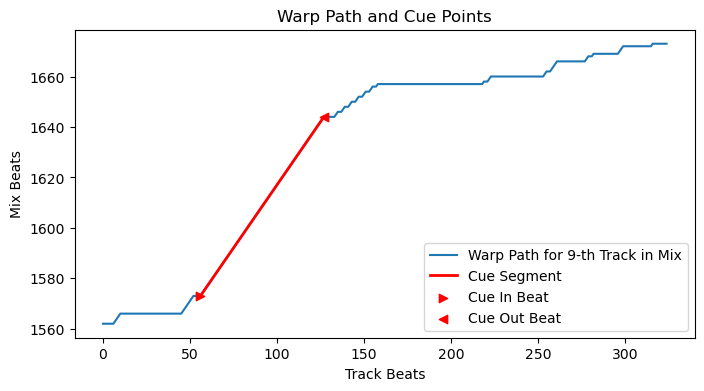

In [180]:
plot_warp_path(df_chroma_db)

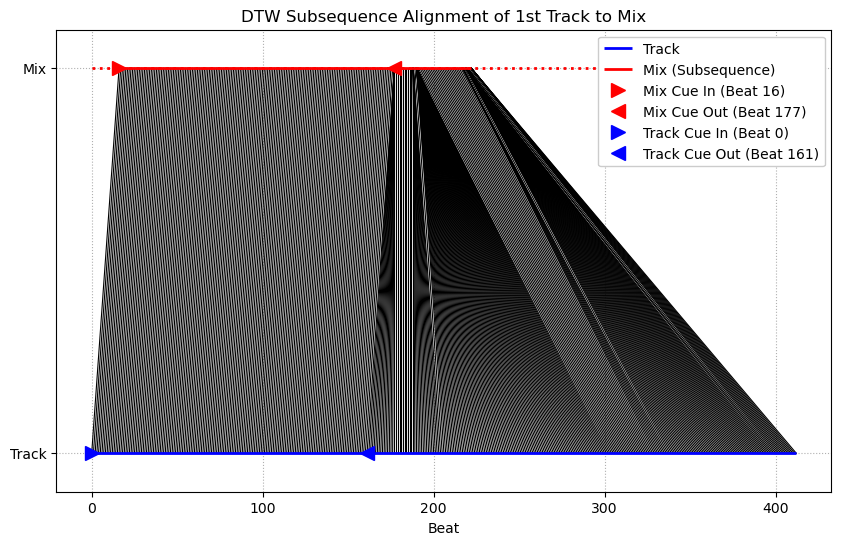

In [181]:
plot_warp_path_connections(df_chroma_db)

In [182]:
df_chroma_db.iloc[0]['wp']

array([[412, 222],
       [411, 222],
       [410, 222],
       [409, 222],
       [408, 222],
       [407, 222],
       [406, 222],
       [405, 222],
       [404, 222],
       [403, 222],
       [402, 222],
       [401, 222],
       [400, 222],
       [399, 221],
       [398, 220],
       [397, 220],
       [396, 219],
       [395, 219],
       [394, 219],
       [393, 219],
       [392, 219],
       [391, 219],
       [390, 219],
       [389, 219],
       [388, 219],
       [387, 219],
       [386, 219],
       [385, 219],
       [384, 219],
       [383, 219],
       [382, 219],
       [381, 219],
       [380, 219],
       [379, 219],
       [378, 219],
       [377, 219],
       [376, 219],
       [375, 219],
       [374, 219],
       [373, 219],
       [372, 219],
       [371, 219],
       [370, 219],
       [369, 219],
       [368, 219],
       [367, 219],
       [366, 219],
       [365, 219],
       [364, 219],
       [363, 219],
       [362, 219],
       [361, 219],
       [360,

# Chroma, Chroma CQT, Downbeat Prob

In [184]:
df_cens_cqt_db = pd.read_pickle('../data/align/jwmtj61-chroma+chroma_cqt+downbeat_prob.pkl')

Mix Cue Time Differences:
count     29.000000
mean      75.001379
std       46.502093
min        8.790000
25%       54.750000
50%       67.580000
75%       85.140000
max      212.220000
Name: mix_cue_time_diff, dtype: float64
Standard Deviation: 46.502092788861006

Track Cue Time Differences:
count     29.000000
mean      88.971379
std       60.256512
min        8.910000
25%       58.410000
50%       68.580000
75%      122.810000
max      223.590000
Name: track_cue_time_diff, dtype: float64
Standard Deviation: 60.25651190204246

Difference between Mix and Track Cue TIME Differences:
count     29.000000
mean     -13.970000
std       32.908442
min     -120.120000
25%       -2.360000
50%       -0.290000
75%        0.010000
max        6.990000
Name: cue_time_diff_diff, dtype: float64
Standard Deviation: 32.908442143099265

Difference between Mix and Track Cue BEAT Differences:
count     29.000000
mean     -29.275862
std       70.905317
min     -256.000000
25%        0.000000
50%        0.0

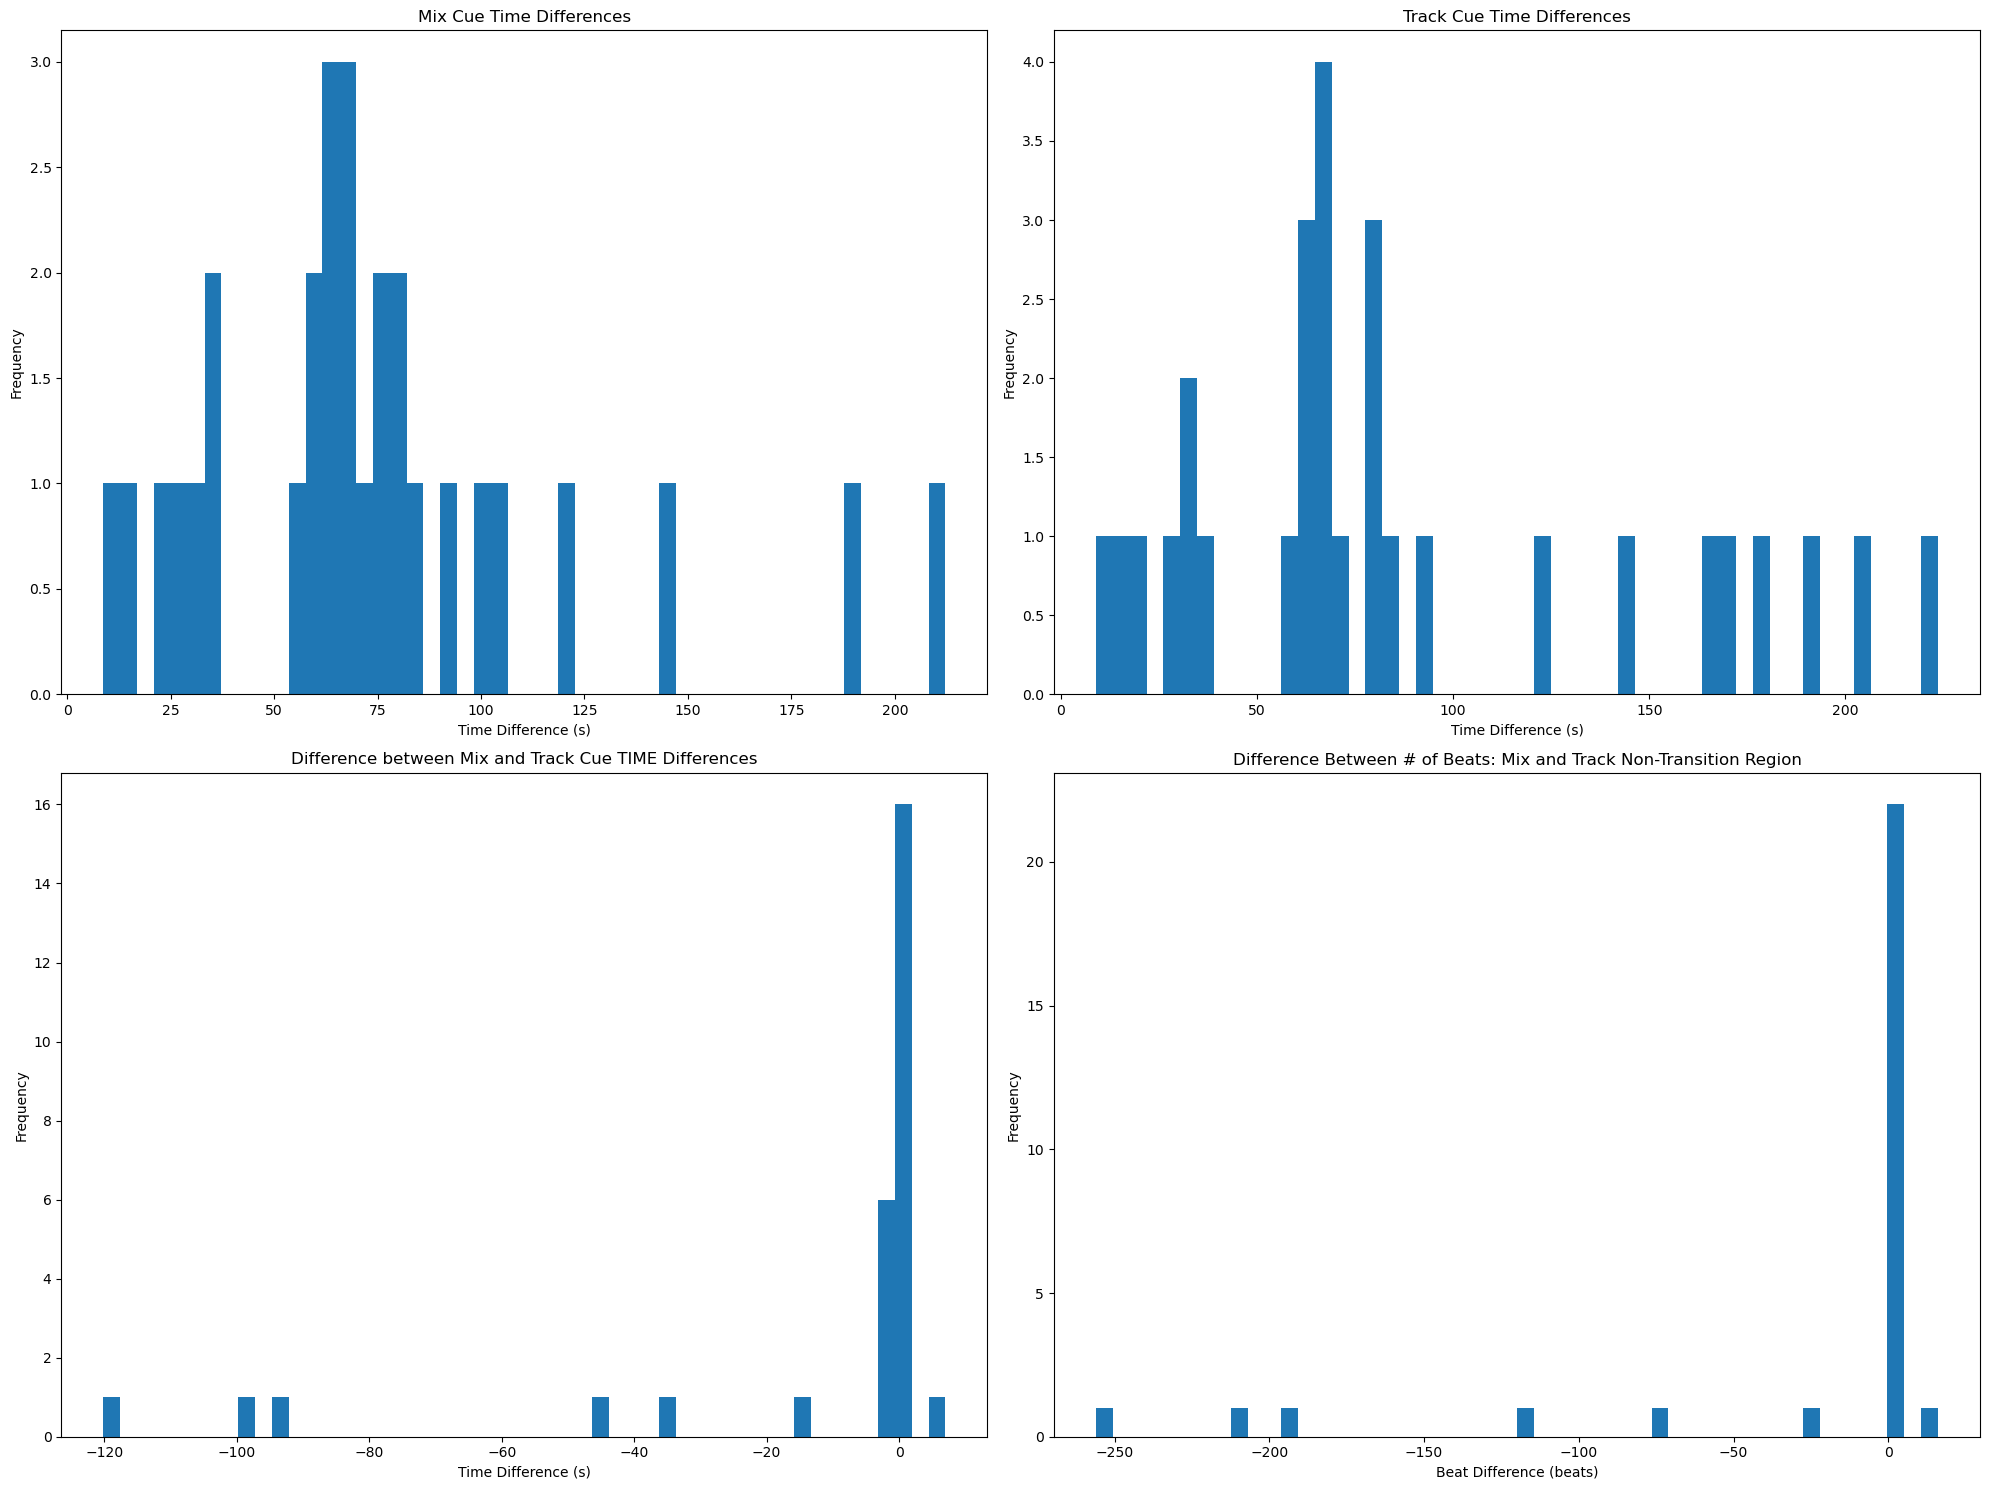

In [185]:
analyze_cue_time_diff(df_cens_cqt_db)

Number of tracks with key changes: 0


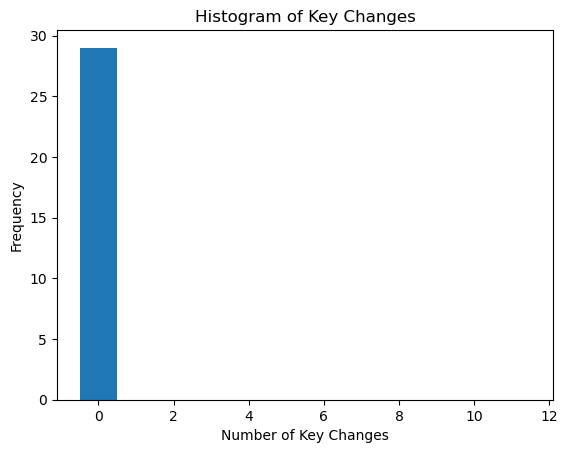

In [186]:
analyze_key_changes(df_cens_cqt_db)

In [187]:
check_cue_time_order(df_cens_cqt_db)

Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 2bvj420x


Summary statistics of transition gaps in TIME domain:
count     28.000000
mean      46.983929
std       59.639748
min      -10.640000
25%       17.397500
50%       30.435000
75%       52.540000
max      302.480000
Name: time_transition_gap, dtype: float64

Summary statistics of transition gaps in BEAT domain:
count     28.000000
mean      99.071429
std      126.378306
min      -23.000000
25%       40.750000
50%       64.000000
75%      104.500000
max      643.000000
Name: beat_transition_gap, dtype: float64



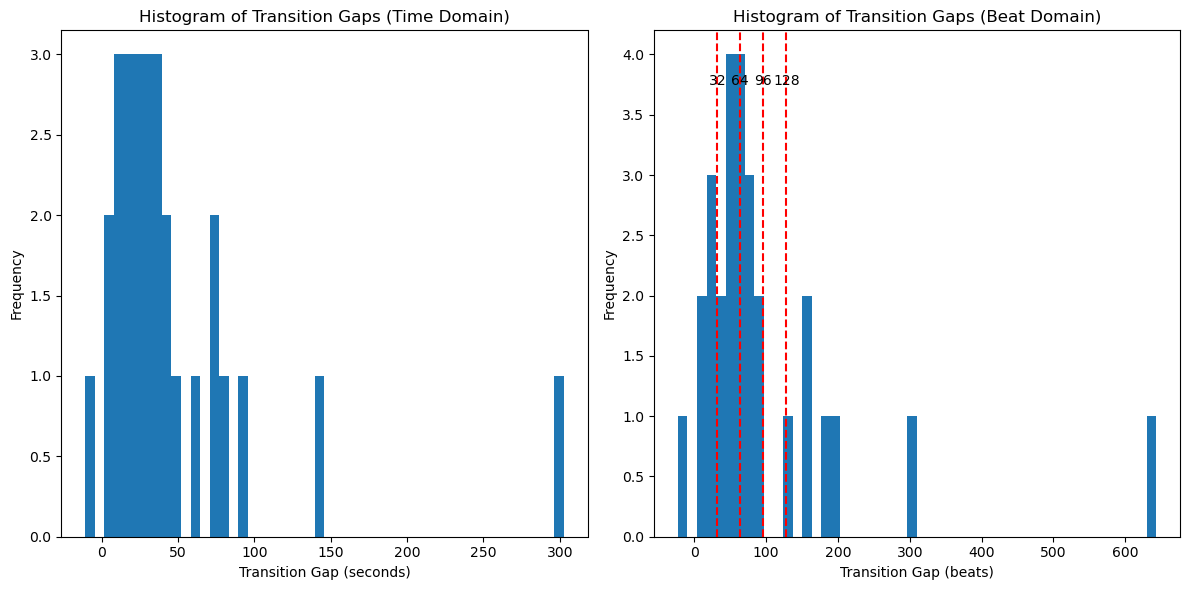

In [188]:
analyze_transition_gaps(df_cens_cqt_db)

In [189]:
df_cens_cqt_db[['track_id', 'match_rate', 'best_cost',
        'mix_cue_in_time', 'mix_cue_out_time', 'track_cue_in_time', 'track_cue_out_time',
        'mix_cue_in_beat', 'mix_cue_out_beat', 'track_cue_in_beat', 'track_cue_out_beat',
        'mix_cue_beat_diff', 'track_cue_beat_diff', 'cue_beat_diff_diff',
        'time_transition_gap', 'beat_transition_gap']].head(8)

track_id  match_rate  best_cost  mix_cue_in_time  mix_cue_out_time  \
0  12t6wktp    1.000000   3.164338             7.98             86.88   
1  16juffhx    1.000000   3.372634           109.46            144.77   
2  258n7bkf    1.000000   3.311239           172.45            266.23   
3  10y0bwb5    0.976190   4.082278           269.94            346.74   
4   g9krvgx    0.938144   2.996928           357.66            388.76   
5   9p7yws5    1.000000   3.686449           438.06            504.29   
6  1qc2j195    1.000000   3.569250           522.86            604.07   
7  1mlcb24f    0.352000   3.792339           615.27            684.97   

   track_cue_in_time  track_cue_out_time  mix_cue_in_beat  mix_cue_out_beat  \
0               0.23               79.42               16               177   
1              15.05               50.20              224               299   
2              14.18              108.39              358               559   
3              44.73              122.54              567               733   
4              13.12               46.58              757               851   
5               4.47               69.39              943              1093   
6               3.41               84.61             1135              1338   
7               0.96              168.78             1366              1515   

   track_cue_in_beat  track_cue_out_beat  mix_cue_beat_diff  \
0                  0                 161                161   
1                 32                 107                 75   
2                 30                 231                201   
3                 95                 261                166   
4                 28                 122                 94   
5                 10                 160                150   
6                  8                 211                203   
7                  2                 360                149   

   track_cue_beat_diff  cue_beat_diff_diff  time_transition_gap  \
0                  161                   0                  NaN   
1                   75                   0                22.58   
2                  201                   0                27.68   
3                  166                   0                 3.71   
4                   94                   0                10.92   
5                  150                   0                49.30   
6                  203                   0                18.57   
7                  358                -209                11.20   

   beat_transition_gap  
0                  NaN  
1                 47.0  
2                 59.0  
3                  8.0  
4                 24.0  
5                 92.0  
6                 42.0  
7                 28.0

In [190]:
analyze_match_rate(df_cens_cqt_db)

Match Rate Analysis:
count    29.000000
mean      0.899530
std       0.187055
min       0.352000
25%       0.938144
50%       1.000000
75%       1.000000
max       1.000000
Name: match_rate, dtype: float64
Percentage of Match Rates Equal to 1: 51.72%


In [191]:
df_cens_cqt_db.iloc[3]['wp']

array([[449, 759],
       [448, 759],
       [447, 759],
       [446, 759],
       [445, 759],
       [444, 758],
       [443, 758],
       [442, 758],
       [441, 758],
       [440, 758],
       [439, 757],
       [438, 757],
       [437, 757],
       [436, 757],
       [435, 757],
       [434, 757],
       [433, 757],
       [432, 756],
       [431, 755],
       [430, 754],
       [429, 753],
       [428, 753],
       [427, 753],
       [426, 753],
       [425, 753],
       [424, 753],
       [423, 753],
       [422, 753],
       [421, 753],
       [420, 753],
       [419, 753],
       [418, 753],
       [417, 753],
       [416, 752],
       [415, 751],
       [414, 751],
       [413, 751],
       [412, 751],
       [411, 751],
       [410, 751],
       [409, 751],
       [408, 751],
       [407, 751],
       [406, 751],
       [405, 751],
       [404, 751],
       [403, 751],
       [402, 751],
       [401, 751],
       [400, 750],
       [399, 749],
       [398, 749],
       [397,

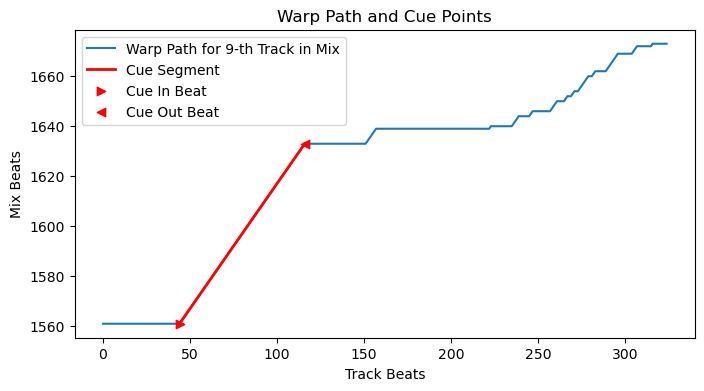

In [192]:
plot_warp_path(df_cens_cqt_db)

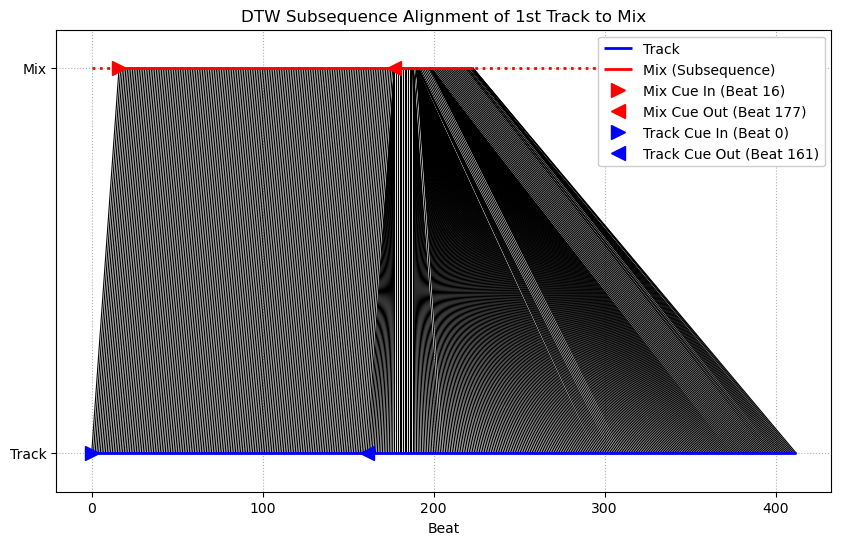

In [193]:
plot_warp_path_connections(df_cens_cqt_db)

In [194]:
df_cens_cqt_db.iloc[0]['wp']

array([[412, 223],
       [411, 223],
       [410, 223],
       [409, 222],
       [408, 222],
       [407, 222],
       [406, 222],
       [405, 222],
       [404, 222],
       [403, 222],
       [402, 222],
       [401, 222],
       [400, 222],
       [399, 221],
       [398, 220],
       [397, 220],
       [396, 219],
       [395, 219],
       [394, 218],
       [393, 217],
       [392, 216],
       [391, 215],
       [390, 214],
       [389, 213],
       [388, 212],
       [387, 211],
       [386, 210],
       [385, 209],
       [384, 208],
       [383, 207],
       [382, 206],
       [381, 205],
       [380, 204],
       [379, 203],
       [378, 202],
       [377, 201],
       [376, 200],
       [375, 199],
       [374, 198],
       [373, 198],
       [372, 198],
       [371, 198],
       [370, 198],
       [369, 198],
       [368, 198],
       [367, 198],
       [366, 198],
       [365, 198],
       [364, 198],
       [363, 198],
       [362, 198],
       [361, 198],
       [360,

# Chroma, Chroma CQT

In [195]:
df_cens_cqt = pd.read_pickle('../data/align/jwmtj61-chroma+chroma_cqt.pkl')

Mix Cue Time Differences:
count     29.000000
mean      81.728966
std       40.021655
min       12.030000
25%       57.560000
50%       72.810000
75%       97.500000
max      181.830000
Name: mix_cue_time_diff, dtype: float64
Standard Deviation: 40.021654615686984

Track Cue Time Differences:
count     29.000000
mean      93.594138
std       47.897472
min       34.690000
25%       63.610000
50%       73.120000
75%      131.720000
max      223.590000
Name: track_cue_time_diff, dtype: float64
Standard Deviation: 47.897472384640906

Difference between Mix and Track Cue TIME Differences:
count     29.000000
mean     -11.865172
std       31.008375
min     -120.120000
25%       -1.750000
50%       -0.290000
75%        0.010000
max        7.080000
Name: cue_time_diff_diff, dtype: float64
Standard Deviation: 31.00837497708015

Difference between Mix and Track Cue BEAT Differences:
count     29.000000
mean     -24.551724
std       65.682997
min     -256.000000
25%        0.000000
50%        0.0

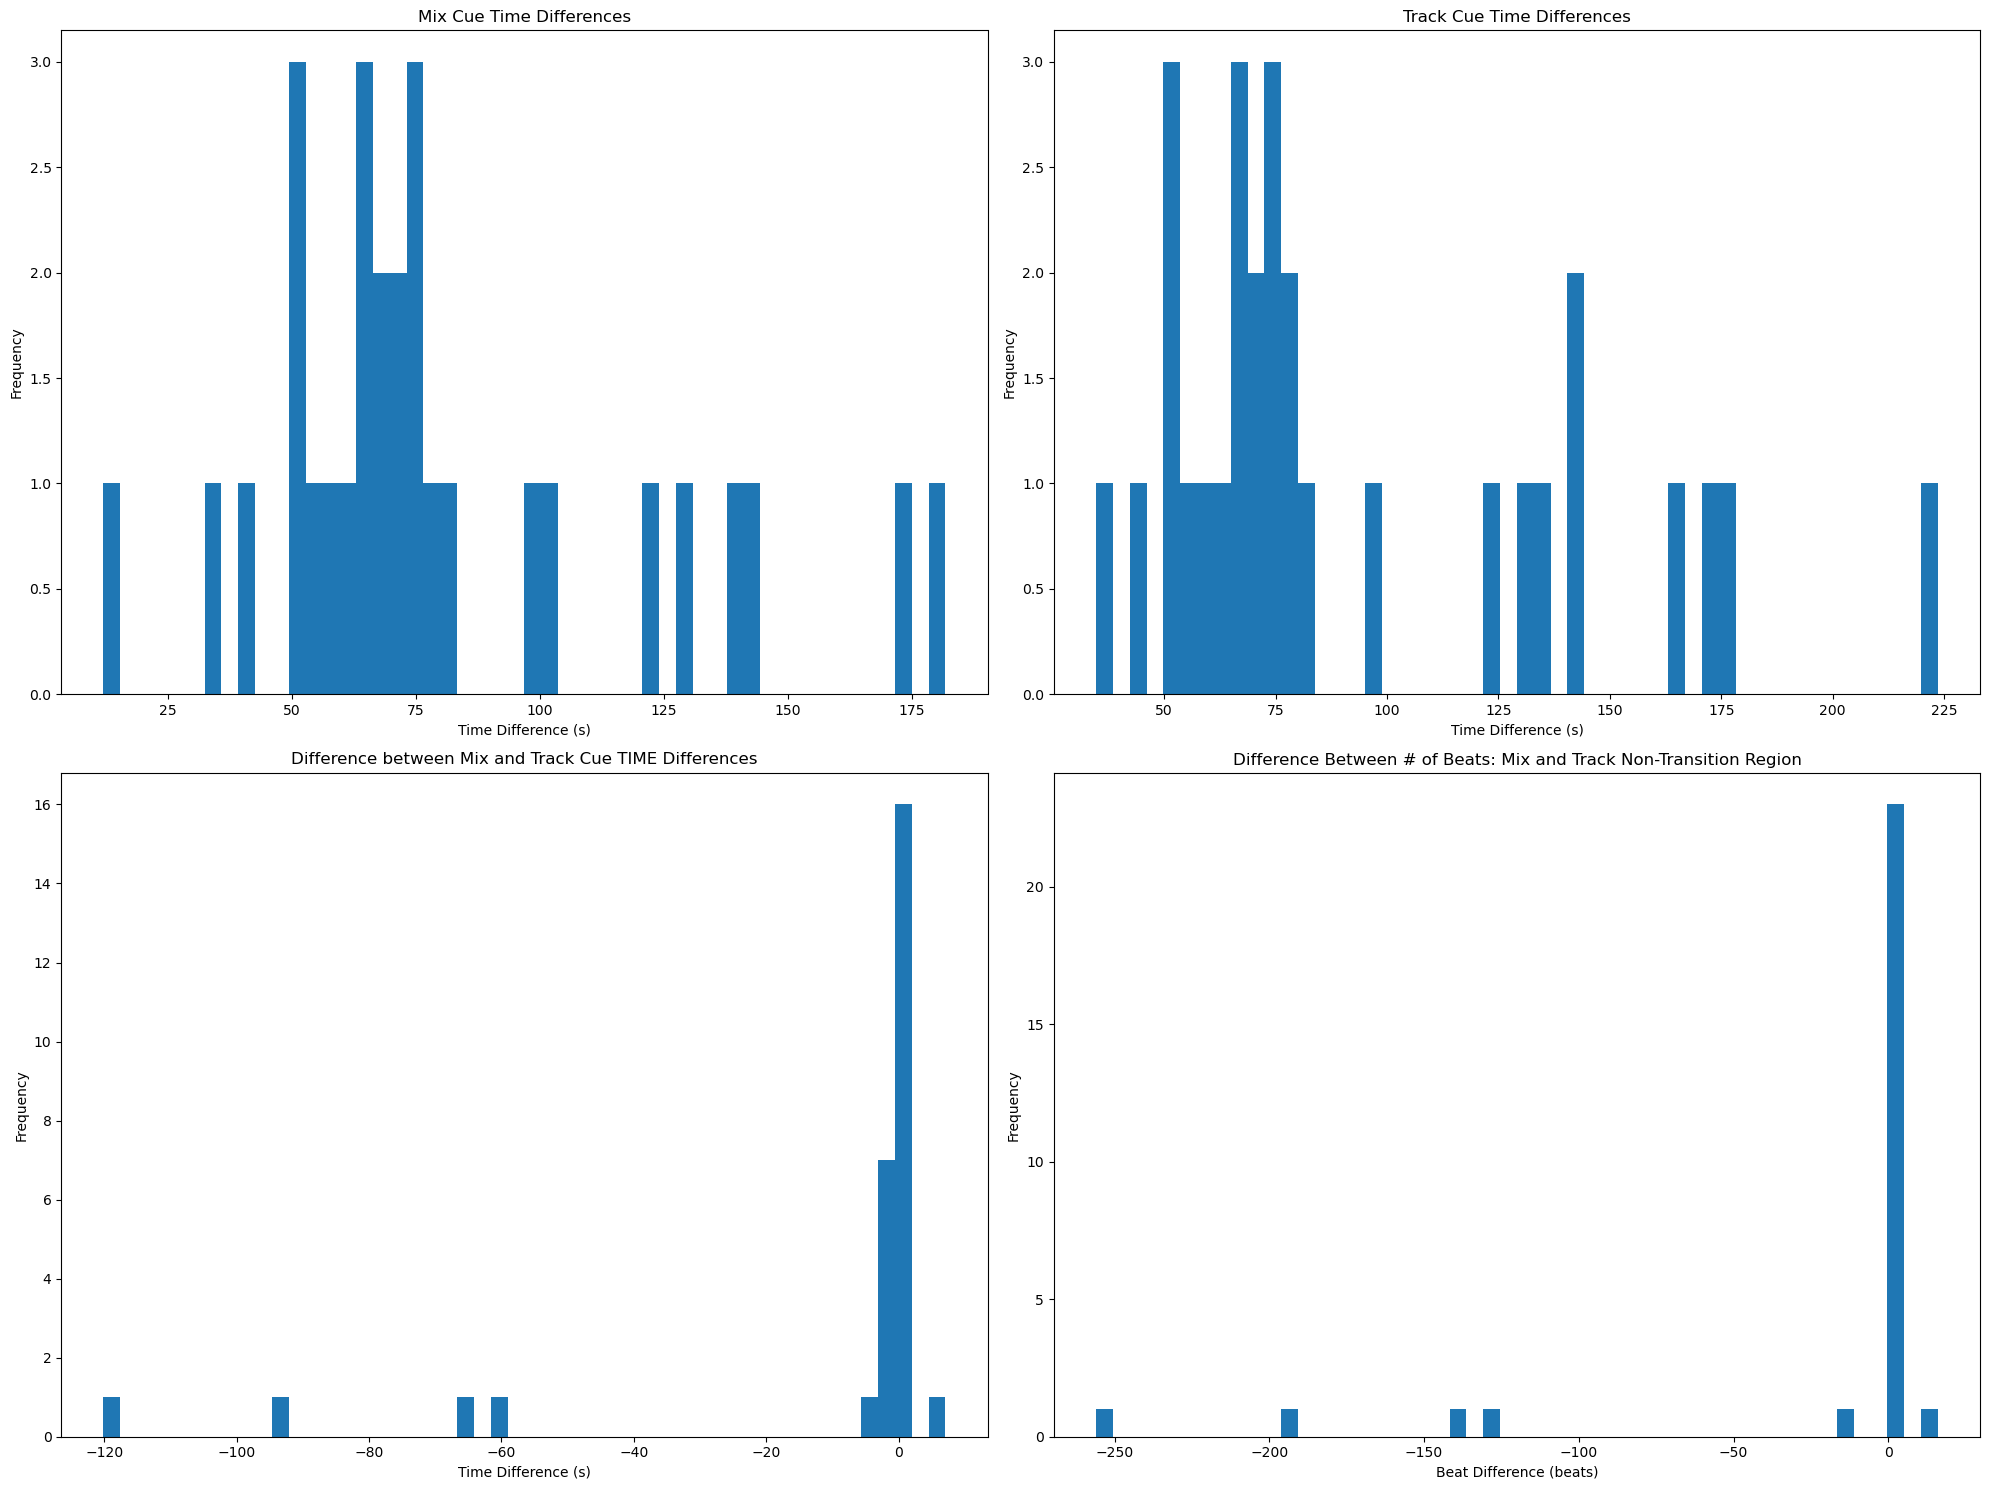

In [196]:
analyze_cue_time_diff(df_cens_cqt)

Number of tracks with key changes: 0


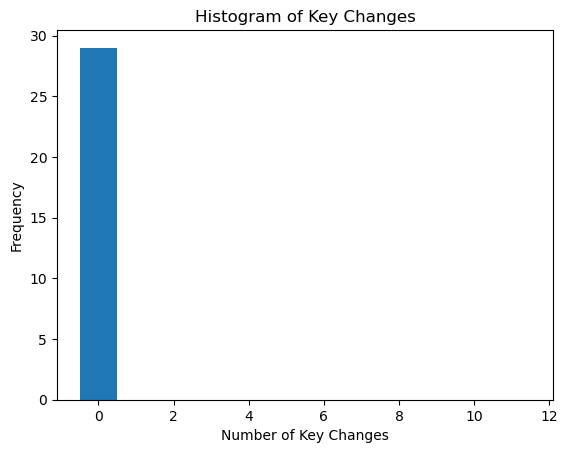

In [197]:
analyze_key_changes(df_cens_cqt)

In [198]:
check_cue_time_order(df_cens_cqt)

All mix_cue_in_time and mix_cue_out_time are in order.


Summary statistics of transition gaps in TIME domain:
count     28.000000
mean      39.646786
std       61.753401
min        0.460000
25%       14.277500
50%       20.800000
75%       31.197500
max      310.590000
Name: time_transition_gap, dtype: float64

Summary statistics of transition gaps in BEAT domain:
count     28.000000
mean      84.750000
std      131.242954
min        1.000000
25%       30.500000
50%       45.000000
75%       62.500000
max      660.000000
Name: beat_transition_gap, dtype: float64



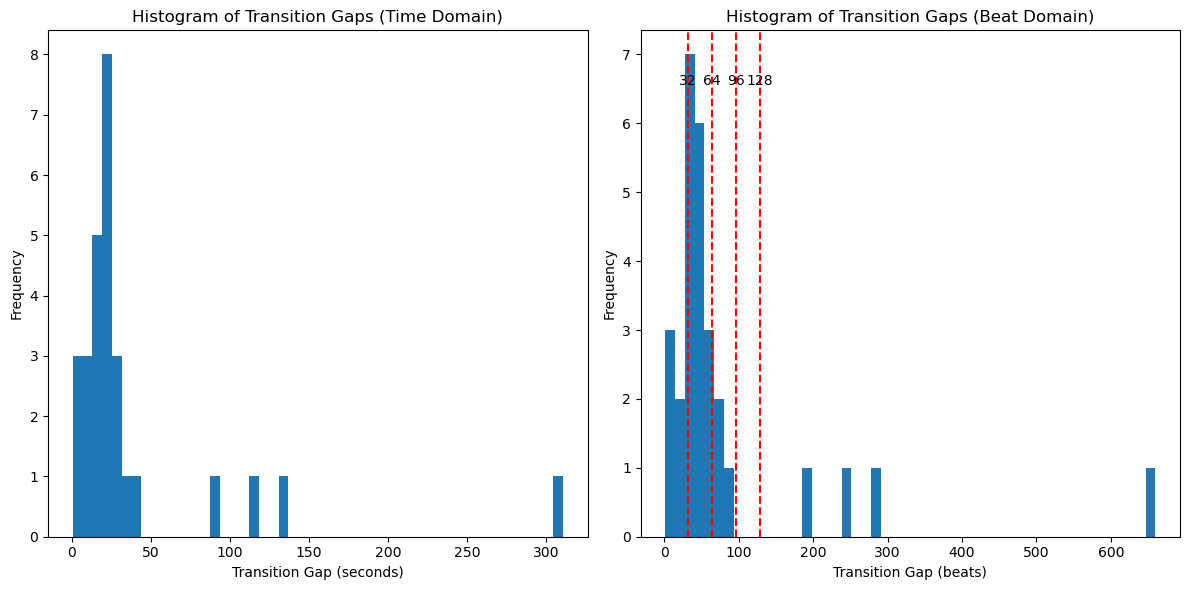

In [199]:
analyze_transition_gaps(df_cens_cqt)

In [200]:
df_cens_cqt[['track_id', 'match_rate', 'best_cost',
        'mix_cue_in_time', 'mix_cue_out_time', 'track_cue_in_time', 'track_cue_out_time',
        'mix_cue_in_beat', 'mix_cue_out_beat', 'track_cue_in_beat', 'track_cue_out_beat',
        'mix_cue_beat_diff', 'track_cue_beat_diff', 'cue_beat_diff_diff',
        'time_transition_gap', 'beat_transition_gap']].head(8)

track_id  match_rate  best_cost  mix_cue_in_time  mix_cue_out_time  \
0  12t6wktp    1.000000   2.531300             7.98             90.74   
1  16juffhx    1.000000   2.740445           109.94            144.77   
2  258n7bkf    1.000000   2.676742           171.98            269.48   
3  10y0bwb5    0.554007   3.420838           269.94            343.52   
4   g9krvgx    0.916168   2.144926           354.95            417.42   
5   9p7yws5    1.000000   3.220079           438.06            504.29   
6  1qc2j195    1.000000   3.044937           525.25            598.06   
7  1mlcb24f    1.000000   2.832457           615.27            688.73   

   track_cue_in_time  track_cue_out_time  mix_cue_in_beat  mix_cue_out_beat  \
0               0.23               83.36               16               185   
1              15.51               50.20              225               299   
2              13.71              111.68              357               566   
3              44.73              179.26              567               726   
4              10.31               77.18              751               904   
5               4.47               69.39              943              1093   
6               5.80               78.60             1141              1323   
7               0.96               74.58             1366              1523   

   track_cue_in_beat  track_cue_out_beat  mix_cue_beat_diff  \
0                  0                 169                169   
1                 33                 107                 74   
2                 29                 238                209   
3                 95                 382                159   
4                 22                 189                153   
5                 10                 160                150   
6                 14                 196                182   
7                  2                 159                157   

   track_cue_beat_diff  cue_beat_diff_diff  time_transition_gap  \
0                  169                   0                  NaN   
1                   74                   0                19.20   
2                  209                   0                27.21   
3                  287                -128                 0.46   
4                  167                 -14                11.43   
5                  150                   0                20.64   
6                  182                   0                20.96   
7                  157                   0                17.21   

   beat_transition_gap  
0                  NaN  
1                 40.0  
2                 58.0  
3                  1.0  
4                 25.0  
5                 39.0  
6                 48.0  
7                 43.0

In [201]:
analyze_match_rate(df_cens_cqt)

Match Rate Analysis:
count    29.000000
mean      0.912437
std       0.214193
min       0.158537
25%       0.986667
50%       1.000000
75%       1.000000
max       1.000000
Name: match_rate, dtype: float64
Percentage of Match Rates Equal to 1: 68.97%


In [202]:
df_cens_cqt.iloc[3]['wp']

array([[450, 764],
       [449, 764],
       [448, 763],
       [447, 762],
       [446, 761],
       [445, 760],
       [444, 759],
       [443, 758],
       [442, 758],
       [441, 758],
       [440, 758],
       [439, 758],
       [438, 758],
       [437, 758],
       [436, 758],
       [435, 758],
       [434, 758],
       [433, 758],
       [432, 758],
       [431, 758],
       [430, 758],
       [429, 758],
       [428, 758],
       [427, 757],
       [426, 756],
       [425, 755],
       [424, 754],
       [423, 753],
       [422, 753],
       [421, 753],
       [420, 753],
       [419, 753],
       [418, 752],
       [417, 751],
       [416, 750],
       [415, 749],
       [414, 749],
       [413, 749],
       [412, 749],
       [411, 749],
       [410, 749],
       [409, 749],
       [408, 749],
       [407, 749],
       [406, 749],
       [405, 749],
       [404, 749],
       [403, 749],
       [402, 749],
       [401, 749],
       [400, 749],
       [399, 749],
       [398,

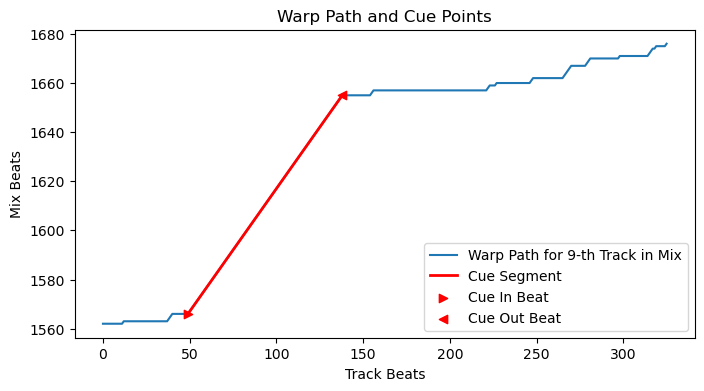

In [ ]:
plot_warp_path(df_cens_cqt)

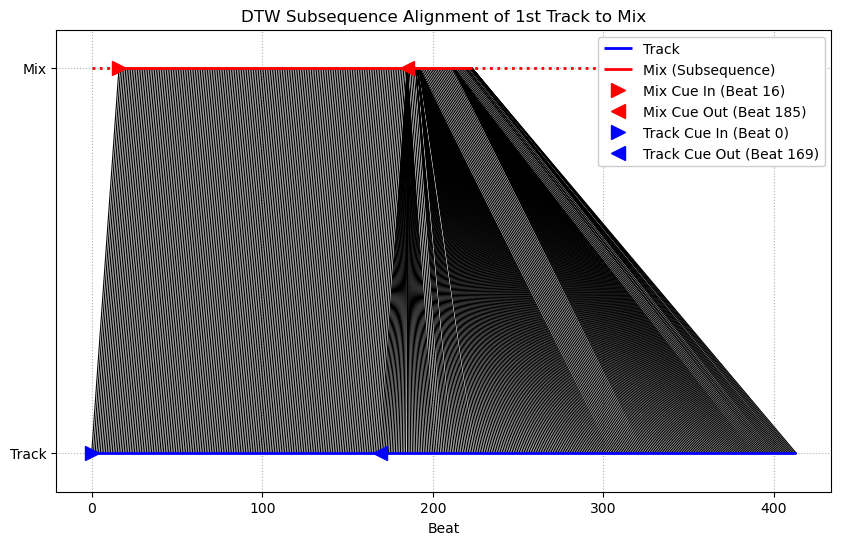

In [204]:
plot_warp_path_connections(df_cens_cqt)

In [205]:
df_cens_cqt.iloc[0]['wp']

array([[413, 223],
       [412, 223],
       [411, 223],
       [410, 223],
       [409, 223],
       [408, 223],
       [407, 222],
       [406, 222],
       [405, 222],
       [404, 222],
       [403, 222],
       [402, 222],
       [401, 222],
       [400, 222],
       [399, 221],
       [398, 220],
       [397, 220],
       [396, 219],
       [395, 219],
       [394, 218],
       [393, 217],
       [392, 216],
       [391, 215],
       [390, 214],
       [389, 213],
       [388, 212],
       [387, 212],
       [386, 212],
       [385, 212],
       [384, 212],
       [383, 212],
       [382, 212],
       [381, 212],
       [380, 212],
       [379, 212],
       [378, 212],
       [377, 212],
       [376, 212],
       [375, 212],
       [374, 212],
       [373, 212],
       [372, 212],
       [371, 212],
       [370, 212],
       [369, 212],
       [368, 212],
       [367, 212],
       [366, 212],
       [365, 212],
       [364, 212],
       [363, 212],
       [362, 212],
       [361,

# Chroma CQT, Downbeat Prob, Onset Strength

In [230]:
df_cqt_db_os = pd.read_pickle('../data/align/jwmtj61-chroma_cqt+downbeat_prob+onset_strength.pkl')

Mix Cue Time Differences:
count     29.000000
mean      78.408621
std       51.233266
min       16.330000
25%       36.250000
50%       69.260000
75%      100.220000
max      213.160000
Name: mix_cue_time_diff, dtype: float64
Standard Deviation: 51.23326637785099

Track Cue Time Differences:
count     29.000000
mean      98.745862
std       63.577751
min       16.410000
25%       51.570000
50%       75.470000
75%      139.600000
max      223.130000
Name: track_cue_time_diff, dtype: float64
Standard Deviation: 63.577751247543986

Difference between Mix and Track Cue TIME Differences:
count     29.000000
mean     -20.337241
std       38.864799
min     -120.130000
25%      -15.510000
50%       -0.620000
75%       -0.090000
max       14.850000
Name: cue_time_diff_diff, dtype: float64
Standard Deviation: 38.86479897363528

Difference between Mix and Track Cue BEAT Differences:
count     29.000000
mean     -44.517241
std       86.088252
min     -256.000000
25%      -32.000000
50%        0.00

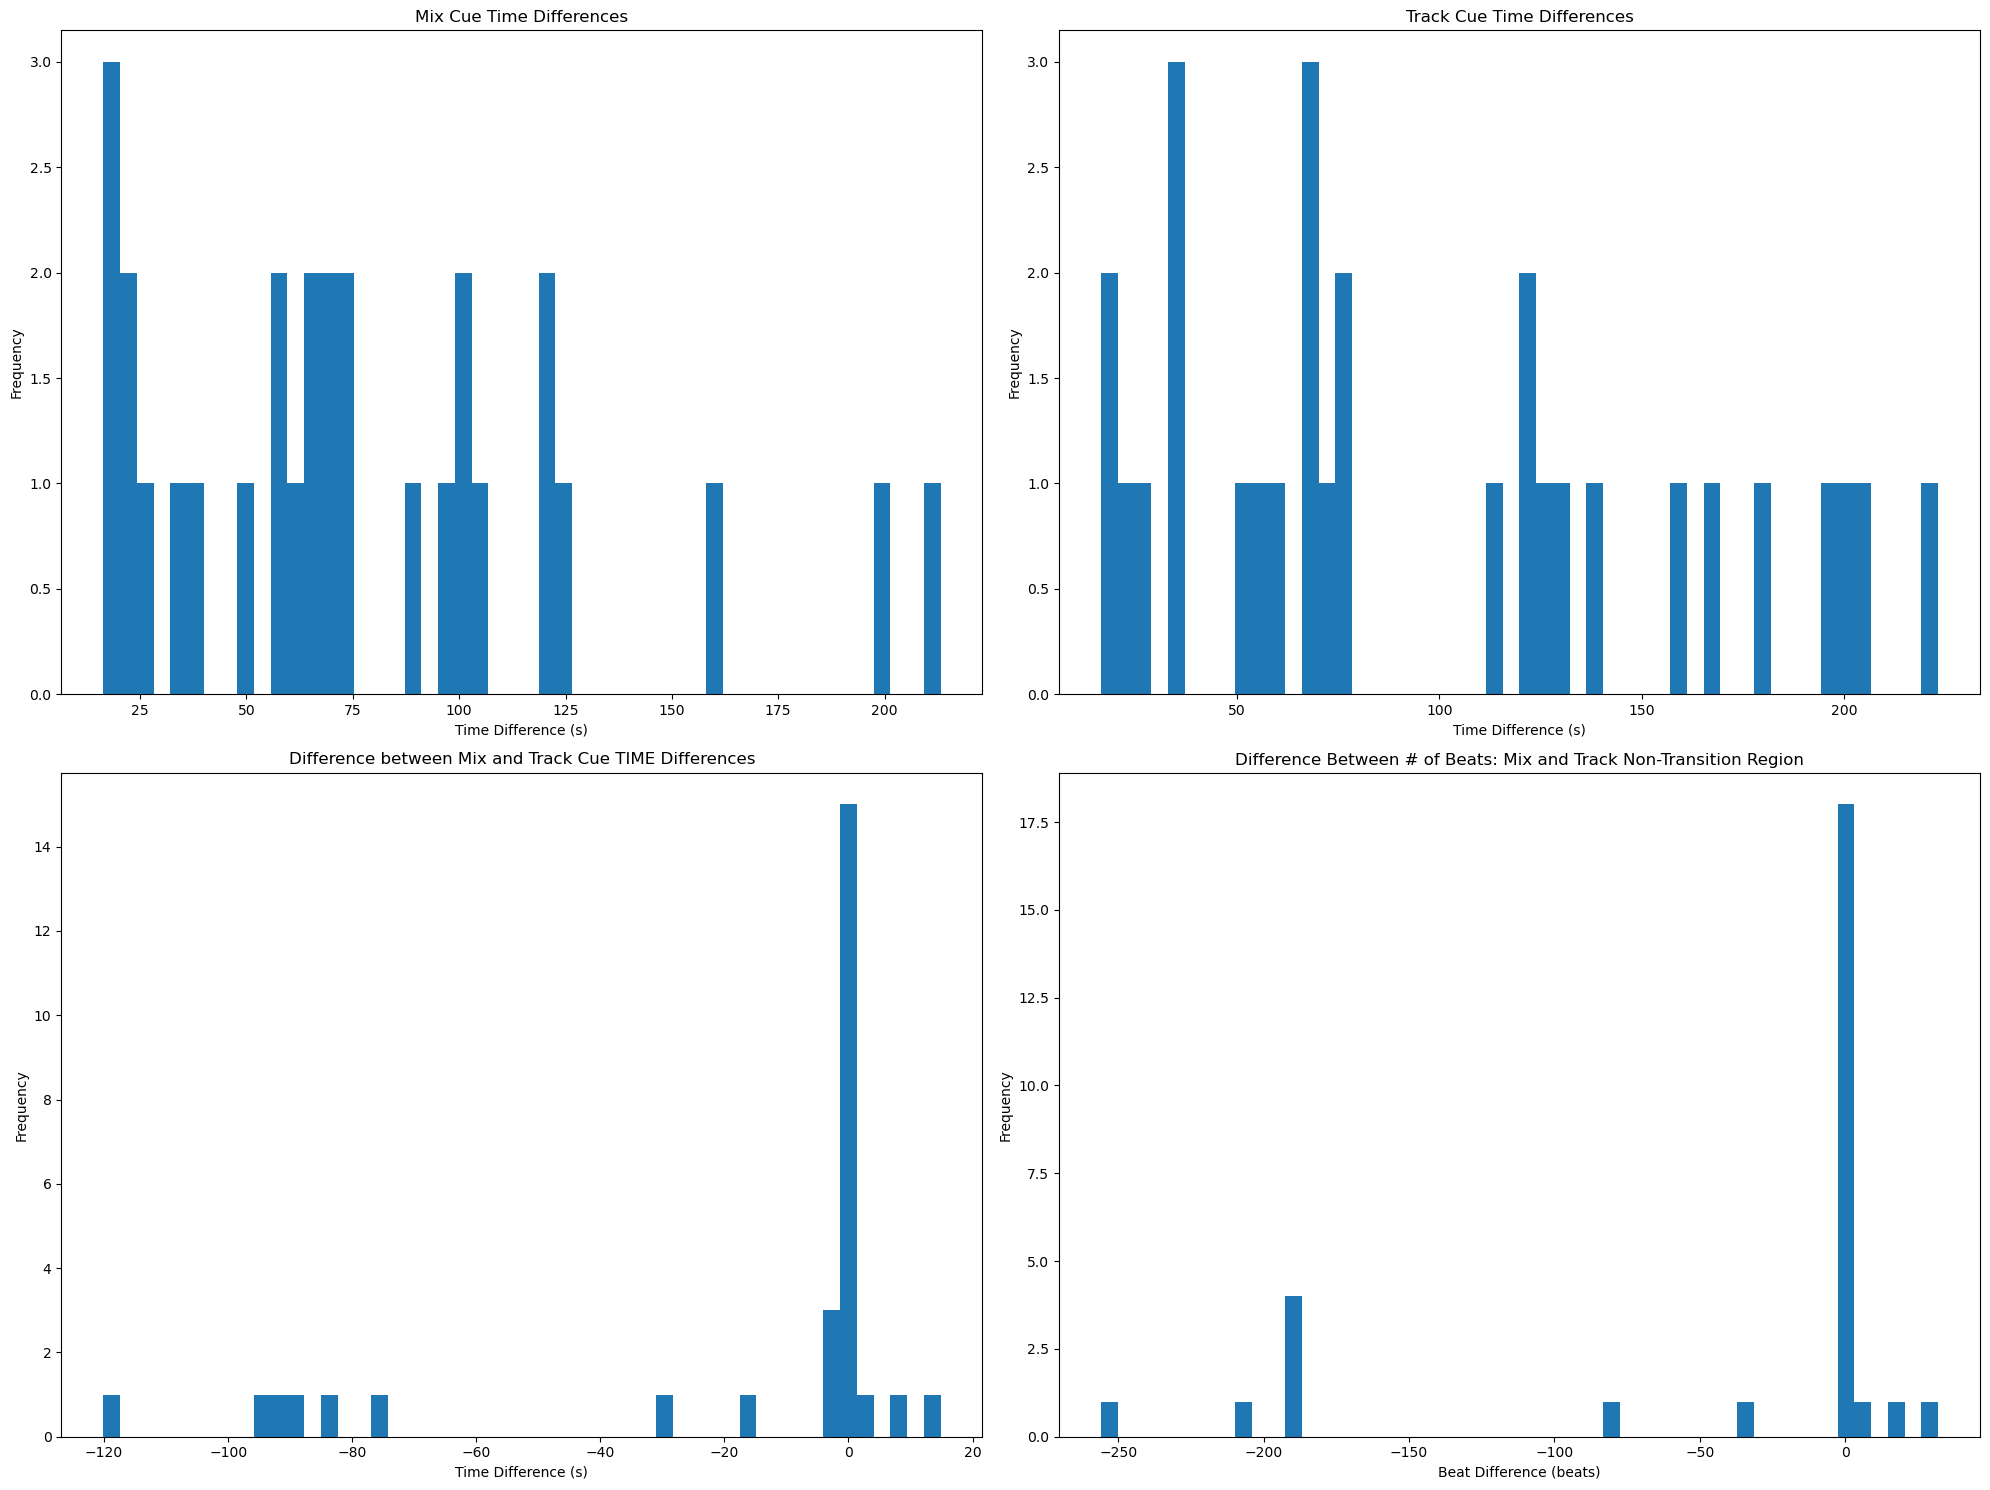

In [231]:
analyze_cue_time_diff(df_cqt_db_os)

Number of tracks with key changes: 0


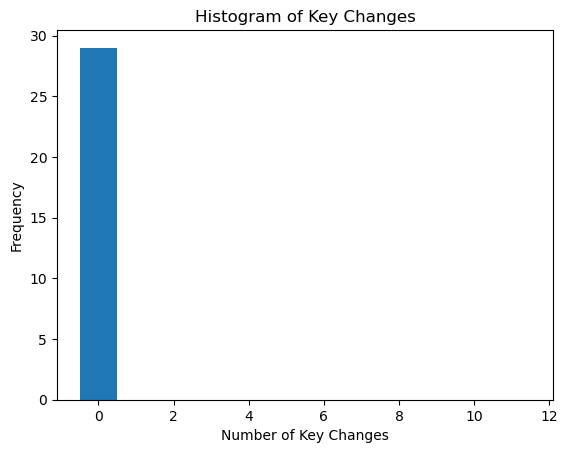

In [232]:
analyze_key_changes(df_cqt_db_os)

In [233]:
check_cue_time_order(df_cqt_db_os)

Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 1mlcb24f
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 2bvj420x


Summary statistics of transition gaps in TIME domain:
count     28.000000
mean      43.312500
std       61.091605
min       -9.250000
25%       13.720000
50%       25.395000
75%       59.042500
max      306.300000
Name: time_transition_gap, dtype: float64

Summary statistics of transition gaps in BEAT domain:
count     28.000000
mean      92.071429
std      129.501874
min      -20.000000
25%       30.250000
50%       54.500000
75%      127.250000
max      651.000000
Name: beat_transition_gap, dtype: float64



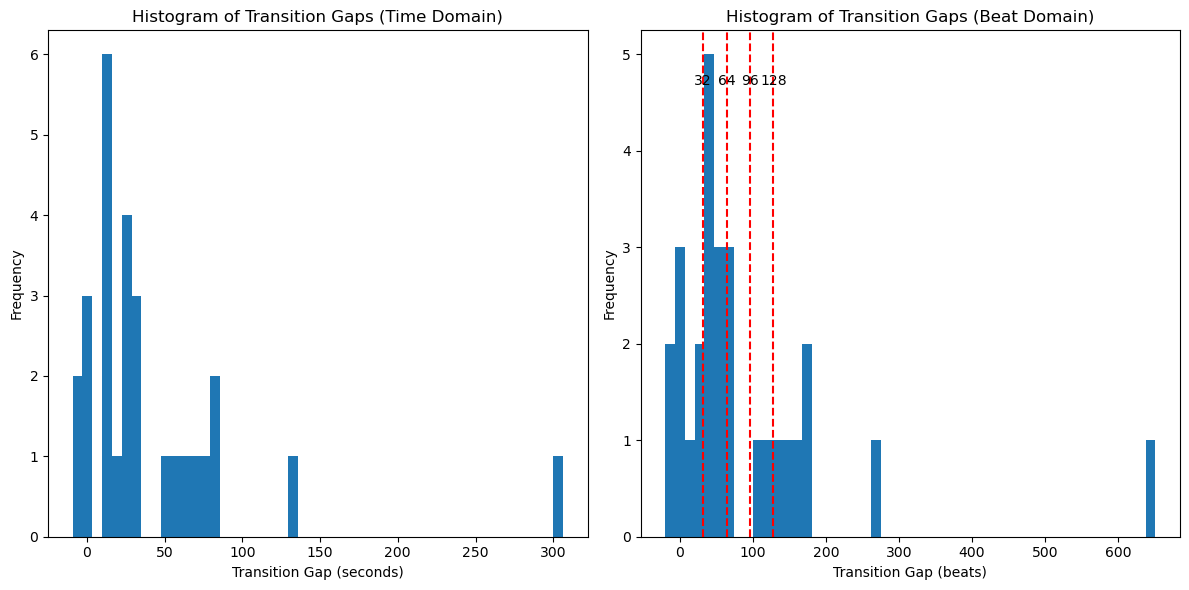

In [234]:
analyze_transition_gaps(df_cqt_db_os)

In [235]:
df_cqt_db_os[['track_id', 'match_rate', 'best_cost',
        'mix_cue_in_time', 'mix_cue_out_time', 'track_cue_in_time', 'track_cue_out_time',
        'mix_cue_in_beat', 'mix_cue_out_beat', 'track_cue_in_beat', 'track_cue_out_beat',
        'mix_cue_beat_diff', 'track_cue_beat_diff', 'cue_beat_diff_diff',
        'time_transition_gap', 'beat_transition_gap']].head(8)

track_id  match_rate  best_cost  mix_cue_in_time  mix_cue_out_time  \
0  12t6wktp    0.513924   2.544806             7.98            107.08   
1  16juffhx    1.000000   2.700948           109.46            145.71   
2  258n7bkf    1.000000   2.561052           172.45            242.97   
3  10y0bwb5    1.000000   3.124421           269.94            344.90   
4   g9krvgx    1.000000   2.331524           357.66            378.34   
5   9p7yws5    1.000000   2.847163           435.48            504.74   
6  1qc2j195    0.537778   2.748431           522.86            620.28   
7  1mlcb24f    1.000000   2.892572           615.27            632.01   

   track_cue_in_time  track_cue_out_time  mix_cue_in_beat  mix_cue_out_beat  \
0               0.23              194.50               16               219   
1              15.05               51.14              224               301   
2              14.18               84.96              358               509   
3              44.73              120.67              567               729   
4              13.12               35.38              757               814   
5               1.86               69.69              937              1094   
6               3.41              183.40             1135              1377   
7               0.96               17.87             1366              1402   

   track_cue_in_beat  track_cue_out_beat  mix_cue_beat_diff  \
0                  0                 395                203   
1                 32                 109                 77   
2                 30                 181                151   
3                 95                 257                162   
4                 28                  85                 57   
5                  4                 161                157   
6                  8                 458                242   
7                  2                  38                 36   

   track_cue_beat_diff  cue_beat_diff_diff  time_transition_gap  \
0                  395                -192                  NaN   
1                   77                   0                 2.38   
2                  151                   0                26.74   
3                  162                   0                26.97   
4                   57                   0                12.76   
5                  157                   0                57.14   
6                  450                -208                18.12   
7                   36                   0                -5.01   

   beat_transition_gap  
0                  NaN  
1                  5.0  
2                 57.0  
3                 58.0  
4                 28.0  
5                123.0  
6                 41.0  
7                -11.0

In [236]:
analyze_match_rate(df_cqt_db_os)

Match Rate Analysis:
count    29.000000
mean      0.843657
std       0.237764
min       0.200000
25%       0.753086
50%       0.981982
75%       1.000000
max       1.000000
Name: match_rate, dtype: float64
Percentage of Match Rates Equal to 1: 48.28%


In [237]:
df_cqt_db_os.iloc[3]['wp']

array([[449, 758],
       [448, 757],
       [447, 757],
       [446, 757],
       [445, 757],
       [444, 757],
       [443, 757],
       [442, 757],
       [441, 757],
       [440, 757],
       [439, 757],
       [438, 757],
       [437, 757],
       [436, 757],
       [435, 757],
       [434, 757],
       [433, 757],
       [432, 756],
       [431, 755],
       [430, 754],
       [429, 753],
       [428, 753],
       [427, 753],
       [426, 753],
       [425, 753],
       [424, 753],
       [423, 753],
       [422, 753],
       [421, 753],
       [420, 753],
       [419, 753],
       [418, 753],
       [417, 753],
       [416, 752],
       [415, 751],
       [414, 751],
       [413, 751],
       [412, 751],
       [411, 751],
       [410, 751],
       [409, 751],
       [408, 751],
       [407, 751],
       [406, 751],
       [405, 751],
       [404, 751],
       [403, 751],
       [402, 751],
       [401, 751],
       [400, 750],
       [399, 749],
       [398, 749],
       [397,

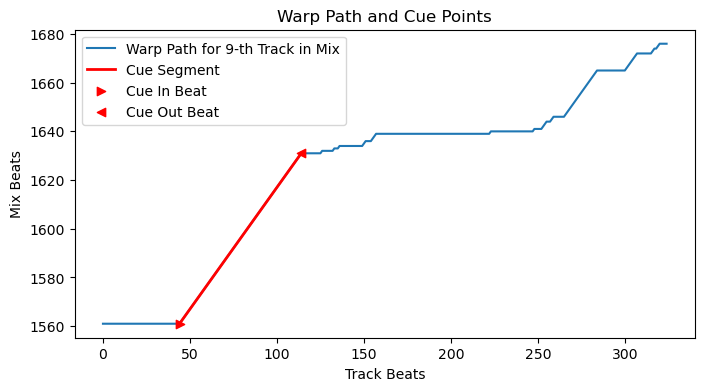

In [238]:
plot_warp_path(df_cqt_db_os)

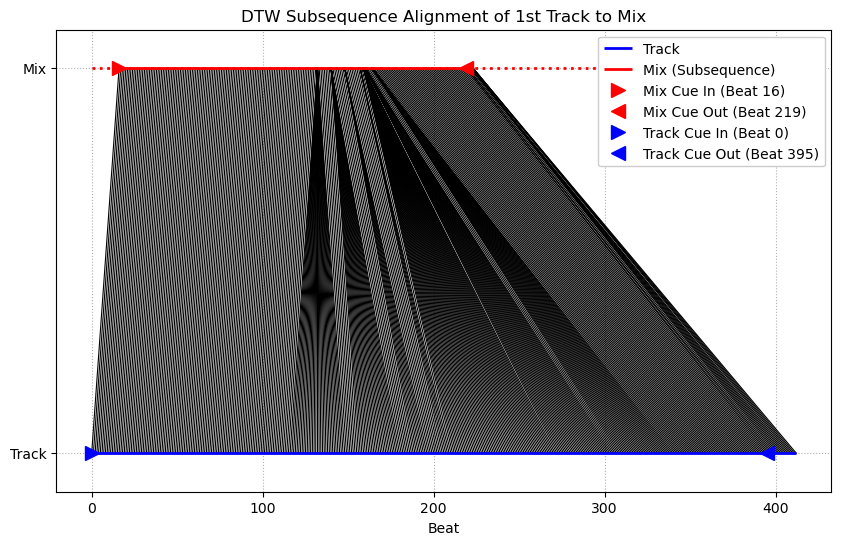

In [239]:
plot_warp_path_connections(df_cqt_db_os)

In [240]:
df_cqt_db_os.iloc[0]['wp']

array([[412, 223],
       [411, 223],
       [410, 223],
       [409, 223],
       [408, 223],
       [407, 222],
       [406, 222],
       [405, 222],
       [404, 222],
       [403, 222],
       [402, 222],
       [401, 222],
       [400, 222],
       [399, 221],
       [398, 220],
       [397, 220],
       [396, 219],
       [395, 219],
       [394, 218],
       [393, 217],
       [392, 216],
       [391, 215],
       [390, 214],
       [389, 213],
       [388, 212],
       [387, 211],
       [386, 210],
       [385, 209],
       [384, 208],
       [383, 207],
       [382, 206],
       [381, 205],
       [380, 204],
       [379, 203],
       [378, 202],
       [377, 201],
       [376, 200],
       [375, 199],
       [374, 198],
       [373, 197],
       [372, 196],
       [371, 195],
       [370, 194],
       [369, 193],
       [368, 192],
       [367, 191],
       [366, 190],
       [365, 189],
       [364, 188],
       [363, 187],
       [362, 186],
       [361, 185],
       [360,

# Chroma, Chroma CQT, Downbeat Prob, Onset Strength

In [219]:
df_cens_cqt_db_os = pd.read_pickle('../data/align/jwmtj61-chroma+chroma_cqt+downbeat_prob+onset_strength.pkl')

Mix Cue Time Differences:
count     29.000000
mean      83.851034
std       45.424459
min       22.200000
25%       58.910000
50%       74.960000
75%       99.100000
max      213.160000
Name: mix_cue_time_diff, dtype: float64
Standard Deviation: 45.42445929742093

Track Cue Time Differences:
count     29.000000
mean     106.354483
std       58.598738
min       28.580000
25%       66.660000
50%       85.130000
75%      141.990000
max      223.590000
Name: track_cue_time_diff, dtype: float64
Standard Deviation: 58.59873819864133

Difference between Mix and Track Cue TIME Differences:
count     29.000000
mean     -22.503448
std       39.596463
min     -120.120000
25%      -33.980000
50%       -0.980000
75%       -0.050000
max        6.960000
Name: cue_time_diff_diff, dtype: float64
Standard Deviation: 39.596463070389575

Difference between Mix and Track Cue BEAT Differences:
count     29.000000
mean     -48.137931
std       85.995317
min     -256.000000
25%      -72.000000
50%        0.00

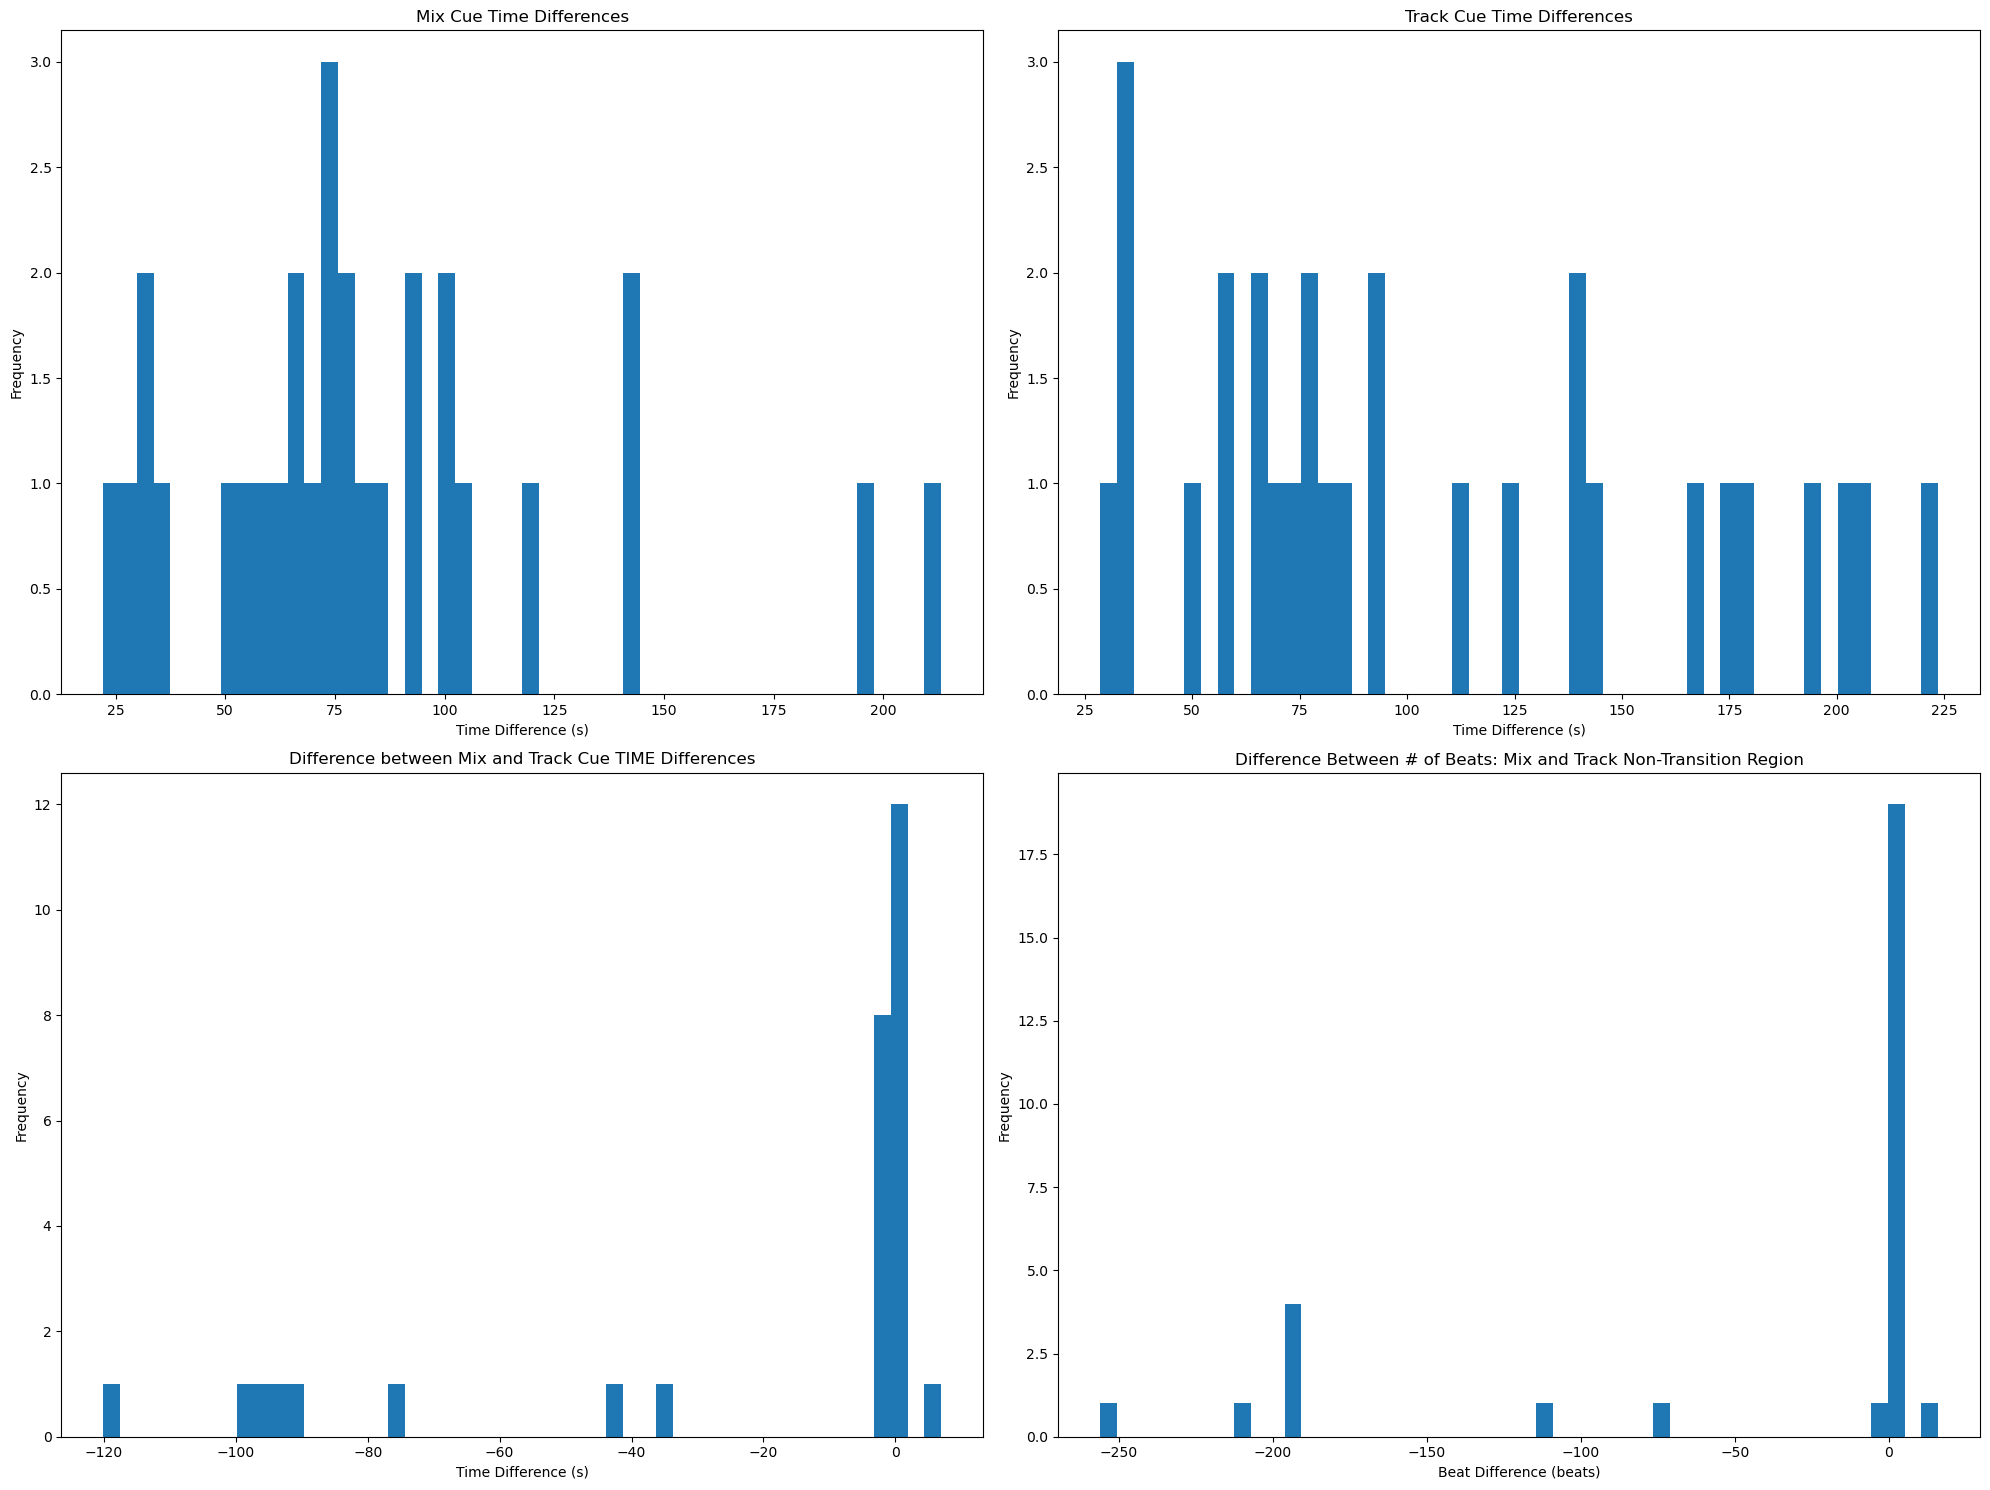

In [220]:
analyze_cue_time_diff(df_cens_cqt_db_os)

Number of tracks with key changes: 0


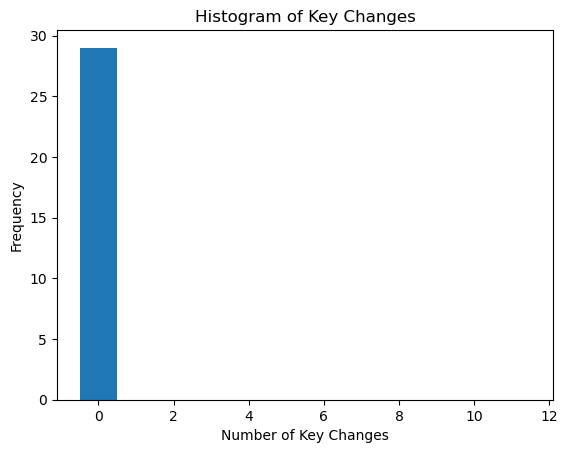

In [221]:
analyze_key_changes(df_cens_cqt_db_os)

In [222]:
check_cue_time_order(df_cens_cqt_db_os)

Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 16juffhx
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 2bvj420x


Summary statistics of transition gaps in TIME domain:
count     28.000000
mean      37.675714
std       57.103017
min       -8.790000
25%       14.385000
50%       22.795000
75%       42.737500
max      306.300000
Name: time_transition_gap, dtype: float64

Summary statistics of transition gaps in BEAT domain:
count     28.000000
mean      79.357143
std      121.099046
min      -19.000000
25%       33.250000
50%       49.000000
75%       79.250000
max      651.000000
Name: beat_transition_gap, dtype: float64



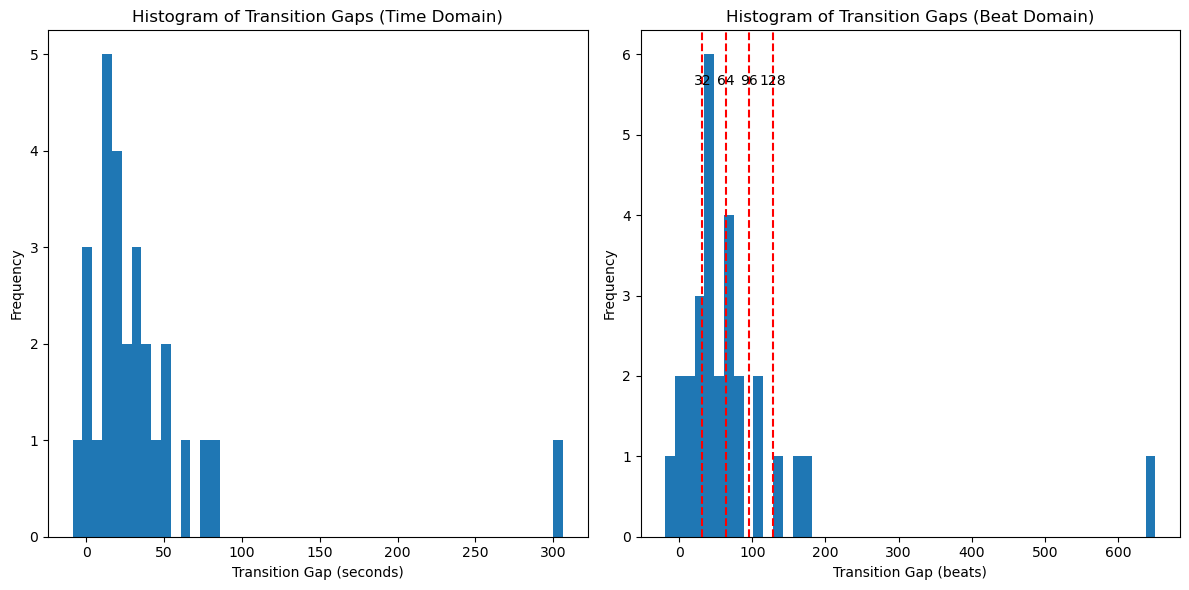

In [223]:
analyze_transition_gaps(df_cens_cqt_db_os)

In [224]:
df_cens_cqt_db_os[['track_id', 'match_rate', 'best_cost',
        'mix_cue_in_time', 'mix_cue_out_time', 'track_cue_in_time', 'track_cue_out_time',
        'mix_cue_in_beat', 'mix_cue_out_beat', 'track_cue_in_beat', 'track_cue_out_beat',
        'mix_cue_beat_diff', 'track_cue_beat_diff', 'cue_beat_diff_diff',
        'time_transition_gap', 'beat_transition_gap']].head(8)

track_id  match_rate  best_cost  mix_cue_in_time  mix_cue_out_time  \
0  12t6wktp    0.513924   3.861276             7.98            107.08   
1  16juffhx    1.000000   4.121334           105.64            141.95   
2  258n7bkf    1.000000   3.870018           172.45            266.23   
3  10y0bwb5    0.975610   4.582825           269.94            344.90   
4   g9krvgx    0.938144   3.562568           357.66            388.76   
5   9p7yws5    1.000000   4.337061           435.48            504.74   
6  1qc2j195    1.000000   3.982998           522.86            604.07   
7  1mlcb24f    0.394872   4.455154           618.87            697.64   

   track_cue_in_time  track_cue_out_time  mix_cue_in_beat  mix_cue_out_beat  \
0               0.23              194.50               16               219   
1              11.29               47.39              216               293   
2              14.18              108.39              358               559   
3              44.73              120.67              567               729   
4              13.12               46.58              757               851   
5               1.86               69.69              937              1094   
6               3.41               84.61             1135              1338   
7               4.74              180.98             1374              1542   

   track_cue_in_beat  track_cue_out_beat  mix_cue_beat_diff  \
0                  0                 395                203   
1                 24                 101                 77   
2                 30                 231                201   
3                 95                 257                162   
4                 28                 122                 94   
5                  4                 161                157   
6                  8                 211                203   
7                 10                 386                168   

   track_cue_beat_diff  cue_beat_diff_diff  time_transition_gap  \
0                  395                -192                  NaN   
1                   77                   0                -1.44   
2                  201                   0                30.50   
3                  162                   0                 3.71   
4                   94                   0                12.76   
5                  157                   0                46.72   
6                  203                   0                18.12   
7                  376                -208                14.80   

   beat_transition_gap  
0                  NaN  
1                 -3.0  
2                 65.0  
3                  8.0  
4                 28.0  
5                 86.0  
6                 41.0  
7                 36.0

In [225]:
analyze_match_rate(df_cens_cqt_db_os)

Match Rate Analysis:
count    29.000000
mean      0.839226
std       0.241434
min       0.200000
25%       0.684507
50%       0.964365
75%       1.000000
max       1.000000
Name: match_rate, dtype: float64
Percentage of Match Rates Equal to 1: 37.93%


In [226]:
df_cens_cqt_db_os.iloc[3]['wp']

array([[449, 759],
       [448, 758],
       [447, 757],
       [446, 757],
       [445, 757],
       [444, 757],
       [443, 757],
       [442, 757],
       [441, 757],
       [440, 757],
       [439, 757],
       [438, 757],
       [437, 757],
       [436, 757],
       [435, 757],
       [434, 757],
       [433, 757],
       [432, 757],
       [431, 757],
       [430, 757],
       [429, 757],
       [428, 757],
       [427, 757],
       [426, 757],
       [425, 757],
       [424, 757],
       [423, 757],
       [422, 757],
       [421, 757],
       [420, 757],
       [419, 757],
       [418, 757],
       [417, 757],
       [416, 756],
       [415, 755],
       [414, 754],
       [413, 753],
       [412, 752],
       [411, 751],
       [410, 751],
       [409, 751],
       [408, 751],
       [407, 751],
       [406, 751],
       [405, 751],
       [404, 751],
       [403, 751],
       [402, 751],
       [401, 751],
       [400, 750],
       [399, 749],
       [398, 749],
       [397,

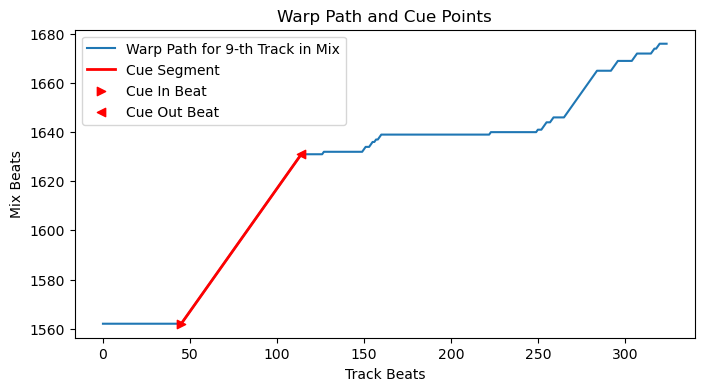

In [227]:
plot_warp_path(df_cens_cqt_db_os)

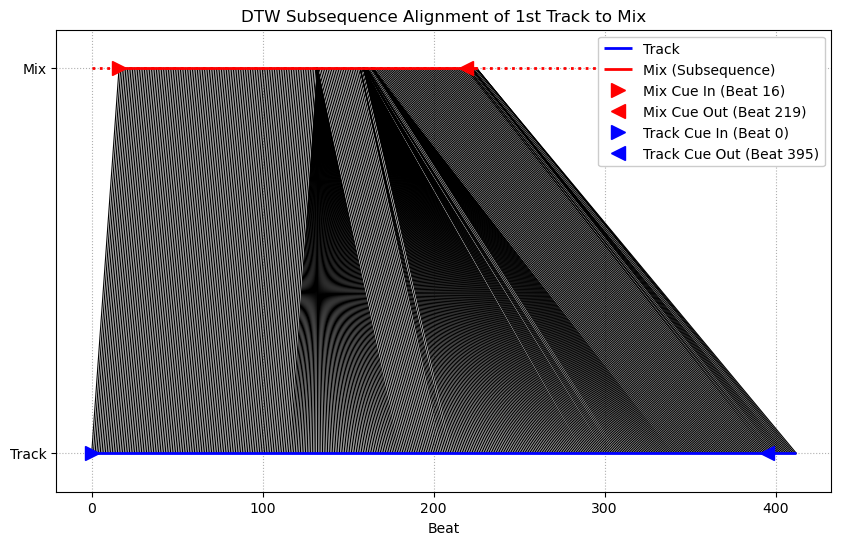

In [228]:
plot_warp_path_connections(df_cens_cqt_db_os)

In [229]:
df_cens_cqt_db_os.iloc[0]['wp']

array([[412, 225],
       [411, 225],
       [410, 225],
       [409, 225],
       [408, 224],
       [407, 223],
       [406, 222],
       [405, 222],
       [404, 222],
       [403, 222],
       [402, 222],
       [401, 222],
       [400, 222],
       [399, 221],
       [398, 220],
       [397, 220],
       [396, 219],
       [395, 219],
       [394, 218],
       [393, 217],
       [392, 216],
       [391, 215],
       [390, 214],
       [389, 213],
       [388, 212],
       [387, 211],
       [386, 210],
       [385, 209],
       [384, 208],
       [383, 207],
       [382, 206],
       [381, 205],
       [380, 204],
       [379, 203],
       [378, 202],
       [377, 201],
       [376, 200],
       [375, 199],
       [374, 198],
       [373, 197],
       [372, 196],
       [371, 195],
       [370, 194],
       [369, 193],
       [368, 192],
       [367, 191],
       [366, 190],
       [365, 189],
       [364, 188],
       [363, 187],
       [362, 186],
       [361, 185],
       [360,